# Analise os dados públicos do GA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_hearing = pd.read_excel('/content/drive/MyDrive/projetos/analise_de_dados_GA/Dados/public_ga_sample.xlsx')

In [8]:
df_hearing

date channelGrouping                    source deviceCategory  \
0      20170528        Referral               away.vk.com        desktop   
1      20160914        Referral                 google.de        desktop   
2      20170608        Referral             phandroid.com        desktop   
3      20170722        Referral     int.search.tb.ask.com        desktop   
4      20170501        Referral       search.mysearch.com        desktop   
...         ...             ...                       ...            ...   
45001  20161206        Referral  productforums.google.com         mobile   
45002  20170108        Referral  productforums.google.com        desktop   
45003  20161211        Referral  productforums.google.com         mobile   
45004  20170208        Referral  productforums.google.com         mobile   
45005  20170425        Referral  productforums.google.com        desktop   

       browser  total visits  total pageviews  total timeOnSite  total users  
0       Chrome             2              2.0               NaN            2  
1        Opera             1              1.0               NaN            1  
2       Chrome             2              4.0              19.0            2  
3       Chrome             1              1.0               NaN            1  
4       Chrome             2              2.0               NaN            2  
...        ...           ...              ...               ...          ...  
45001   Chrome             1              3.0              20.0            1  
45002  Firefox             1              1.0               NaN            1  
45003   Safari             1              2.0              44.0            1  
45004   Chrome             1              1.0               NaN            1  
45005   Safari             1              3.0              44.0            1  

[45006 rows x 9 columns]

# Tratamentos Dos Dados

In [9]:
df_hearing.columns.tolist()

['date',
 'channelGrouping',
 'source',
 'deviceCategory',
 'browser',
 'total visits',
 'total pageviews',
 'total timeOnSite',
 'total users']

In [10]:
#Substitui espaços e caracteres não alfanuméricos por underscores
def string_to_snake_case(string):
    string = re.sub(" ", "_", string)
    string = re.sub("([a-z0-9])([A-Z])", r"\1_\2", string)
    return string.lower()

In [11]:
#Converter o nome das colunas para o estilo de snake_case
df_hearing.columns = [string_to_snake_case(column) for column in df_hearing.columns]

df_hearing.columns

Index(['date', 'channel_grouping', 'source', 'device_category', 'browser',
       'total_visits', 'total_pageviews', 'total_time_on_site', 'total_users'],
      dtype='object')

In [12]:
# Renomear a coluna 'nome_antigo' para 'nome_novo'
df_hearing = df_hearing.rename(columns={'total_time_on_site': 'total_timeonsite'})
df_hearing

date channel_grouping                    source device_category  \
0      20170528         Referral               away.vk.com         desktop   
1      20160914         Referral                 google.de         desktop   
2      20170608         Referral             phandroid.com         desktop   
3      20170722         Referral     int.search.tb.ask.com         desktop   
4      20170501         Referral       search.mysearch.com         desktop   
...         ...              ...                       ...             ...   
45001  20161206         Referral  productforums.google.com          mobile   
45002  20170108         Referral  productforums.google.com         desktop   
45003  20161211         Referral  productforums.google.com          mobile   
45004  20170208         Referral  productforums.google.com          mobile   
45005  20170425         Referral  productforums.google.com         desktop   

       browser  total_visits  total_pageviews  total_timeonsite  total_users  
0       Chrome             2              2.0               NaN            2  
1        Opera             1              1.0               NaN            1  
2       Chrome             2              4.0              19.0            2  
3       Chrome             1              1.0               NaN            1  
4       Chrome             2              2.0               NaN            2  
...        ...           ...              ...               ...          ...  
45001   Chrome             1              3.0              20.0            1  
45002  Firefox             1              1.0               NaN            1  
45003   Safari             1              2.0              44.0            1  
45004   Chrome             1              1.0               NaN            1  
45005   Safari             1              3.0              44.0            1  

[45006 rows x 9 columns]

In [13]:
#Contagem de linhas e colunas
df_hearing.shape

(45006, 9)

In [14]:
#Verificar as informação
df_hearing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              45006 non-null  int64  
 1   channel_grouping  45006 non-null  object 
 2   source            45006 non-null  object 
 3   device_category   45006 non-null  object 
 4   browser           45006 non-null  object 
 5   total_visits      45006 non-null  int64  
 6   total_pageviews   45005 non-null  float64
 7   total_timeonsite  32361 non-null  float64
 8   total_users       45006 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 3.1+ MB


In [15]:
#Converter coluna de inteiros para datetime
df_hearing['date'] = pd.to_datetime(df_hearing['date'], format='%Y%m%d')

In [16]:
#Verificar as informação
df_hearing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              45006 non-null  datetime64[ns]
 1   channel_grouping  45006 non-null  object        
 2   source            45006 non-null  object        
 3   device_category   45006 non-null  object        
 4   browser           45006 non-null  object        
 5   total_visits      45006 non-null  int64         
 6   total_pageviews   45005 non-null  float64       
 7   total_timeonsite  32361 non-null  float64       
 8   total_users       45006 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [17]:
# Aparecer 5 primeiros dataframe
df_hearing.head(10)

date channel_grouping                 source device_category  browser  \
0 2017-05-28         Referral            away.vk.com         desktop   Chrome   
1 2016-09-14         Referral              google.de         desktop    Opera   
2 2017-06-08         Referral          phandroid.com         desktop   Chrome   
3 2017-07-22         Referral  int.search.tb.ask.com         desktop   Chrome   
4 2017-05-01         Referral    search.mysearch.com         desktop   Chrome   
5 2017-07-14           Social        lm.facebook.com          mobile   Safari   
6 2017-01-09         Referral     support.google.com         desktop  Firefox   
7 2016-08-26         Referral       seroundtable.com         desktop   Chrome   
8 2017-07-24           Social          m.youtube.com          mobile   Chrome   
9 2017-03-18         Referral         duckduckgo.com         desktop   Safari   

   total_visits  total_pageviews  total_timeonsite  total_users  
0             2              2.0               NaN            2  
1             1              1.0               NaN            1  
2             2              4.0              19.0            2  
3             1              1.0               NaN            1  
4             2              2.0               NaN            2  
5             1              1.0               NaN            1  
6             1              1.0               NaN            1  
7             1              3.0              76.0            1  
8             1              1.0               NaN            1  
9             1              1.0               NaN            1

In [18]:
# Contagem total de NaN
total_nan = df_hearing.isna().sum()

#print
total_nan

date                    0
channel_grouping        0
source                  0
device_category         0
browser                 0
total_visits            0
total_pageviews         1
total_timeonsite    12645
total_users             0
dtype: int64

In [19]:
# Percentual de NaN em relação ao total de linhas
total_nan / len(df_hearing) * 100

date                 0.000000
channel_grouping     0.000000
source               0.000000
device_category      0.000000
browser              0.000000
total_visits         0.000000
total_pageviews      0.002222
total_timeonsite    28.096254
total_users          0.000000
dtype: float64

In [20]:
percentagem = 28.096254
percentagem_formatada = f"{percentagem:.1f}%"
print(percentagem_formatada)

28.1%


In [21]:
# Verifique as colunas disponíveis no DataFrame
print(df_hearing.columns)

# Verifique se a coluna 'device_category' está presente
if 'device_category' in df_hearing.columns:
    # Contagem dos valores na coluna 'device_category'
    count = df_hearing['device_category'].value_counts()
    print(count)
else:
    print("A coluna 'device_category' não está presente no DataFrame.")

Index(['date', 'channel_grouping', 'source', 'device_category', 'browser',
       'total_visits', 'total_pageviews', 'total_timeonsite', 'total_users'],
      dtype='object')
device_category
desktop    24473
mobile     15073
tablet      5460
Name: count, dtype: int64


In [22]:
# Analisar a distribuição dos NaNs por outras colunas
nan_distribution = df_hearing[df_hearing['total_timeonsite'].isna()]
print(nan_distribution.groupby('device_category').size())
print(nan_distribution.groupby('source').size())

device_category
desktop    6311
mobile     4659
tablet     1675
dtype: int64
source
(direct)              1881
(not set)               16
9to5google.com           1
Partners               734
ad.doubleclick.net       2
                      ... 
web.skype.com            1
wheretoget.it            1
yahoo                  293
yandex                   1
youtube.com           2103
Length: 222, dtype: int64


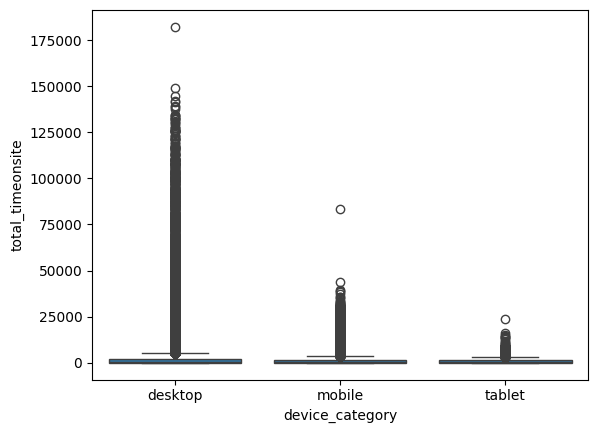

In [23]:
sns.boxplot(x='device_category', y='total_timeonsite', data=df_hearing)
plt.show()

In [24]:
# Selecionar apenas colunas numéricas
numeric_cols = df_hearing.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação
correlation_matrix = numeric_cols.corr()

# Exibir a correlação de total_timeonsite com outras variáveis
print(correlation_matrix['total_timeonsite'])


total_visits        0.802116
total_pageviews     0.977449
total_timeonsite    1.000000
total_users         0.780241
Name: total_timeonsite, dtype: float64


In [25]:
# Separar os dados em treinamento e teste
train = df_hearing[df_hearing['total_timeonsite'].notna()]
test = df_hearing[df_hearing['total_timeonsite'].isna()]

# Definir as variáveis independentes (features) e a dependente (target)
features = ['total_pageviews', 'total_visits', 'total_users']
X_train = train[features]
y_train = train['total_timeonsite']
X_test = test[features]

# Usar SimpleImputer para preencher os NaNs nas variáveis independentes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Treinar o modelo de regressão
model = LinearRegression()
model.fit(X_train, y_train)

# Prever os valores faltantes
predictions = model.predict(X_test)

# Preencher os valores faltantes no dataframe original
df_hearing.loc[df_hearing['total_timeonsite'].isna(), 'total_timeonsite'] = predictions

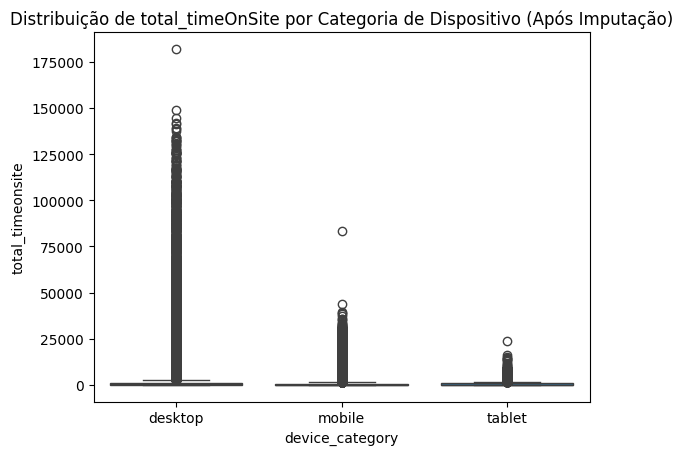

In [26]:
# Verificar a distribuição dos valores imputados
sns.boxplot(x='device_category', y='total_timeonsite', data=df_hearing)
plt.title('Distribuição de total_timeOnSite por Categoria de Dispositivo (Após Imputação)')
plt.show()

In [27]:
# Estatísticas descritivas antes da imputação
desc_before = df_hearing['total_timeonsite'].describe()
print("Estatísticas Descritivas Antes da Imputação:\n", desc_before)

# Estatísticas descritivas depois da imputação
desc_after = df_hearing['total_timeonsite'].describe()
print("\nEstatísticas Descritivas Depois da Imputação:\n", desc_after)

# Comparar a média, mediana, e desvio padrão
mean_before = desc_before['mean']
mean_after = desc_after['mean']
median_before = desc_before['50%']
median_after = desc_after['50%']
std_before = desc_before['std']
std_after = desc_after['std']

print("\nComparação das Estatísticas:")
print(f"Média Antes: {mean_before}, Média Depois: {mean_after}")
print(f"Mediana Antes: {median_before}, Mediana Depois: {median_after}")
print(f"Desvio Padrão Antes: {std_before}, Desvio Padrão Depois: {std_after}")

Estatísticas Descritivas Antes da Imputação:
 count     45006.000000
mean       2666.803354
std       10643.087132
min           1.000000
25%          86.029760
50%         136.000000
75%         939.000000
max      182162.000000
Name: total_timeonsite, dtype: float64

Estatísticas Descritivas Depois da Imputação:
 count     45006.000000
mean       2666.803354
std       10643.087132
min           1.000000
25%          86.029760
50%         136.000000
75%         939.000000
max      182162.000000
Name: total_timeonsite, dtype: float64

Comparação das Estatísticas:
Média Antes: 2666.803354198813, Média Depois: 2666.803354198813
Mediana Antes: 136.0, Mediana Depois: 136.0
Desvio Padrão Antes: 10643.087131590451, Desvio Padrão Depois: 10643.087131590451


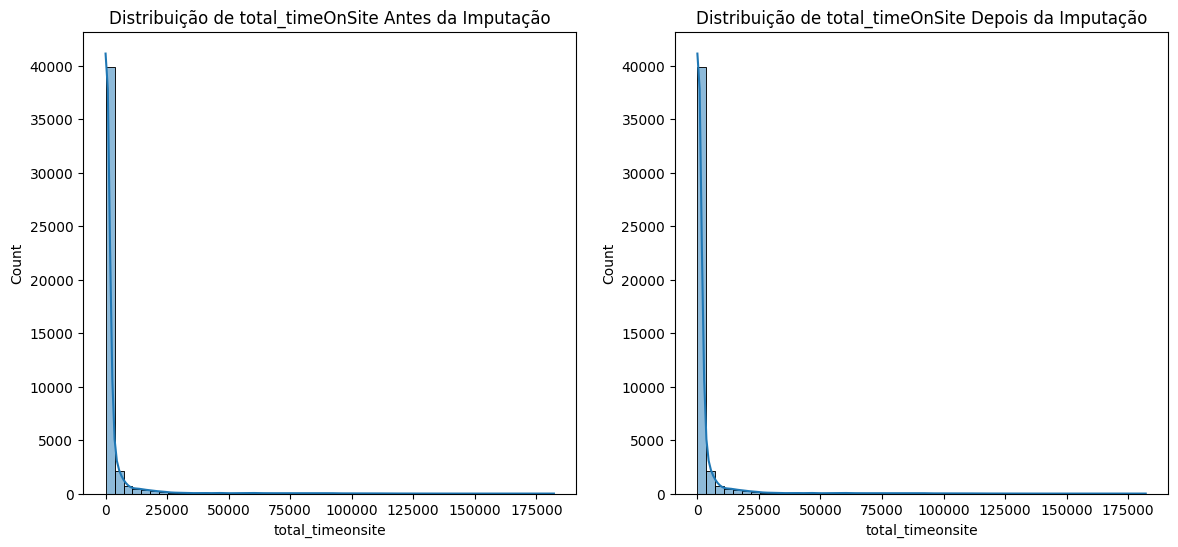

In [28]:
# Histogramas antes e depois da imputação
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Antes da imputação (somente valores não NaN)
sns.histplot(df_hearing[df_hearing['total_timeonsite'].notna()]['total_timeonsite'], bins=50, ax=ax[0], kde=True)
ax[0].set_title('Distribuição de total_timeOnSite Antes da Imputação')

# Depois da imputação (todos os valores)
sns.histplot(df_hearing['total_timeonsite'], bins=50, ax=ax[1], kde=True)
ax[1].set_title('Distribuição de total_timeOnSite Depois da Imputação')

plt.show()

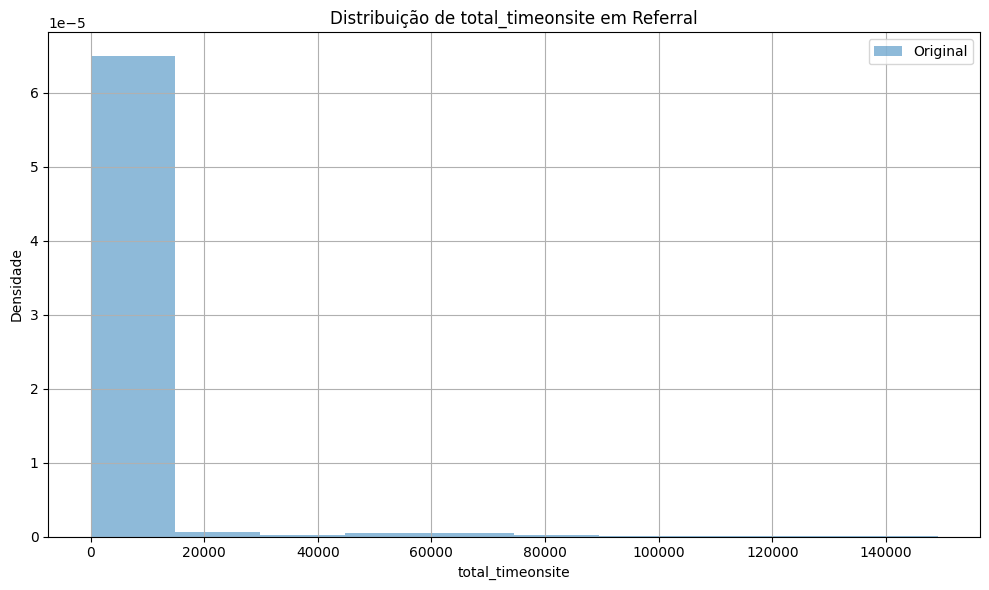

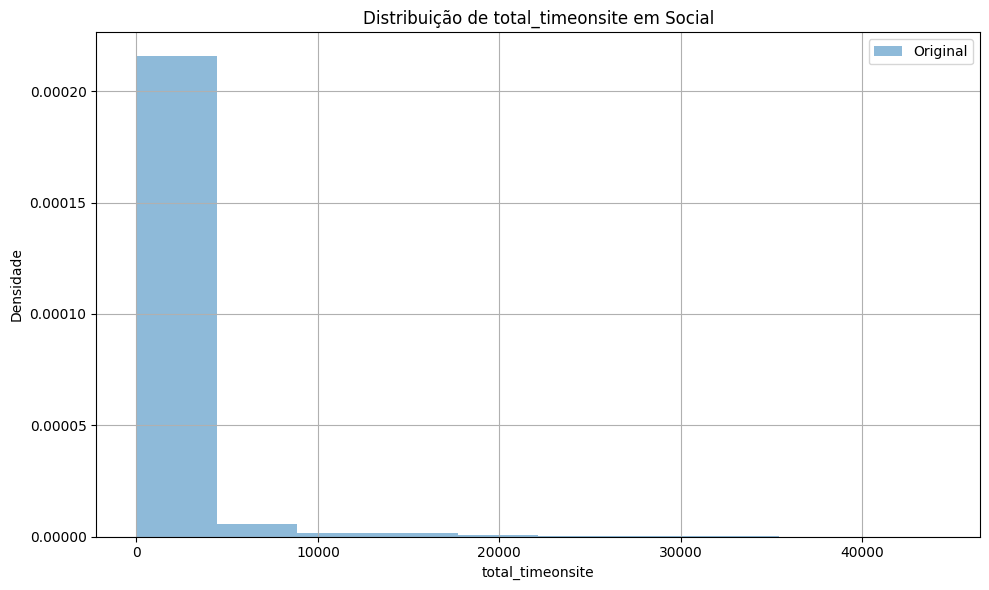

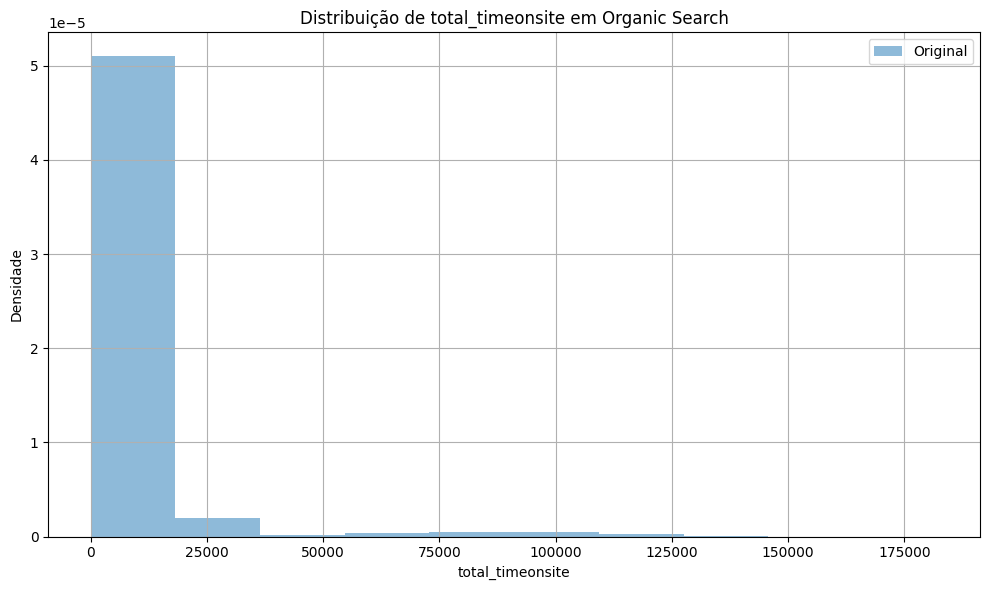

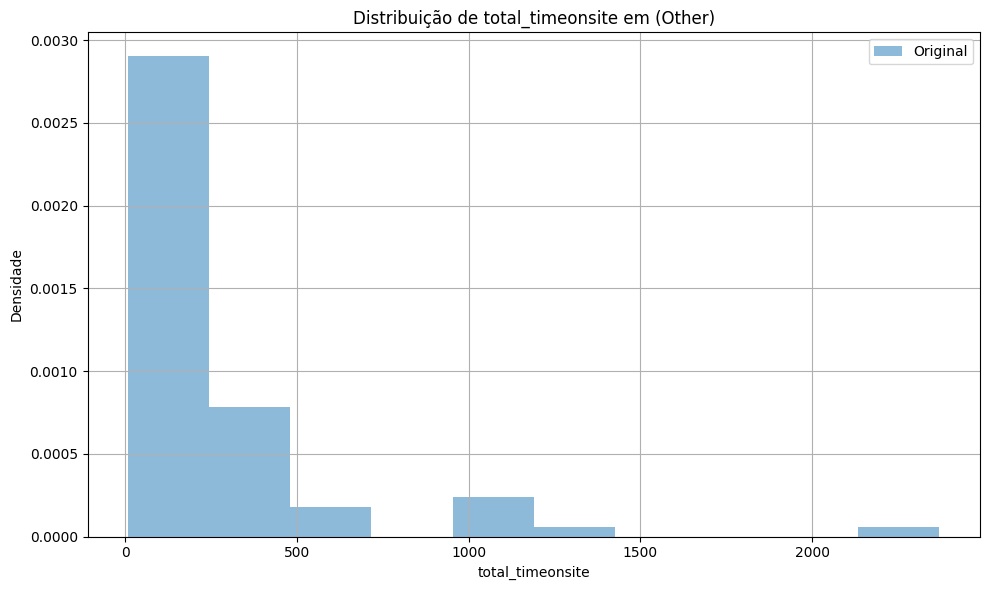

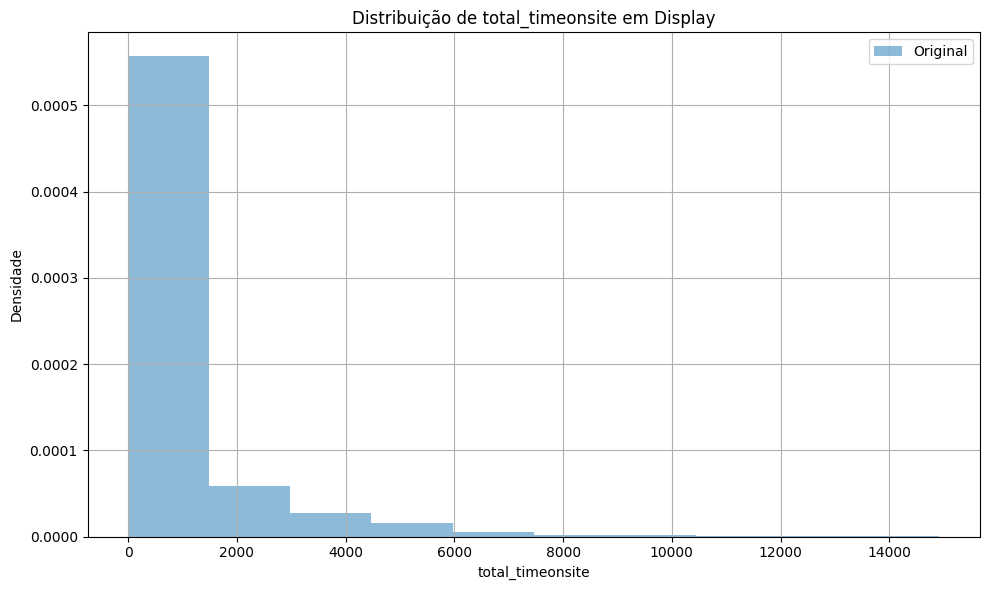

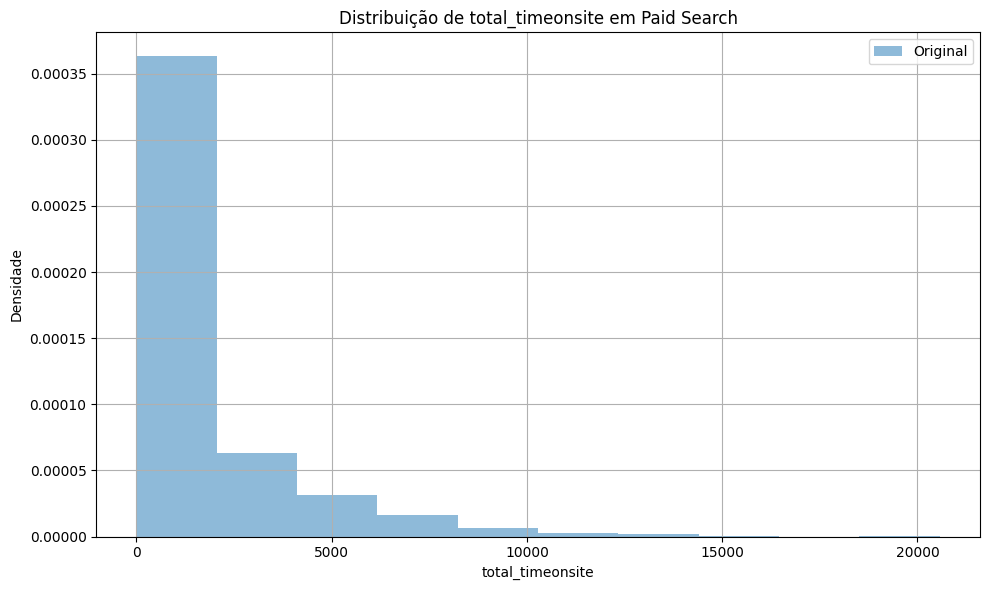

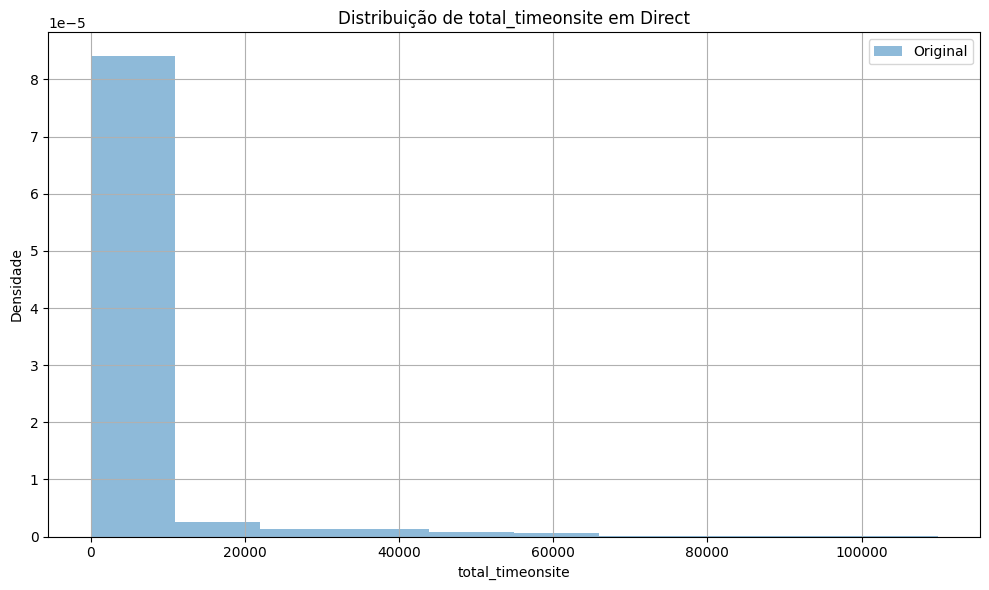

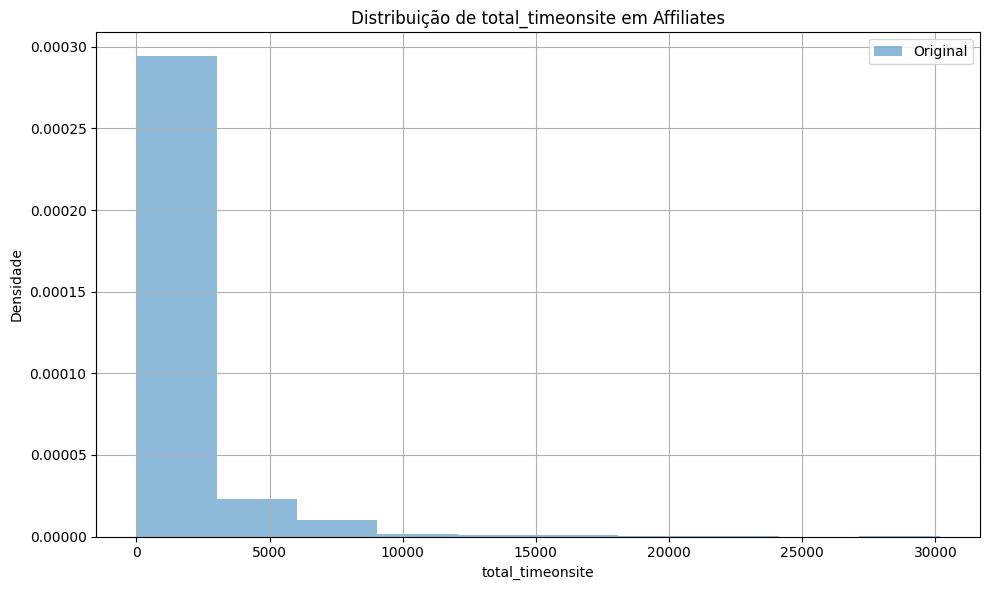

In [29]:
# 'total_timeonsite' é a variável que foi imputada
# 'channel_grouping' é a coluna que define os subgrupos

# Define os subgrupos relevantes
subgroups = df_hearing['channel_grouping'].unique()

# Itera por cada subgrupo
for subgroup in subgroups:
    # Filtra os dados para o subgrupo atual
    subgroup_data = df_hearing[df_hearing['channel_grouping'] == subgroup]

    # Cria uma figura para cada subgrupo com tamanho ajustado (largura, altura)
    plt.figure(figsize=(10, 6))  # Exemplo: largura 10 polegadas, altura 6 polegadas

    # Filtra os dados originais (antes da imputação)
    original_data = subgroup_data['total_timeonsite']

    # Cria histograma para os dados originais
    original_data.hist(alpha=0.5, label='Original', density=True)

    # Título do gráfico considerando o subgrupo e a variável imputada
    plt.title(f'Distribuição de total_timeonsite em {subgroup}')
    plt.xlabel('total_timeonsite')
    plt.ylabel('Densidade')
    plt.legend()

    plt.tight_layout()  # Ajusta automaticamente a disposição dos elementos no gráfico
    plt.show()

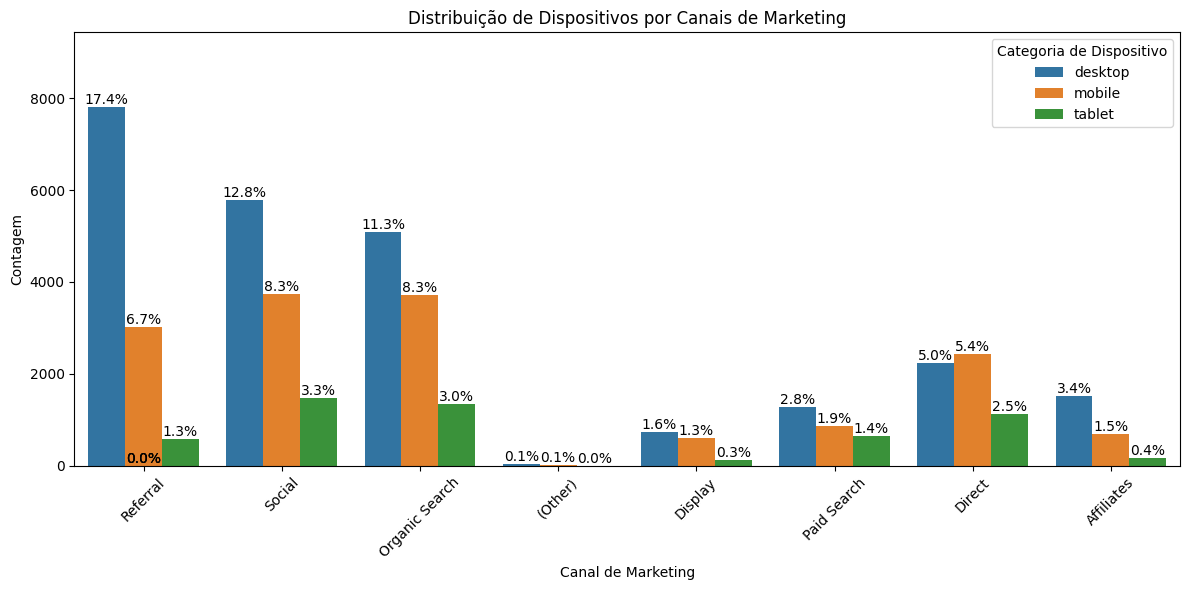

In [30]:
plt.figure(figsize=(12, 6))

# Plotando o gráfico de contagem de dispositivos por canal de marketing
ax = sns.countplot(x='channel_grouping', hue='device_category', data=df_hearing)

# Obtendo o total de observações para normalização
total = len(df_hearing)

# Calculando as porcentagens para cada grupo dentro de cada canal de marketing
for p in ax.patches:
    # Obtendo as coordenadas da barra atual
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Formatando a porcentagem
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Posicionando o texto no topo da barra
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Dispositivos por Canais de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Categoria de Dispositivo')

# Configurando os limites do eixo y para mostrar as porcentagens no topo
plt.ylim(0, ax.get_ylim()[1] * 1.15)  # Aumentando o limite para acomodar as porcentagens

plt.tight_layout()
plt.show()

In [31]:
# Contagem detalhada de fontes de tráfego
source_counts = df_hearing['source'].value_counts()

# Mostrar cada source e sua contagem
print("Detalhamento das Fontes de Tráfego:")
for source, count in source_counts.items():
    print(f"{source}: {count}")

# Número total de fontes de tráfego únicas
num_sources = source_counts.size
print(f'\nNúmero de fontes de tráfego únicas: {num_sources}')

Detalhamento das Fontes de Tráfego:
(direct): 10262
youtube.com: 6750
google: 5859
Partners: 2354
google.com: 1779
baidu: 1442
analytics.google.com: 1380
dfa: 1339
siliconvalley.about.com: 1012
qiita.com: 949
yahoo: 879
bing: 844
m.facebook.com: 750
quora.com: 683
reddit.com: 630
facebook.com: 563
t.co: 472
mail.google.com: 472
blog.golang.org: 454
sites.google.com: 416
l.facebook.com: 362
google.co.jp: 294
productforums.google.com: 290
groups.google.com: 283
dealspotr.com: 270
sashihara.jp: 243
ask: 207
plus.google.com: 193
docs.google.com: 188
phandroid.com: 175
google.co.uk: 168
duckduckgo.com: 161
m.baidu.com: 126
googleads.g.doubleclick.net: 117
lunametrics.com: 101
optimize.google.com: 98
int.search.tb.ask.com: 98
support.google.com: 84
search.mysearch.com: 72
outlook.live.com: 71
m.youtube.com: 63
s0.2mdn.net: 63
m.reddit.com: 58
adwords.google.com: 56
connect.googleforwork.com: 55
google.co.in: 49
hangouts.google.com: 49
lm.facebook.com: 48
google.de: 45
images.google: 43
gophe

O gráfico mostra as 20 fontes de tráfego (sites ou plataformas) que têm o maior número de usuários com base nos dados analisados.
Essas fontes de tráfego são classificadas em ordem decrescente de frequência. Ou seja, a barra mais alta representa a fonte de tráfego mais frequente, a segunda barra mais alta representa a segunda fonte de tráfego mais frequente, e assim por diante.

In [32]:
# Calcular tempo total em cada fonte (source)
source_total_time = df_hearing.groupby('source')['total_timeonsite'].sum()

# Selecionar os top 20 fontes com maior tempo total
top_20_sources = source_total_time.nlargest(20)

print(top_20_sources)

source
(direct)                   6.487694e+07
google                     3.535320e+07
youtube.com                7.704220e+06
analytics.google.com       2.715294e+06
Partners                   2.454070e+06
dfa                        1.109697e+06
google.com                 7.247142e+05
facebook.com               4.781365e+05
sites.google.com           4.132004e+05
mail.google.com            3.747330e+05
siliconvalley.about.com    3.602462e+05
bing                       3.221729e+05
m.facebook.com             2.968301e+05
qiita.com                  2.653148e+05
baidu                      2.520563e+05
yahoo                      2.454688e+05
l.facebook.com             2.017960e+05
groups.google.com          1.596532e+05
dealspotr.com              1.591181e+05
reddit.com                 1.531002e+05
Name: total_timeonsite, dtype: float64


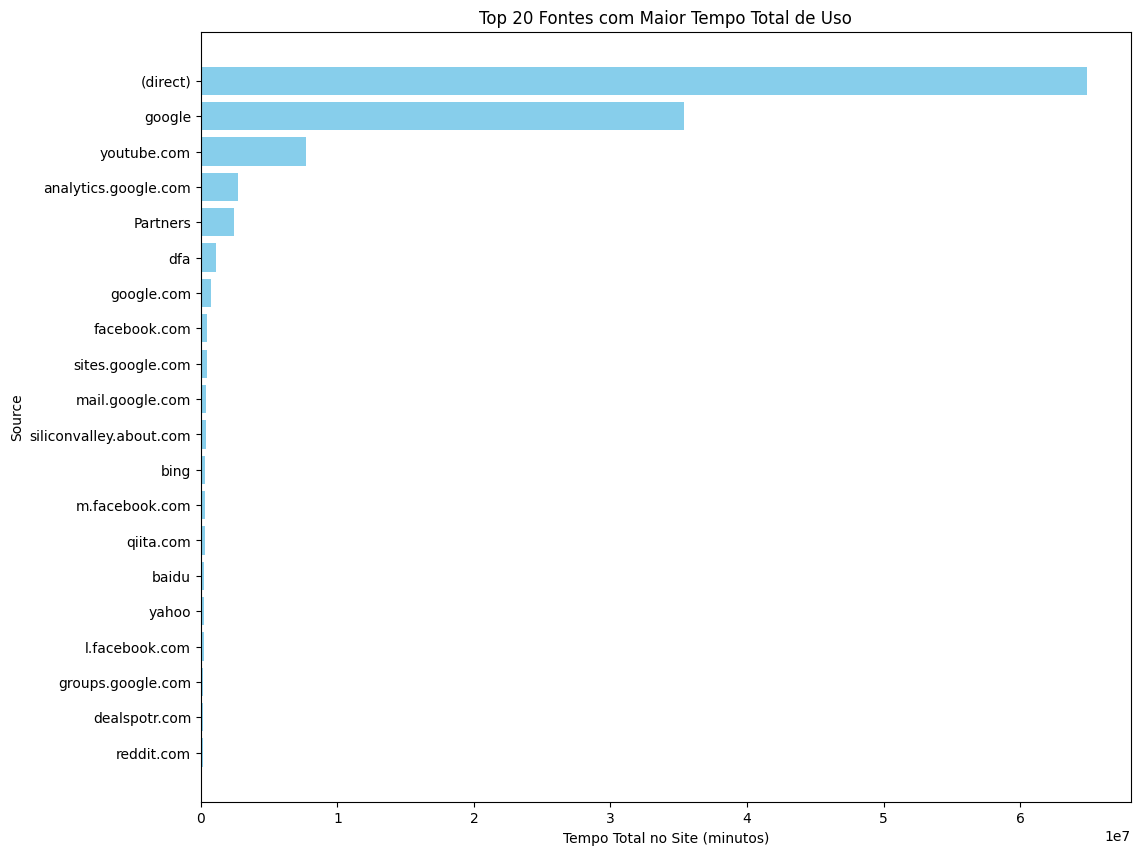

In [33]:
# Criar o gráfico de barras horizontal
plt.figure(figsize=(12, 10))
plt.barh(top_20_sources.index, top_20_sources.values, color='skyblue')
plt.xlabel('Tempo Total no Site (minutos)')
plt.ylabel('Source')
plt.title('Top 20 Fontes com Maior Tempo Total de Uso')
plt.gca().invert_yaxis()  # Inverter a ordem das fontes para o maior tempo estar no topo
plt.show()

In [34]:
#Verificar as informação
df_hearing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              45006 non-null  datetime64[ns]
 1   channel_grouping  45006 non-null  object        
 2   source            45006 non-null  object        
 3   device_category   45006 non-null  object        
 4   browser           45006 non-null  object        
 5   total_visits      45006 non-null  int64         
 6   total_pageviews   45005 non-null  float64       
 7   total_timeonsite  45006 non-null  float64       
 8   total_users       45006 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [35]:
# Contagem total de NaN
total_nan = df_hearing.isna().sum()

#print
total_nan

date                0
channel_grouping    0
source              0
device_category     0
browser             0
total_visits        0
total_pageviews     1
total_timeonsite    0
total_users         0
dtype: int64

In [36]:
# Identifique o índice da linha com NaN
linha_com_nan = df_hearing['total_pageviews'].isna().idxmax()
linha_com_nan

30583

In [37]:
# Exclua a linha com NaN
df_hearing.drop(linha_com_nan, inplace=True)

In [38]:
# Contagem total de NaN Pageviews
total_nan = df_hearing.isna().sum()

#print
total_nan

date                0
channel_grouping    0
source              0
device_category     0
browser             0
total_visits        0
total_pageviews     0
total_timeonsite    0
total_users         0
dtype: int64

In [39]:
#Verificar as informação
df_hearing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45005 entries, 0 to 45005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              45005 non-null  datetime64[ns]
 1   channel_grouping  45005 non-null  object        
 2   source            45005 non-null  object        
 3   device_category   45005 non-null  object        
 4   browser           45005 non-null  object        
 5   total_visits      45005 non-null  int64         
 6   total_pageviews   45005 non-null  float64       
 7   total_timeonsite  45005 non-null  float64       
 8   total_users       45005 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 3.4+ MB


In [40]:
# Extrair o ano da coluna 'date'
df_hearing['year'] = df_hearing['date'].dt.year

# Obter os anos distintos
unique_years = df_hearing['year'].unique()

# Contar o número de anos distintos
num_years = len(unique_years)

print(f"Anos distintos na coluna 'date': {unique_years}")
print(f"Número de anos distintos: {num_years}")

Anos distintos na coluna 'date': [2017 2016]
Número de anos distintos: 2


In [41]:
device_category_time = df_hearing.groupby('device_category')['total_timeonsite'].sum()
total_timeonsite = device_category_time.sum()
percentages_time = (device_category_time / total_timeonsite) * 100

# Exibindo as porcentagens por categoria de dispositivo
for device, percentage in percentages_time.items():
    print(f'{device}: {percentage:.1f}%')

desktop: 76.3%
mobile: 20.3%
tablet: 3.4%


In [42]:
# Calcular número de navegadores únicos
num_browsers = df_hearing['browser'].nunique()
print(f"Número de navegadores únicos: {num_browsers}")

Número de navegadores únicos: 54


In [43]:
# Visualizar os navegadores únicos para ajudar na estratégia de segmentação
unique_browsers = df_hearing['browser'].unique()
print(f"Navegadores únicos: {unique_browsers}")

Navegadores únicos: ['Chrome' 'Opera' 'Safari' 'Firefox' 'Internet Explorer' 'Android Webview'
 'Safari (in-app)' 'Edge' 'Android Browser' 'UC Browser' 'YaBrowser'
 'Opera Mini' 'Mozilla Compatible Agent' 'Maxthon' 'MRCHROME' 'HTC802t_TD'
 'Coc Coc' 'MQQBrowser' 'Hisense M20-M_LTE' 'SeaMonkey' 'Nintendo Browser'
 'Amazon Silk' 'BlackBerry' 'Puffin' 'TCL P500M' 'M5' 'Lunascape' 'Seznam'
 'Nokia Browser' 'Iron' 'YE' '[Use default User-agent string] LIVRENPOCHE'
 'NokiaE52-1' 'Apple-iPhone7C2' 'Android Runtime' 'no-ua' '(not set)'
 'ThumbSniper' 'Mozilla' 'osee2unifiedRelease'
 'subjectAgent: NoticiasBoom' 'ADM' 0 'LYF_LS_4002_12'
 'IE with Chrome Frame' 'Reddit' 'LYF_LS_4002_11' 'Nichrome' 'DASH_JR_3G'
 'Konqueror' 'User Agent' 'CSM Click' 'Changa 99695759' 'DoCoMo']


<ipython-input-44-9a7c6760f657>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=browser_time_count_sorted.values, y=browser_time_count_sorted.index, palette='viridis', orient='h')


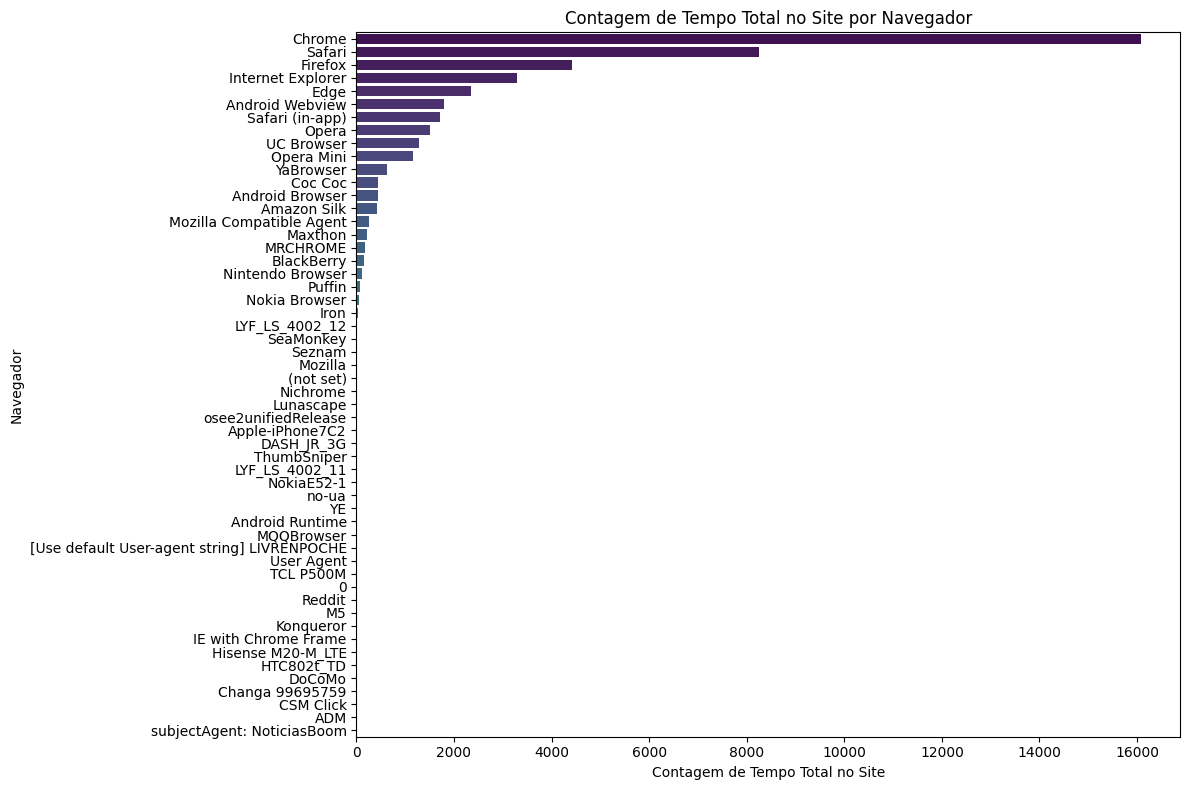

In [44]:
# Calcular contagem de tempo total no site por navegador (browser)
browser_time_count = df_hearing.groupby('browser')['total_timeonsite'].count()

# Ordenar os navegadores pela contagem de tempo total no site
browser_time_count_sorted = browser_time_count.sort_values(ascending=False)

# Criar gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sns.barplot(x=browser_time_count_sorted.values, y=browser_time_count_sorted.index, palette='viridis', orient='h')
plt.title('Contagem de Tempo Total no Site por Navegador')
plt.xlabel('Contagem de Tempo Total no Site')
plt.ylabel('Navegador')
plt.tight_layout()
plt.show()

In [45]:
# Calcular tempo total em cada fonte (source)
browser_total_time = df_hearing.groupby('browser')['total_timeonsite'].sum()

# Selecionar os top 20 fontes com maior tempo total
top_20_browser = browser_total_time.nlargest(20)

print(top_20_browser)

browser
Chrome                      9.297641e+07
Safari                      1.623331e+07
Firefox                     4.605875e+06
Internet Explorer           1.874125e+06
Edge                        1.218428e+06
Android Webview             7.031708e+05
Opera                       6.518648e+05
Safari (in-app)             5.320055e+05
Opera Mini                  4.828192e+05
UC Browser                  2.056075e+05
YaBrowser                   1.474823e+05
Amazon Silk                 8.277799e+04
Coc Coc                     7.835980e+04
Android Browser             5.781498e+04
Mozilla Compatible Agent    5.294392e+04
Maxthon                     3.040018e+04
BlackBerry                  1.837262e+04
MRCHROME                    1.518724e+04
Nintendo Browser            1.368907e+04
Puffin                      8.441538e+03
Name: total_timeonsite, dtype: float64


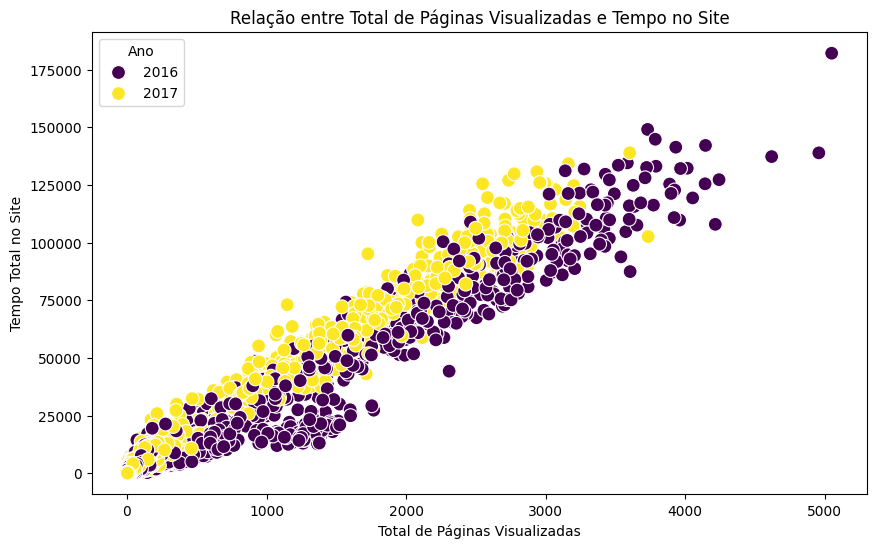

In [46]:
# Criando um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_pageviews', y='total_timeonsite', data=df_hearing, hue='year', palette='viridis', s=100)
plt.title('Relação entre Total de Páginas Visualizadas e Tempo no Site')
plt.xlabel('Total de Páginas Visualizadas')
plt.ylabel('Tempo Total no Site')
plt.legend(title='Ano')
plt.show()

<ipython-input-47-10674e983bd9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='total_timeonsite', data=df_hearing, palette='viridis', edgecolor=None)


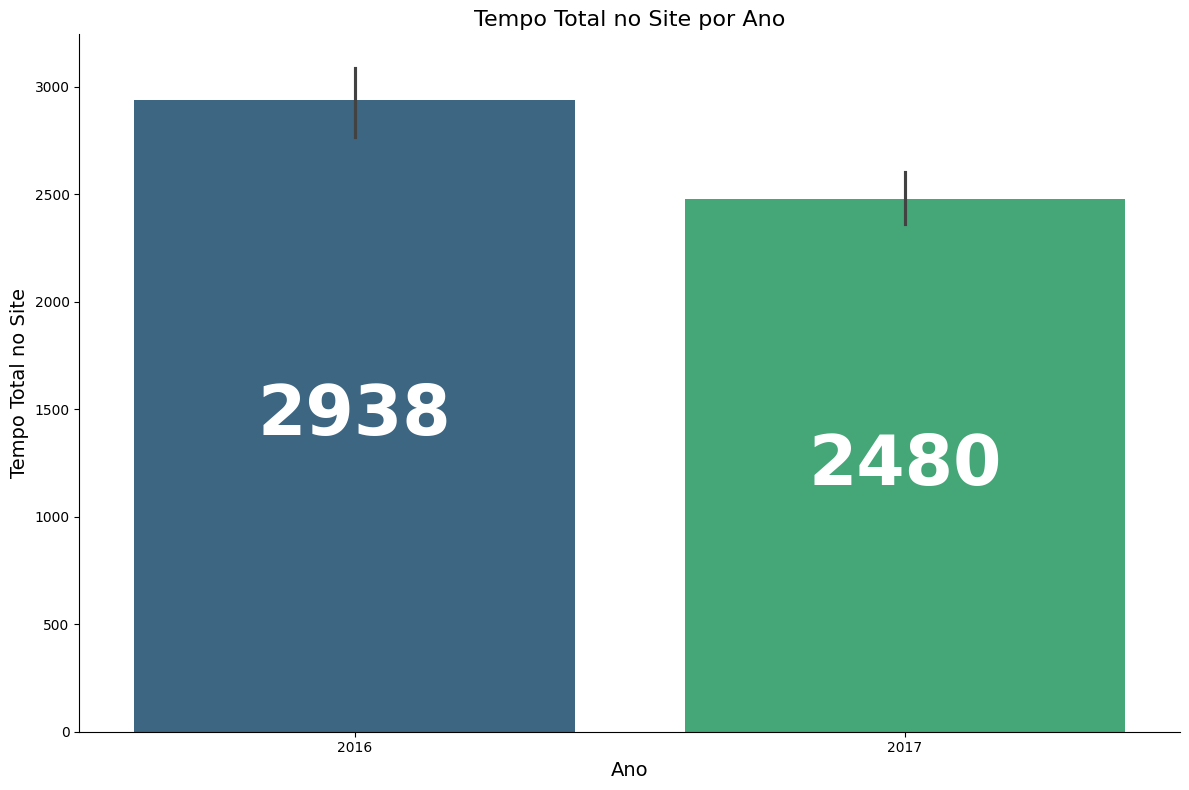

In [47]:
plt.figure(figsize=(12, 8))

# Criando o gráfico de barras sem bordas nas barras
ax = sns.barplot(x='year', y='total_timeonsite', data=df_hearing, palette='viridis', edgecolor=None)

# Configurando o posicionamento dos números no meio das barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', fontsize=50, color='white', weight='bold')

# Removendo as linhas da grade
ax.grid(False)

# Removendo as bordas do gráfico
sns.despine()

# Configurações do gráfico
plt.title('Tempo Total no Site por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Tempo Total no Site', fontsize=14)

plt.tight_layout()
plt.show()

Aqui você consegue  ver comportamento dos usuários em seu site. Ao analisar o tempo total gasto no site ao longo do tempo, onde mostra os anos de 2016 e 2017, pode identificar tendências, decisões mais estratégicas e aumentar o engajamento dos usuários.


In [48]:
# Definindo o estilo globalmente
sns.set_style('white')

<ipython-input-49-eae5f12966b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='year', y='total_timeonsite', data=df_hearing, palette='Pastel1')


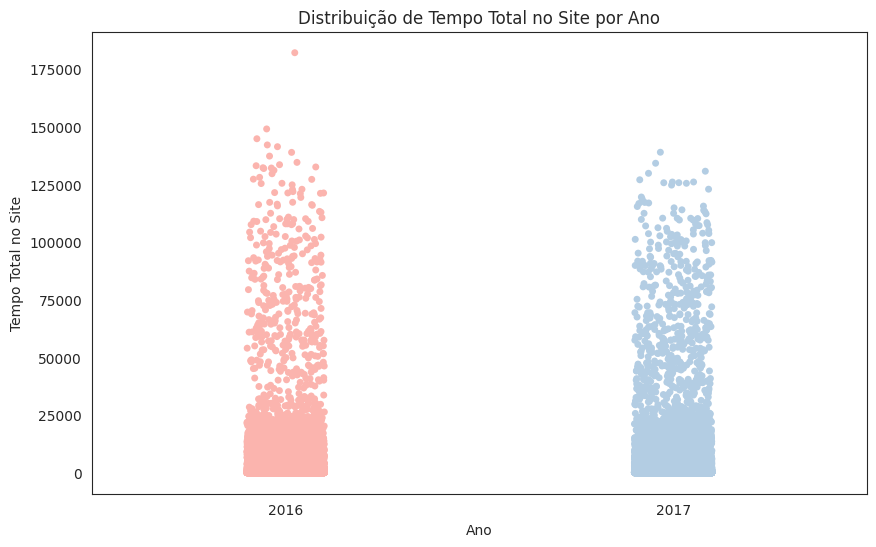

In [49]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='year', y='total_timeonsite', data=df_hearing, palette='Pastel1')
plt.title('Distribuição de Tempo Total no Site por Ano')
plt.xlabel('Ano')
plt.ylabel('Tempo Total no Site')
plt.show()

<ipython-input-50-79ef3ea4a526>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_hearing.loc[df_hearing['year'] == year, 'total_timeonsite'], label=year, shade=True)
<ipython-input-50-79ef3ea4a526>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_hearing.loc[df_hearing['year'] == year, 'total_timeonsite'], label=year, shade=True)


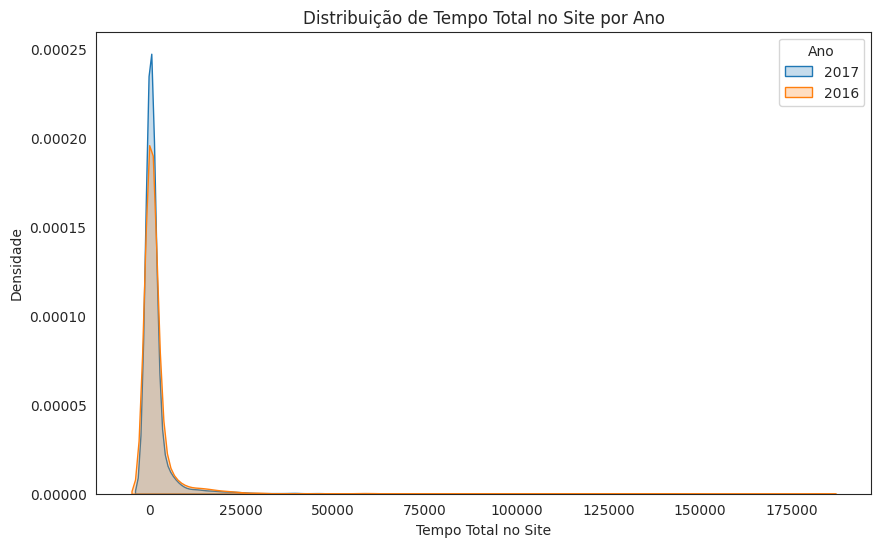

In [50]:
plt.figure(figsize=(10, 6))
for year in df_hearing['year'].unique():
    sns.kdeplot(df_hearing.loc[df_hearing['year'] == year, 'total_timeonsite'], label=year, shade=True)
plt.title('Distribuição de Tempo Total no Site por Ano')
plt.xlabel('Tempo Total no Site')
plt.ylabel('Densidade')
plt.legend(title='Ano')
plt.show()

In [52]:
# Renomeando as colunas do DataFrame
df_hearing.rename(columns={
    'date': 'data',
    'channel_grouping': 'canal_de_marketing',
    'source': 'origem',
    'device_category': 'categoria_de_dispositivo',
    'browser': 'navegador',
    'total_visits': 'total_visitas',
    'total_pageviews': 'total_paginas_visualizadas',
    'total_timeonsite': 'tempo_total_no_site',
    'total_users': 'total_usuarios',
    'year': 'ano'
}, inplace=True)

<ipython-input-53-a5df29423a80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ano', y='total_visitas', data=visitas_por_ano, palette='Pastel1')


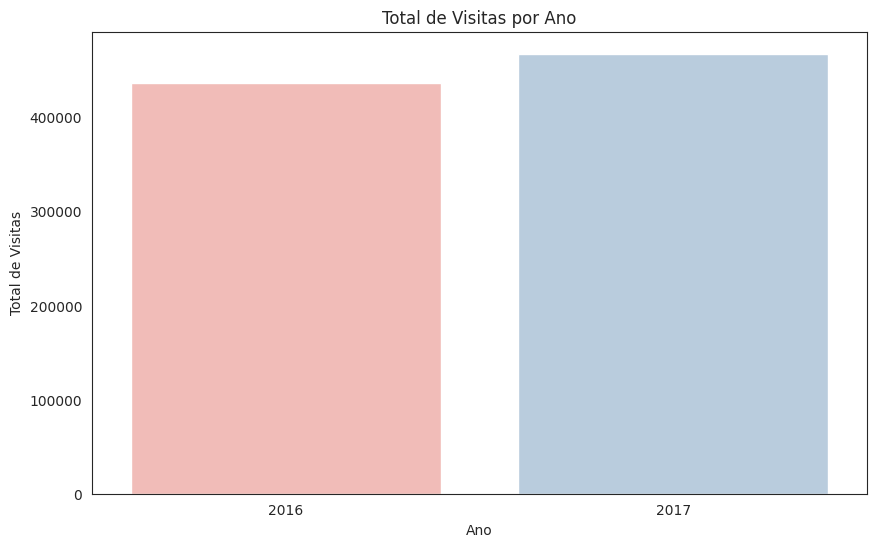

In [53]:
# Agrupar os dados somando as visitas por ano
visitas_por_ano = df_hearing.groupby('ano')['total_visitas'].sum().reset_index()

# Criar gráfico correto
plt.figure(figsize=(10, 6))
sns.barplot(x='ano', y='total_visitas', data=visitas_por_ano, palette='Pastel1')

# Personalização do gráfico
plt.title('Total de Visitas por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Visitas')

# Exibir o gráfico
plt.show()


In [54]:
print(df_hearing.columns)  # Lista todas as colunas disponíveis

Index(['data', 'canal_de_marketing', 'origem', 'categoria_de_dispositivo',
       'navegador', 'total_visitas', 'total_paginas_visualizadas',
       'tempo_total_no_site', 'total_usuarios', 'ano'],
      dtype='object')


In [55]:
# Selecionando apenas os anos 2016 e 2017
df_filtrado = df_hearing[df_hearing['ano'].isin([2016, 2017])]

# Agrupando por ano e canal para somar as visitas
visitas_por_canal = df_filtrado.groupby(['ano', 'canal_de_marketing'])['total_visitas'].sum().reset_index()

# Exibir os números extraídos
print(visitas_por_canal)

     ano canal_de_marketing  total_visitas
0   2016            (Other)              6
1   2016         Affiliates           6642
2   2016             Direct          56597
3   2016            Display           2958
4   2016     Organic Search         147126
5   2016        Paid Search          11076
6   2016           Referral          46007
7   2016             Social         165981
8   2017            (Other)            114
9   2017         Affiliates           9761
10  2017             Direct          86429
11  2017            Display           3304
12  2017     Organic Search         234435
13  2017        Paid Search          14250
14  2017           Referral          58830
15  2017             Social          60136


In [56]:
# Filtrar apenas os anos de 2016 e 2017
df_filtrado = df_hearing[df_hearing['ano'].isin([2016, 2017])]

# Agrupar por ano e somar as visitas
total_visitas_por_ano = df_filtrado.groupby('ano')['total_visitas'].sum()

# Exibir o resultado
print(total_visitas_por_ano)

ano
2016    436393
2017    467259
Name: total_visitas, dtype: int64


In [57]:
# Somar todas as visitas de 2016 e 2017
total_geral = total_visitas_por_ano.sum()

print(f"Total de visitas em 2016 e 2017: {total_geral:,}")  # Exibe o número formatado

Total de visitas em 2016 e 2017: 903,652


In [58]:
# Agrupar as visitas por ano
visitas_por_ano = df_hearing.groupby('ano')['total_visitas'].sum()

# Calcular a porcentagem de cada ano em relação ao total
porcentagem_visitas = (visitas_por_ano / visitas_por_ano.sum()) * 100

# Exibir os resultados formatados
print(porcentagem_visitas)

ano
2016    48.292152
2017    51.707848
Name: total_visitas, dtype: float64


# Taxa de Conversão por Canal e Dispositivo

> **Vamos seguir os seguintes passos:**

1.   **Definir uma conversão:** Para este exemplo, consideramos uma conversão como qualquer visita com um total_timeonsite superior a 60 segundos.
2.   **Calcular a taxa de conversão:** A taxa de conversão é a razão entre o número de conversões e o número total de visitas para cada canal de marketing e dispositivo.
3.   **Visualizar os dados:** Usar gráficos de barra para visualizar a taxa de conversão por canal de marketing e dispositivo.




   

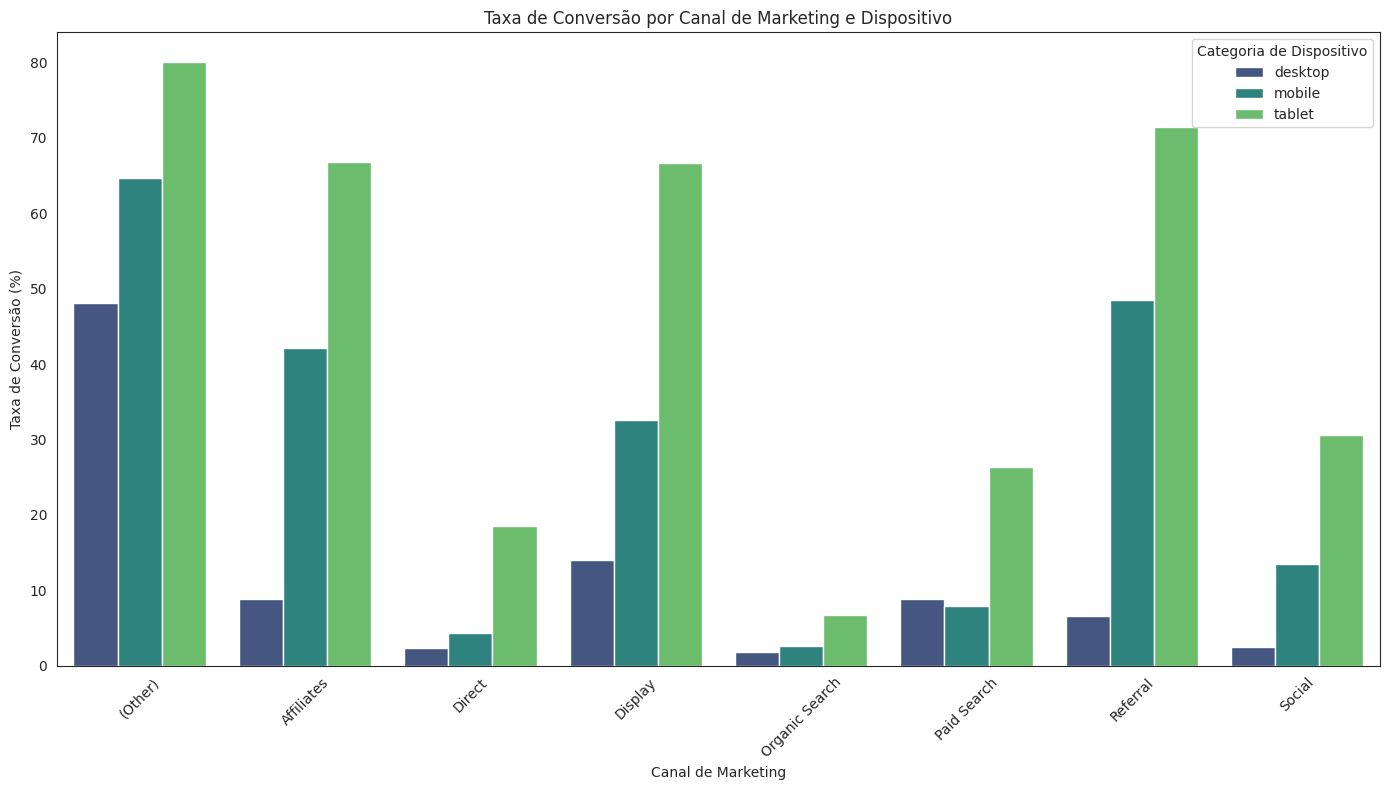

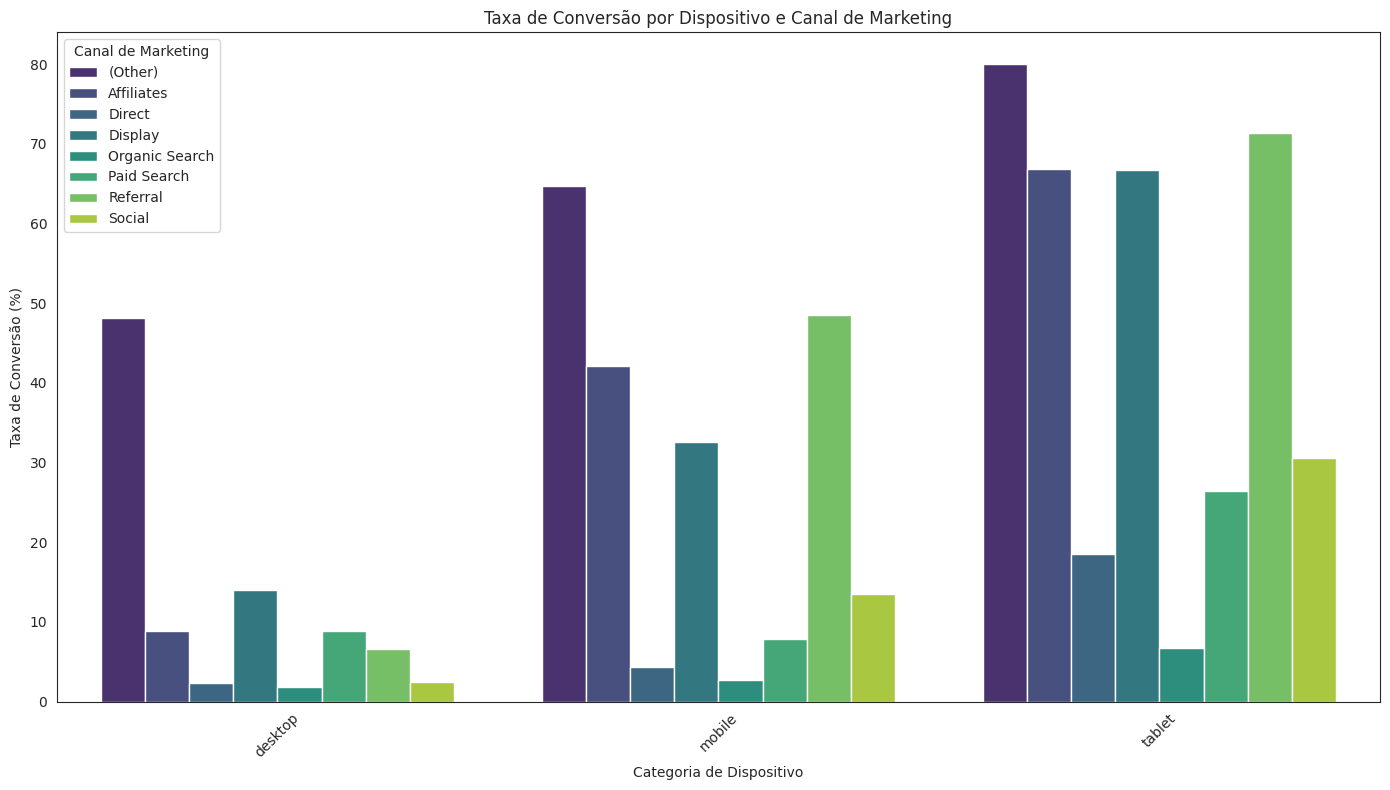

In [63]:
# Definir uma conversão como tempo_total_no_site superior a 60 segundos
conversion_threshold = 60
df_hearing['conversion'] = df_hearing['tempo_total_no_site'] > conversion_threshold

# Calcular taxa de conversão por canal de marketing e dispositivo
conversion_rate = df_hearing.groupby(['canal_de_marketing', 'categoria_de_dispositivo']).agg(
    total_visitas=('total_visitas', 'sum'),  # Renomeado para 'total_visitas'
    total_conversions=('conversion', 'sum')
)
conversion_rate['conversion_rate'] = conversion_rate['total_conversions'] / conversion_rate['total_visitas'] * 100

# Reset index para facilitar a plotagem
conversion_rate = conversion_rate.reset_index()

# Plotar taxa de conversão por canal de marketing
plt.figure(figsize=(14, 8))
sns.barplot(x='canal_de_marketing', y='conversion_rate', hue='categoria_de_dispositivo', data=conversion_rate, palette='viridis')
plt.title('Taxa de Conversão por Canal de Marketing e Dispositivo')
plt.xlabel('Canal de Marketing')
plt.ylabel('Taxa de Conversão (%)')
plt.legend(title='Categoria de Dispositivo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotar taxa de conversão por dispositivo
plt.figure(figsize=(14, 8))
sns.barplot(x='categoria_de_dispositivo', y='conversion_rate', hue='canal_de_marketing', data=conversion_rate, palette='viridis')
plt.title('Taxa de Conversão por Dispositivo e Canal de Marketing')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Taxa de Conversão (%)')
plt.legend(title='Canal de Marketing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

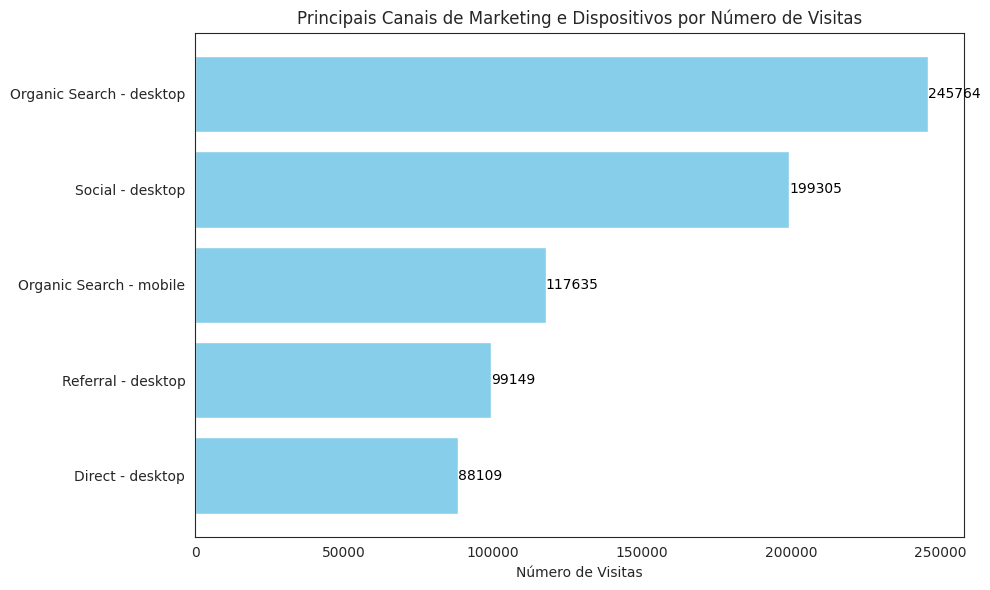

In [64]:
# Calcular o número de visitas por canal de marketing e dispositivo
visitas_por_canal_dispositivo = df_hearing.groupby(['canal_de_marketing', 'categoria_de_dispositivo'])['total_visitas'].sum().reset_index()

# Selecionar os principais canais de marketing e dispositivos por número de visitas (exemplo)
top_visitas = visitas_por_canal_dispositivo.nlargest(5, 'total_visitas')  # Seleciona os 5 principais com mais visitas

# Configurações do gráfico
plt.figure(figsize=(10, 6))
plt.barh(top_visitas['canal_de_marketing'] + ' - ' + top_visitas['categoria_de_dispositivo'], top_visitas['total_visitas'], color='skyblue')
plt.xlabel('Número de Visitas')
plt.title('Principais Canais de Marketing e Dispositivos por Número de Visitas')

# Inverter a ordem para exibir do maior para o menor
plt.gca().invert_yaxis()

# Mostrar os valores no gráfico
for i, v in enumerate(top_visitas['total_visitas']):
    plt.text(v + 50, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

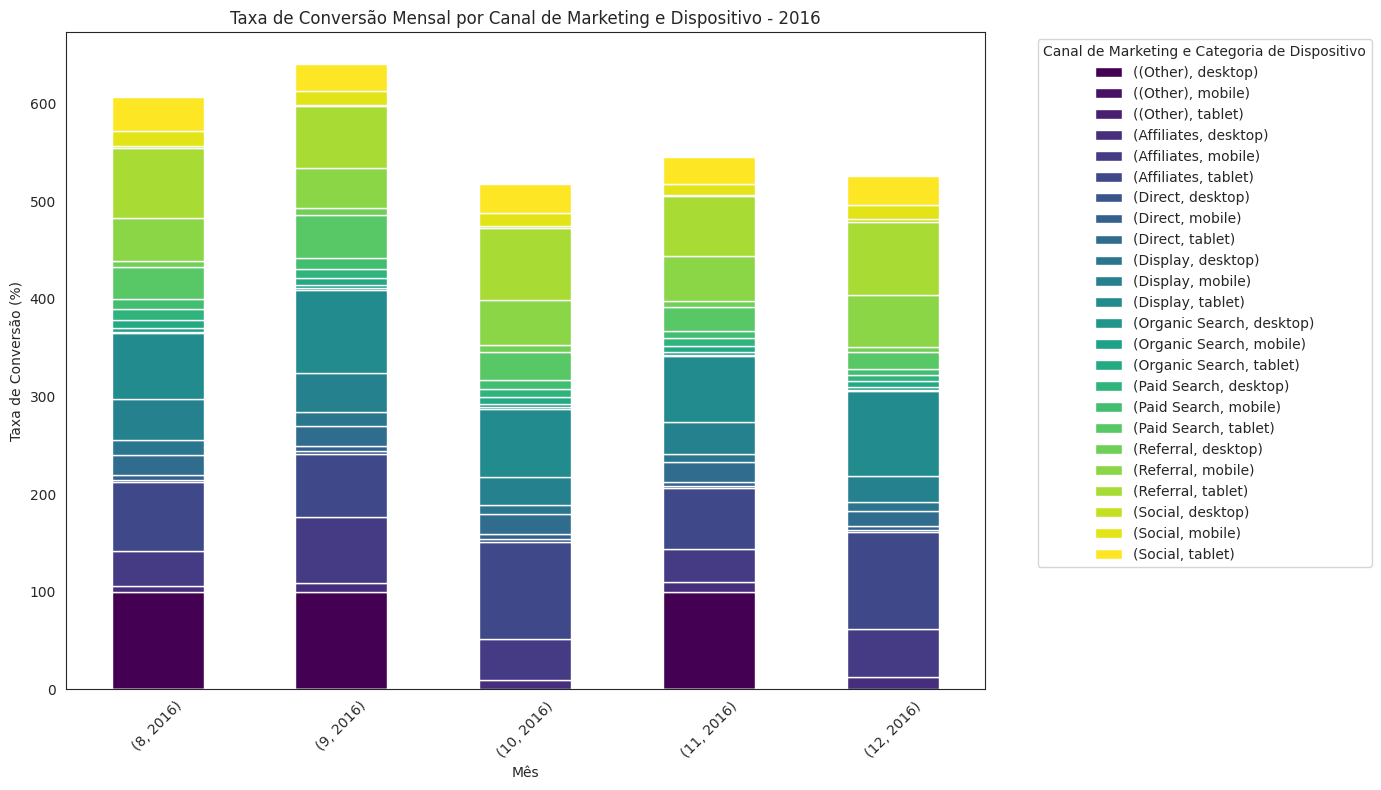

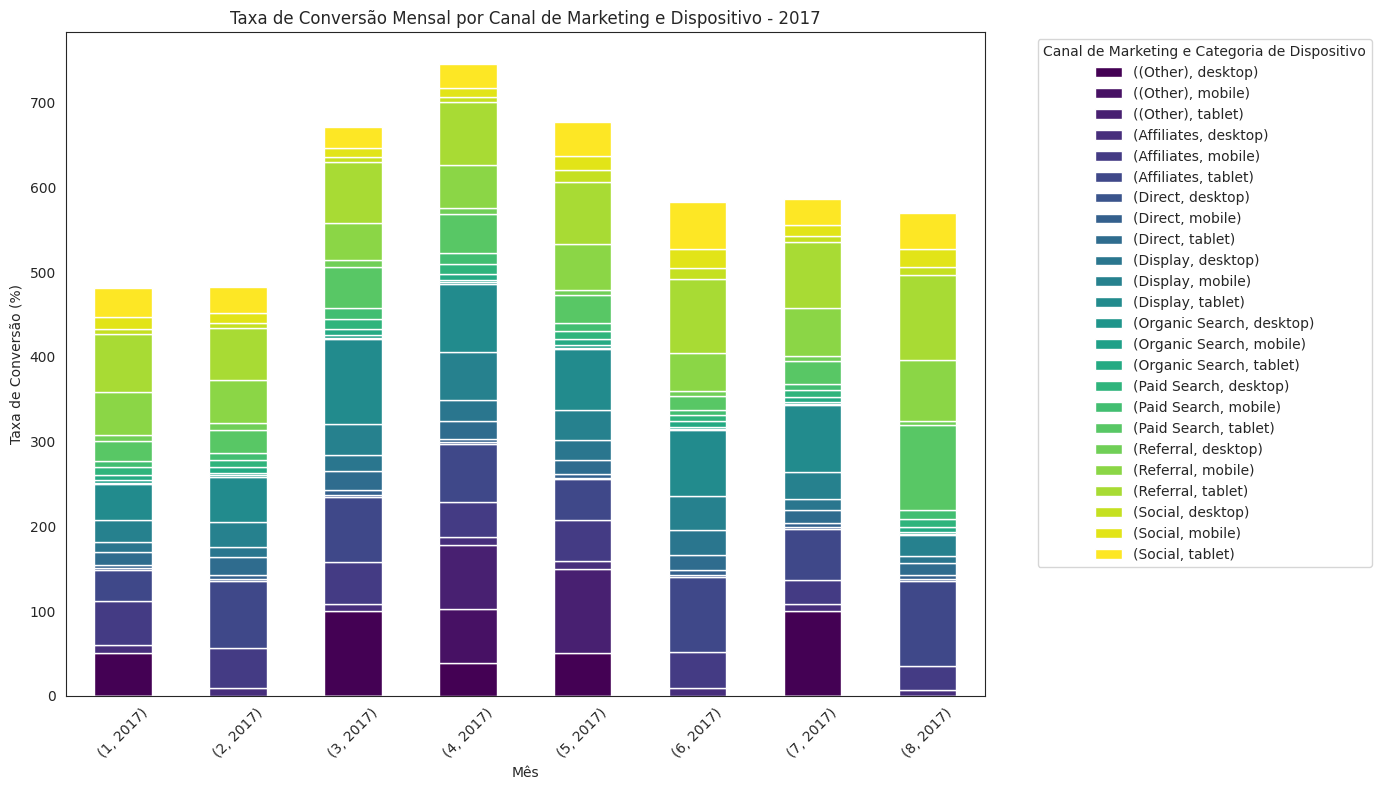

In [68]:
# Adicionando colunas de ano e mês
df_hearing['ano'] = pd.to_datetime(df_hearing['data']).dt.year
df_hearing['month'] = pd.to_datetime(df_hearing['data']).dt.month

# Definindo a conversão
conversion_threshold = 60
df_hearing['conversion'] = df_hearing['tempo_total_no_site'] > conversion_threshold

# Calcular a taxa de conversão mensal por dispositivo e canal de marketing
conversion_rate_monthly = df_hearing.groupby(['ano', 'month', 'canal_de_marketing', 'categoria_de_dispositivo']).agg(
    total_visits=('total_visitas', 'sum'),
    total_conversions=('conversion', 'sum')
)

# Calcular a taxa de conversão como porcentagem
conversion_rate_monthly['conversion_rate'] = (conversion_rate_monthly['total_conversions'] / conversion_rate_monthly['total_visits']) * 100

# Reset index para facilitar a visualização
conversion_rate_monthly = conversion_rate_monthly.reset_index()

# Filtrar dados para os anos 2016 e 2017
conversion_rate_2016_2017 = conversion_rate_monthly[conversion_rate_monthly['ano'].isin([2016, 2017])]

# Pivotar os dados para criar uma tabela de conversão mensal por canal e dispositivo
pivot_df = conversion_rate_2016_2017.pivot_table(index=['month', 'ano'], columns=['canal_de_marketing', 'categoria_de_dispositivo'], values='conversion_rate', fill_value=0)

# Plotar taxa de conversão mensal por dispositivo e canal de marketing para 2016
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.loc[(slice(None), 2016), :].plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
plt.title('Taxa de Conversão Mensal por Canal de Marketing e Dispositivo - 2016')
plt.xlabel('Mês')
plt.ylabel('Taxa de Conversão (%)')
plt.legend(title='Canal de Marketing e Categoria de Dispositivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotar taxa de conversão mensal por dispositivo e canal de marketing para 2017
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.loc[(slice(None), 2017), :].plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
plt.title('Taxa de Conversão Mensal por Canal de Marketing e Dispositivo - 2017')
plt.xlabel('Mês')
plt.ylabel('Taxa de Conversão (%)')
plt.legend(title='Canal de Marketing e Categoria de Dispositivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
df_hearing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45005 entries, 0 to 45005
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   data                        45005 non-null  datetime64[ns]
 1   canal_de_marketing          45005 non-null  object        
 2   origem                      45005 non-null  object        
 3   categoria_de_dispositivo    45005 non-null  object        
 4   navegador                   45005 non-null  object        
 5   total_visitas               45005 non-null  int64         
 6   total_paginas_visualizadas  45005 non-null  float64       
 7   tempo_total_no_site         45005 non-null  float64       
 8   total_usuarios              45005 non-null  int64         
 9   ano                         45005 non-null  int32         
 10  conversion                  45005 non-null  bool          
 11  month                       45005 non-null  int32         


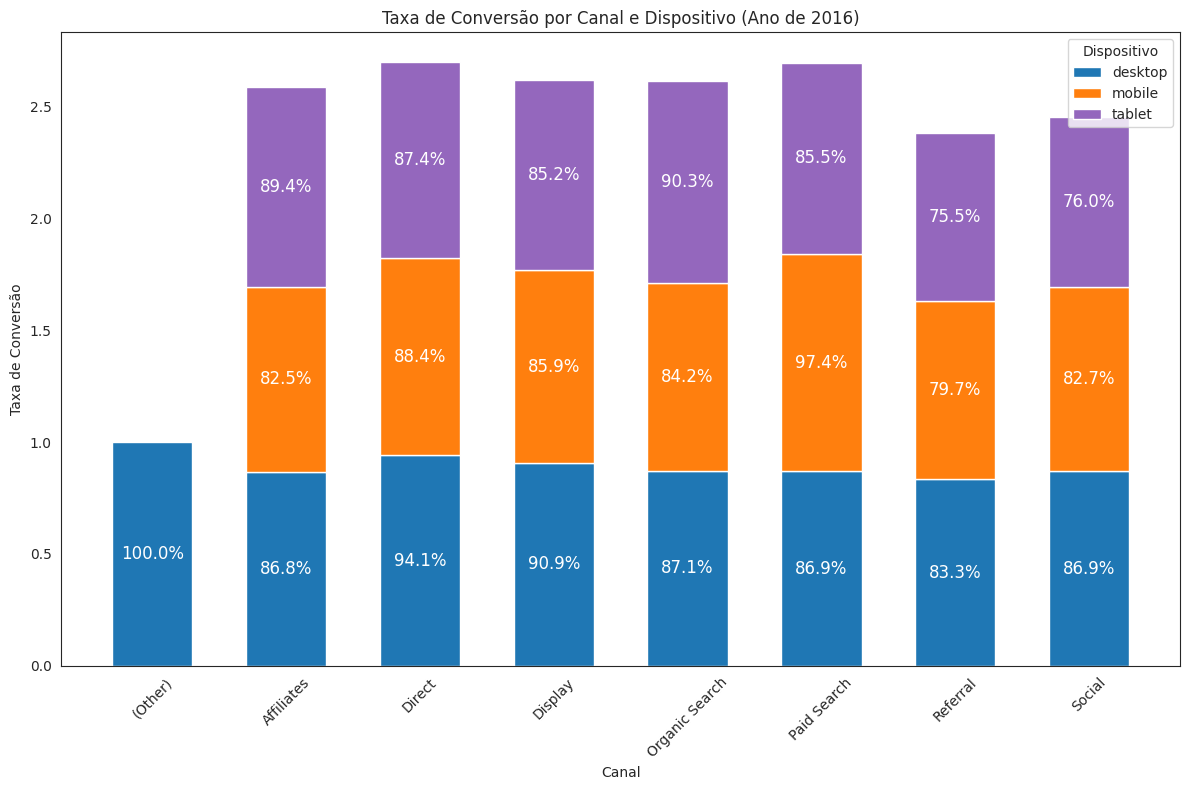

In [71]:
# Filtrar dados para o ano de 2016
df_filtered = df_hearing[df_hearing['ano'] == 2016]

# Calcular taxa de conversão por canal e dispositivo
conversion_rate = df_filtered.groupby(['canal_de_marketing', 'categoria_de_dispositivo'])['conversion'].mean().reset_index()

# Preparar os dados para o gráfico de barras empilhadas
pivot_data = conversion_rate.pivot_table(values='conversion', index='canal_de_marketing', columns='categoria_de_dispositivo').reset_index()

# Ordenar os dados para facilitar a visualização
pivot_data = pivot_data.sort_values(by='canal_de_marketing')

# Configurar o gráfico
plt.figure(figsize=(12, 8))

# Cores para os dispositivos
colors = ['#1f77b4', '#ff7f0e', '#9467bd']  # Azul, laranja, roxo

# Plotar as barras empilhadas
bar_width = 0.6
devices = pivot_data.columns[1:]
bottom = np.zeros(len(pivot_data))
for idx, device in enumerate(devices):
    plt.bar(pivot_data['canal_de_marketing'], pivot_data[device], bottom=bottom, label=device, color=colors[idx % len(colors)], width=bar_width)
    bottom += pivot_data[device]

# Configurar o título e os rótulos dos eixos
plt.title('Taxa de Conversão por Canal e Dispositivo (Ano de 2016)')
plt.xlabel('Canal')
plt.ylabel('Taxa de Conversão')
plt.xticks(rotation=45)
plt.legend(title='Dispositivo')

# Exibir as porcentagens nas barras
for idx, row in pivot_data.iterrows():
    total_height = 0
    for device in devices:
        height = row[device]
        plt.text(idx, total_height + height / 2, f'{height*100:.1f}%', ha='center', va='center', fontsize=12, color='white')
        total_height += height

plt.tight_layout()
plt.show()

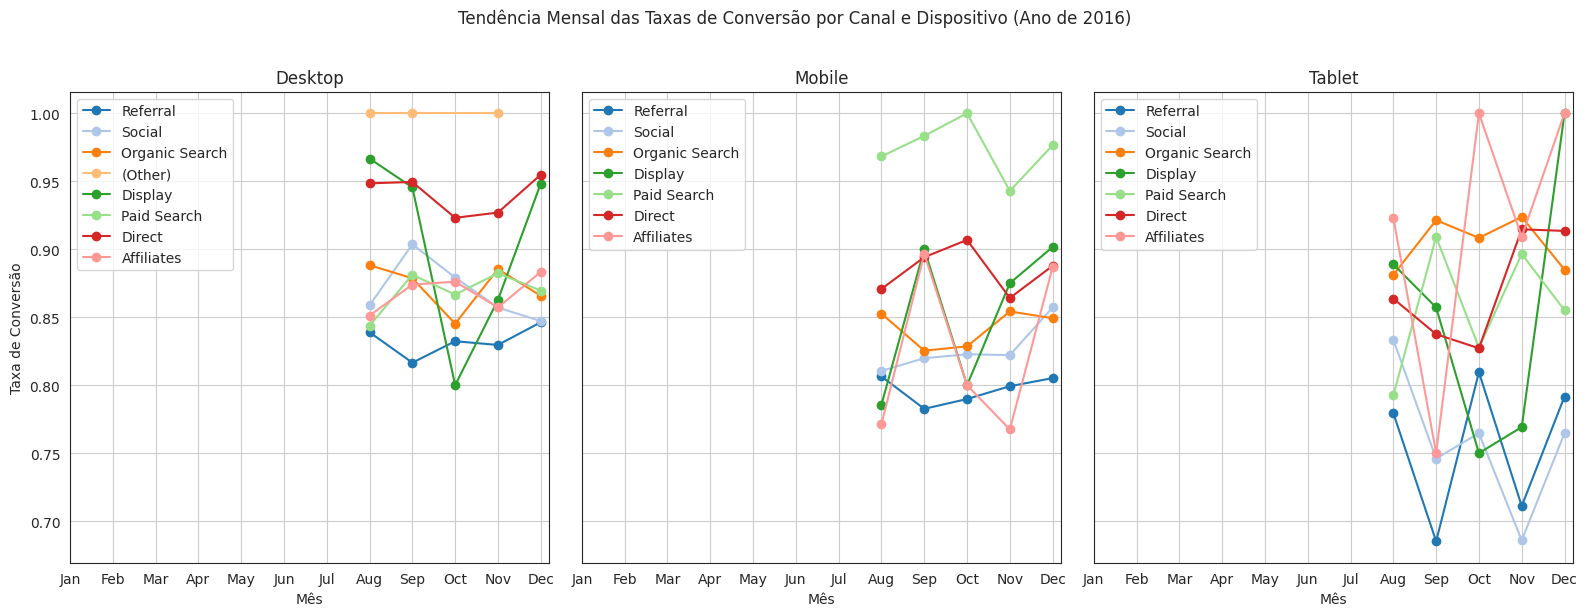

In [73]:
# Filtrar dados para o ano de 2016
df_filtered = df_hearing[df_hearing['ano'] == 2016]

# Calcular a média mensal das taxas de conversão por canal e dispositivo
conversion_rate_monthly = df_filtered.groupby(['canal_de_marketing', 'categoria_de_dispositivo', 'month'])['conversion'].mean().reset_index()

# Configurar o gráfico de linhas para cada combinação de canal e dispositivo
devices = df_filtered['categoria_de_dispositivo'].unique()
channels = df_filtered['canal_de_marketing'].unique()

fig, axes = plt.subplots(1, len(devices), figsize=(16, 6), sharey=True)

# Lista de cores para canais
colors = plt.cm.tab20.colors

for i, device in enumerate(devices):
    ax = axes[i] if len(devices) > 1 else axes
    for j, channel in enumerate(channels):
        df_plot = conversion_rate_monthly[(conversion_rate_monthly['categoria_de_dispositivo'] == device) & (conversion_rate_monthly['canal_de_marketing'] == channel)]
        if not df_plot.empty:
            ax.plot(df_plot['month'], df_plot['conversion'], marker='o', linestyle='-', label=f'{channel}', color=colors[j])
    ax.set_title(f'{device.capitalize()}')
    ax.set_xlabel('Mês')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if i == 0:
        ax.set_ylabel('Taxa de Conversão')
    ax.grid(True)
    ax.legend()

plt.suptitle('Tendência Mensal das Taxas de Conversão por Canal e Dispositivo (Ano de 2016)', y=1.02)
plt.tight_layout()
plt.show()

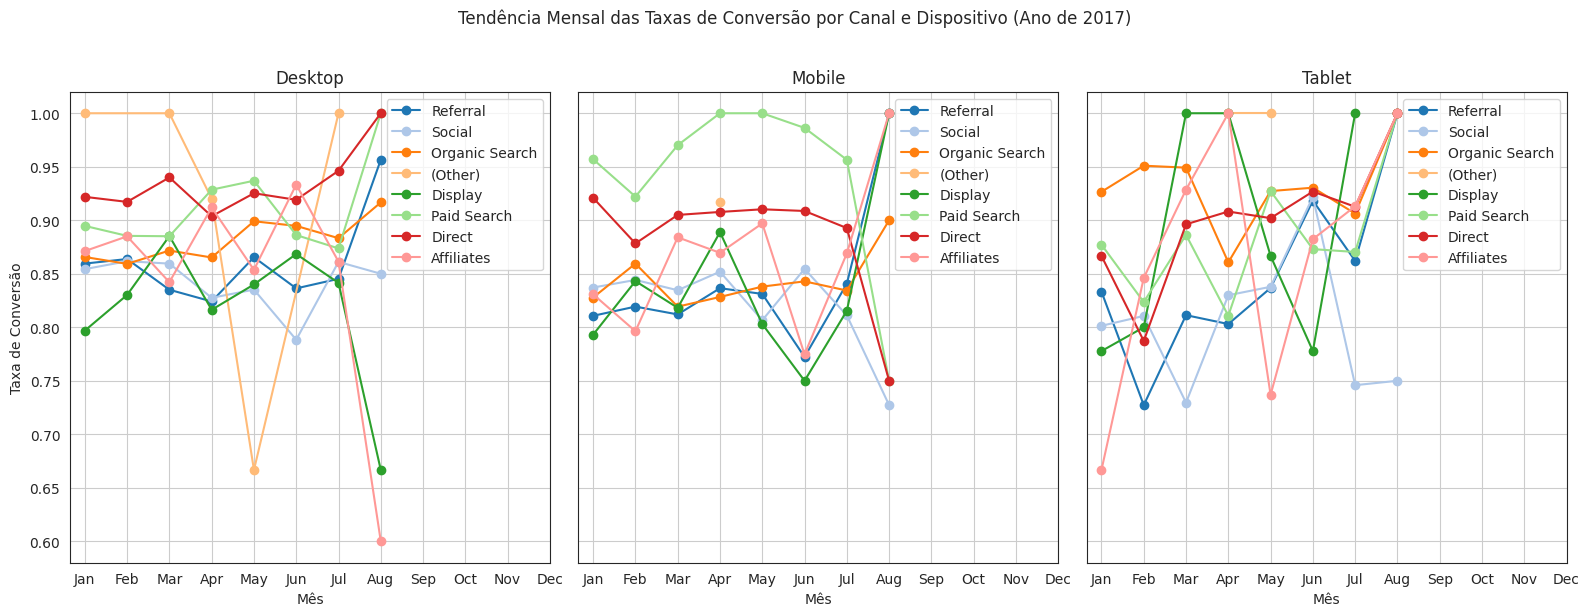

In [74]:
# Filtrar dados para o ano de 2017
df_filtered = df_hearing[df_hearing['ano'] == 2017]

# Calcular a média mensal das taxas de conversão por canal e dispositivo
conversion_rate_monthly = df_filtered.groupby(['canal_de_marketing', 'categoria_de_dispositivo', 'month'])['conversion'].mean().reset_index()

# Configurar o gráfico de linhas para cada combinação de canal e dispositivo
devices = df_filtered['categoria_de_dispositivo'].unique()
channels = df_filtered['canal_de_marketing'].unique()

fig, axes = plt.subplots(1, len(devices), figsize=(16, 6), sharey=True)

# Lista de cores para canais
colors = plt.cm.tab20.colors

for i, device in enumerate(devices):
    ax = axes[i] if len(devices) > 1 else axes
    for j, channel in enumerate(channels):
        df_plot = conversion_rate_monthly[(conversion_rate_monthly['categoria_de_dispositivo'] == device) & (conversion_rate_monthly['canal_de_marketing'] == channel)]
        if not df_plot.empty:
            ax.plot(df_plot['month'], df_plot['conversion'], marker='o', linestyle='-', label=f'{channel}', color=colors[j])
    ax.set_title(f'{device.capitalize()}')
    ax.set_xlabel('Mês')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if i == 0:
        ax.set_ylabel('Taxa de Conversão')
    ax.grid(True)
    ax.legend()

plt.suptitle('Tendência Mensal das Taxas de Conversão por Canal e Dispositivo (Ano de 2017)', y=1.02)
plt.tight_layout()
plt.show()

In [79]:
# Supondo que você queira filtrar os dados para o ano de 2016
df_2016 = df_hearing[df_hearing['ano'] == 2016]

# Calcular a Taxa de Conversão por Canal em 2016
taxa_conversao_2016 = df_2016.groupby('canal_de_marketing')['conversion'].mean()

print(taxa_conversao_2016)

canal_de_marketing
(Other)           1.000000
Affiliates        0.859447
Direct            0.904996
Display           0.883212
Organic Search    0.865122
Paid Search       0.896027
Referral          0.818880
Social            0.841142
Name: conversion, dtype: float64


# Segmento Demográfico

Criação do gráficos que mostram o comportamento por segmento demográfico, podemos usar a variável channel_grouping (canal de marketing) e device_category (categoria de dispositivo) para segmentar os dados e visualizar o comportamento. Usaremos gráficos de barras para mostrar a distribuição de total_visits, total_pageviews e total_timeonsite por canal de marketing e por dispositivo

## Visitas por Canal de Marketing

<ipython-input-80-699241b00b14>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_hearing, palette='viridis', ci=None)
<ipython-input-80-699241b00b14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_hearing, palette='viridis', ci=None)


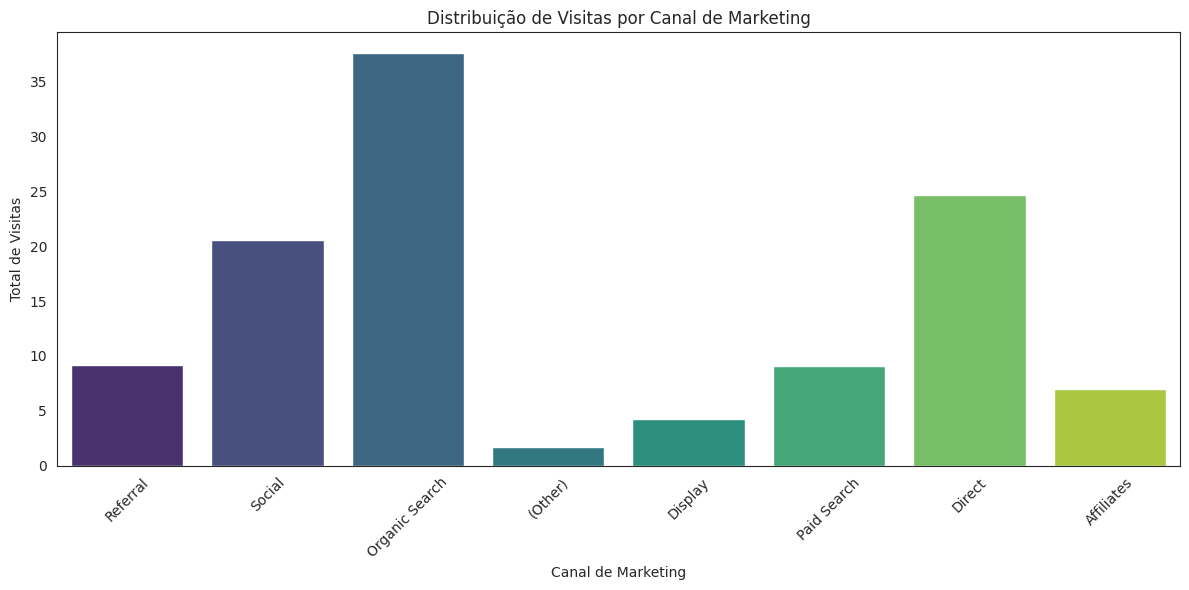

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_hearing, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Visitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-81-a83498eff9a3>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016, palette='viridis', ci=None)
<ipython-input-81-a83498eff9a3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016, palette='viridis', ci=None)


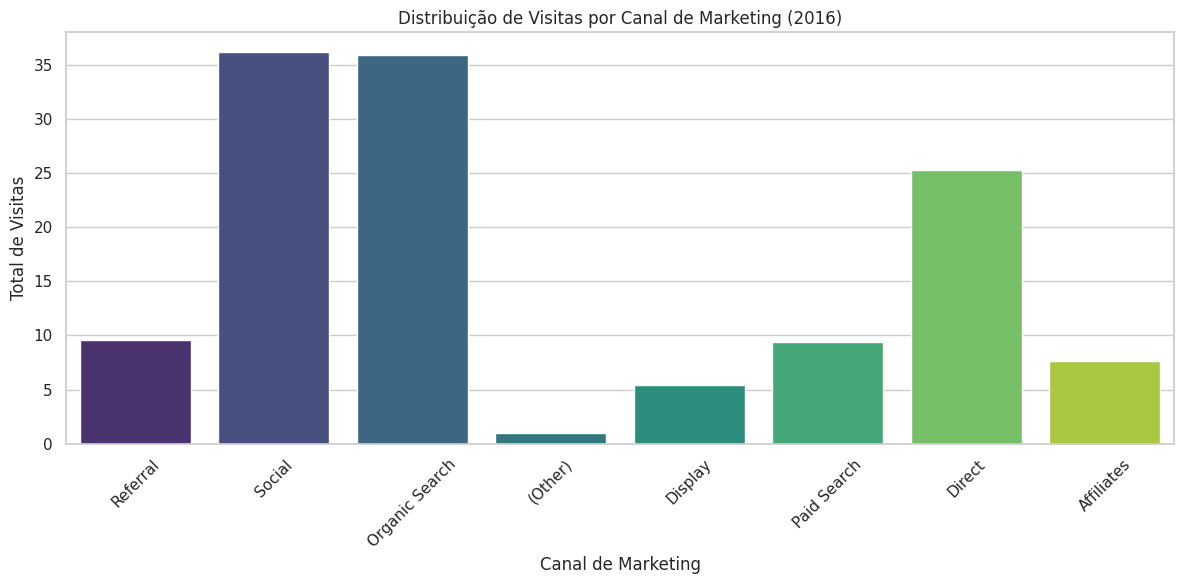

<ipython-input-81-a83498eff9a3>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017, palette='viridis', ci=None)
<ipython-input-81-a83498eff9a3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017, palette='viridis', ci=None)


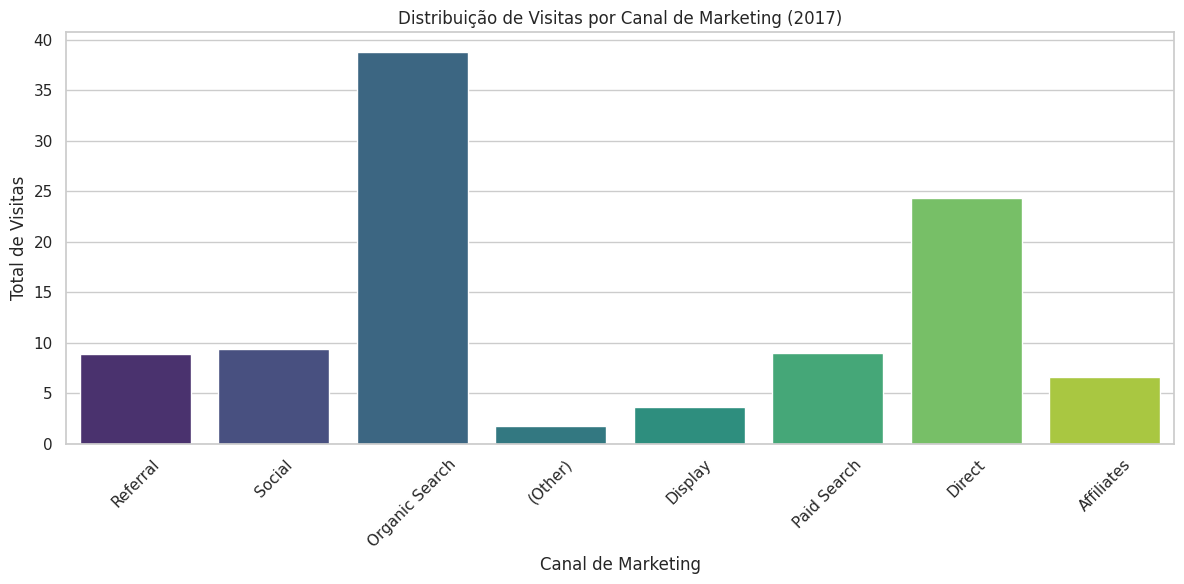

In [81]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Gráfico para 2016
plt.figure(figsize=(12, 6))
sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Canal de Marketing (2016)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Visitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico para 2017
plt.figure(figsize=(12, 6))
sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Canal de Marketing (2017)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Visitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-82-8c829b5ed293>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016, palette='viridis', ci=None)
<ipython-input-82-8c829b5ed293>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016, palette='viridis', ci=None)


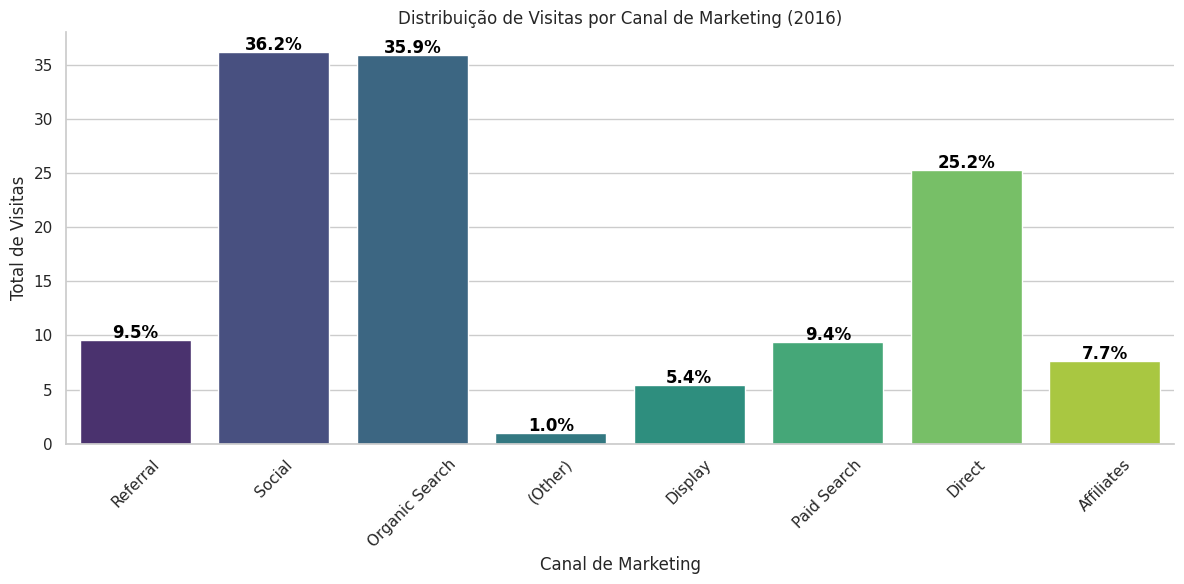

<ipython-input-82-8c829b5ed293>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017, palette='viridis', ci=None)
<ipython-input-82-8c829b5ed293>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017, palette='viridis', ci=None)


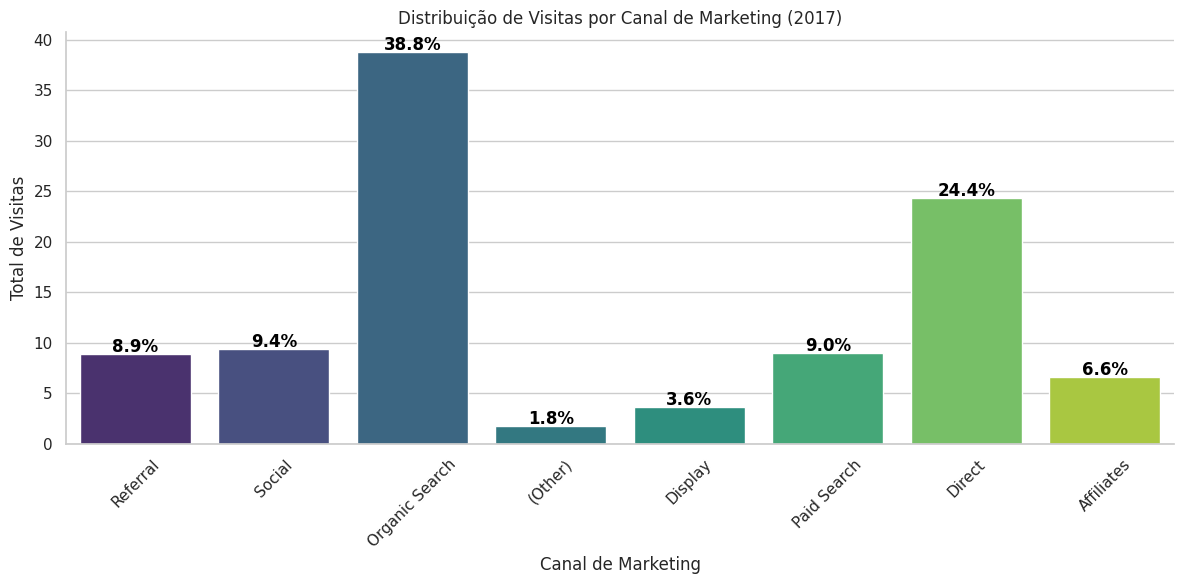

In [82]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Função para adicionar porcentagens nas barras
def add_percentages(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=12, weight='bold', color='black',  # Ajustes de fonte e negrito
                    xytext=(0, 5),
                    textcoords='offset points')

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Gráfico para 2016
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Canal de Marketing (2016)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Visitas')
plt.xticks(rotation=45)
add_percentages(ax1)
sns.despine()  # Remove as bordas direita e superior
plt.tight_layout()
plt.show()

# Gráfico para 2017
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Canal de Marketing (2017)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Visitas')
plt.xticks(rotation=45)
add_percentages(ax2)
sns.despine()  # Remove as bordas direita e superior
plt.tight_layout()
plt.show()

<ipython-input-83-b08fc43c81cc>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016_sorted, palette=colors, ci=None)
<ipython-input-83-b08fc43c81cc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016_sorted, palette=colors, ci=None)
<ipython-input-83-b08fc43c81cc>:27: UserWarning: The palette list has more values (18356) than needed (8), which may not be intended.
  ax1 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016_sorted, palette=colors, ci=None)


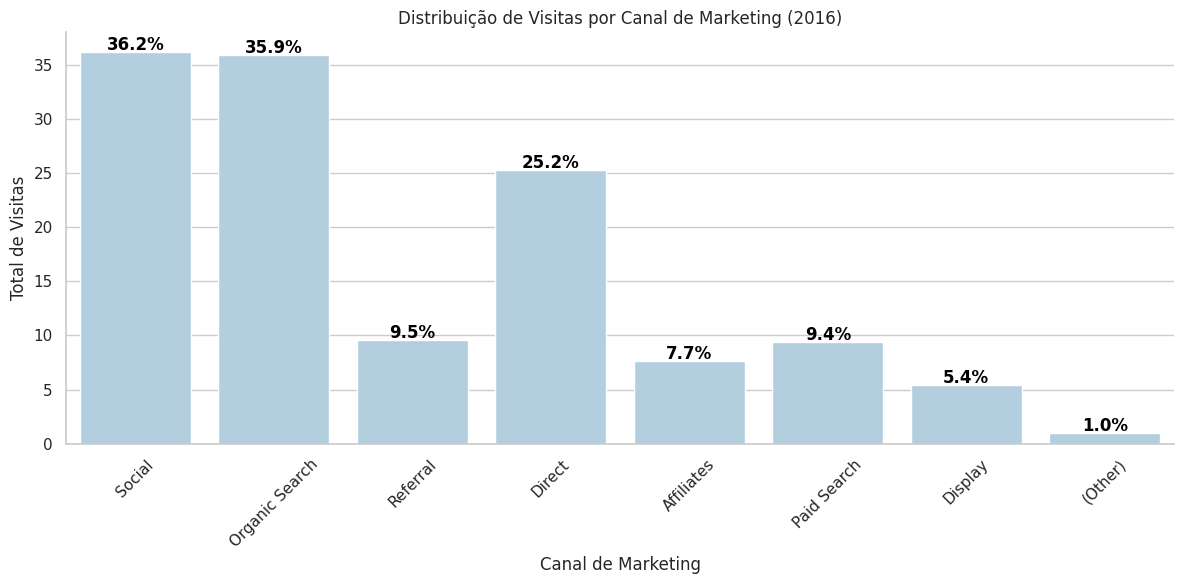

<ipython-input-83-b08fc43c81cc>:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017_sorted, palette=colors, ci=None)
<ipython-input-83-b08fc43c81cc>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017_sorted, palette=colors, ci=None)
<ipython-input-83-b08fc43c81cc>:45: UserWarning: The palette list has more values (26649) than needed (8), which may not be intended.
  ax2 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017_sorted, palette=colors, ci=None)


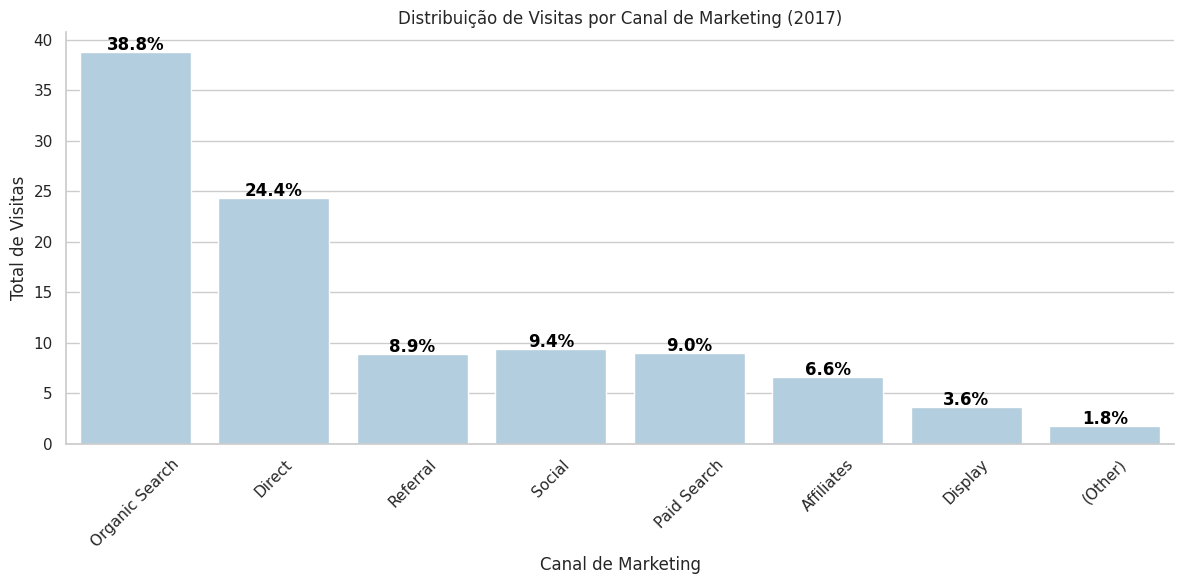

In [83]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Função para adicionar porcentagens nas barras
def add_percentages(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=12, weight='bold', color='black',  # Ajustes de fonte e negrito
                    xytext=(0, 5),
                    textcoords='offset points')

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Ordenar os dados por total de visitas em ordem decrescente para 2016
df_2016_sorted = df_2016.sort_values(by='total_visitas', ascending=False)

# Criar paleta de cores azuis
colors = sns.color_palette("Blues_d", len(df_2016_sorted))

# Gráfico para 2016
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2016_sorted, palette=colors, ci=None)
plt.title('Distribuição de Visitas por Canal de Marketing (2016)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Visitas')
plt.xticks(rotation=45)
add_percentages(ax1)
sns.despine()  # Remove as bordas direita e superior
plt.tight_layout()
plt.show()

# Ordenar os dados por total de visitas em ordem decrescente para 2017
df_2017_sorted = df_2017.sort_values(by='total_visitas', ascending=False)

# Criar paleta de cores azuis
colors = sns.color_palette("Blues_d", len(df_2017_sorted))

# Gráfico para 2017
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='canal_de_marketing', y='total_visitas', data=df_2017_sorted, palette=colors, ci=None)
plt.title('Distribuição de Visitas por Canal de Marketing (2017)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Visitas')
plt.xticks(rotation=45)
add_percentages(ax2)
sns.despine()  # Remove as bordas direita e superior
plt.tight_layout()
plt.show()

In [84]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular a distribuição total de visitas por canal de marketing para cada ano
total_visits_2016 = df_2016.groupby('canal_de_marketing')['total_visitas'].sum()
total_visits_2017 = df_2017.groupby('canal_de_marketing')['total_visitas'].sum()

# Calcular as porcentagens
percentages_2016 = (total_visits_2016 / total_visits_2016.sum()) * 100
percentages_2017 = (total_visits_2017 / total_visits_2017.sum()) * 100

# Imprimir as porcentagens formatadas
print("Porcentagens de distribuição de visitas por canal de marketing em 2016:")
for channel, percentage in percentages_2016.items():
    print(f"{channel}: {percentage:.1f}%")

print("\nPorcentagens de distribuição de visitas por canal de marketing em 2017:")
for channel, percentage in percentages_2017.items():
    print(f"{channel}: {percentage:.1f}%")

Porcentagens de distribuição de visitas por canal de marketing em 2016:
(Other): 0.0%
Affiliates: 1.5%
Direct: 13.0%
Display: 0.7%
Organic Search: 33.7%
Paid Search: 2.5%
Referral: 10.5%
Social: 38.0%

Porcentagens de distribuição de visitas por canal de marketing em 2017:
(Other): 0.0%
Affiliates: 2.1%
Direct: 18.5%
Display: 0.7%
Organic Search: 50.2%
Paid Search: 3.0%
Referral: 12.6%
Social: 12.9%


## Páginas Visualizadas por Canal de Marketing

<ipython-input-86-ac02ada1c471>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='canal_de_marketing', y='total_paginas_visualizadas', data=df_hearing, palette='viridis', ci=None)
<ipython-input-86-ac02ada1c471>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='canal_de_marketing', y='total_paginas_visualizadas', data=df_hearing, palette='viridis', ci=None)


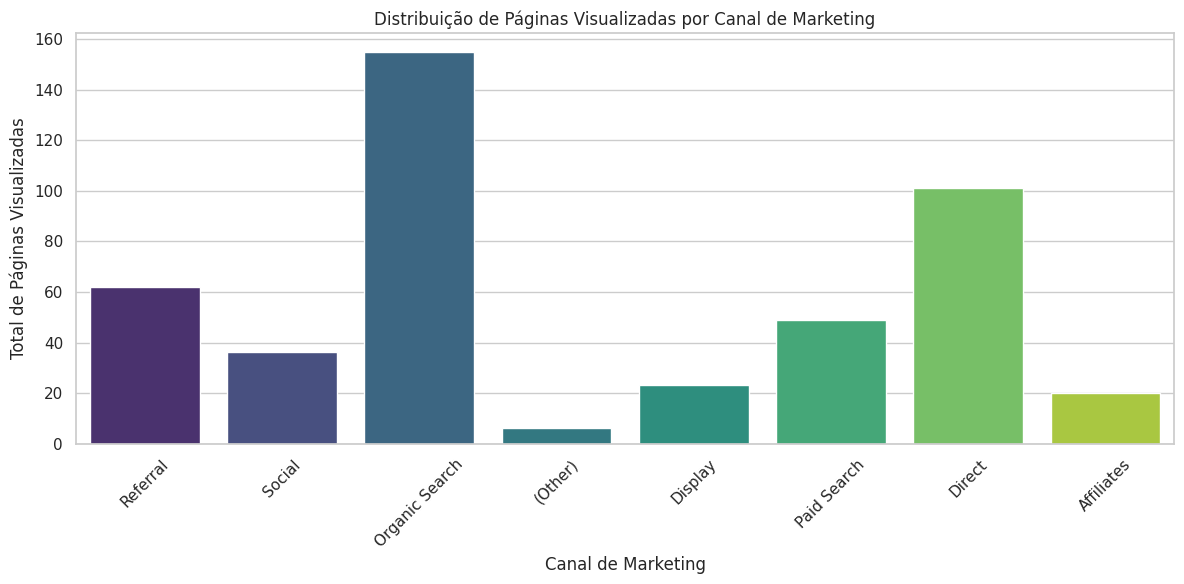

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(x='canal_de_marketing', y='total_paginas_visualizadas', data=df_hearing, palette='viridis', ci=None)
plt.title('Distribuição de Páginas Visualizadas por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Páginas Visualizadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
channel_grouping_pageviews = df_hearing.groupby('canal_de_marketing')['total_paginas_visualizadas'].sum()
total_pageviews = channel_grouping_pageviews.sum()
percentages_pageviews = (channel_grouping_pageviews / total_pageviews) * 100

# Exibindo as porcentagens por canal de marketing
for channel, percentage in percentages_pageviews.items():
    print(f'{channel}: {percentage:.1f}%')

(Other): 0.0%
Affiliates: 1.4%
Direct: 16.8%
Display: 1.0%
Organic Search: 45.1%
Paid Search: 3.9%
Referral: 20.3%
Social: 11.5%


<ipython-input-89-743875125cbf>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='canal_de_marketing', y='total_paginas_visualizadas', data=df_2016, palette='viridis', ci=None)
<ipython-input-89-743875125cbf>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='canal_de_marketing', y='total_paginas_visualizadas', data=df_2016, palette='viridis', ci=None)
<ipython-input-89-743875125cbf>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.get_x() + p.get_width()/2., height/2, f'{percentages[i]:.1f}%',
<ipython-input-89-743875125cbf>:21: FutureWarning: Series.__getitem__ tr

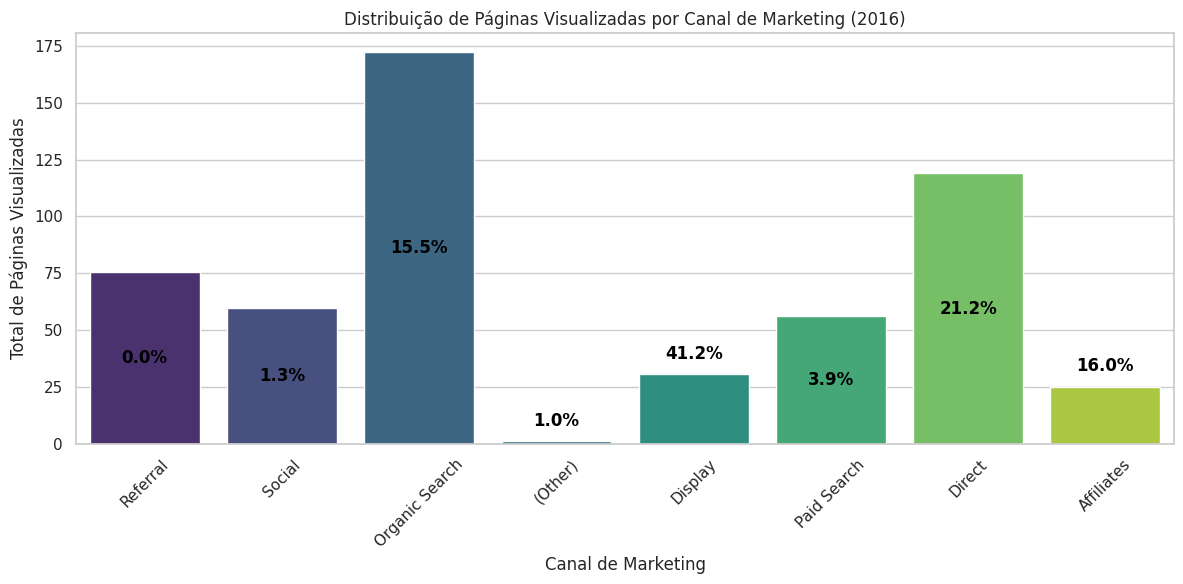

<ipython-input-89-743875125cbf>:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x='canal_de_marketing', y='total_paginas_visualizadas', data=df_2017, palette='viridis', ci=None)
<ipython-input-89-743875125cbf>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='canal_de_marketing', y='total_paginas_visualizadas', data=df_2017, palette='viridis', ci=None)
<ipython-input-89-743875125cbf>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.get_x() + p.get_width()/2., height/2, f'{percentages[i]:.1f}%',
<ipython-input-89-743875125cbf>:21: FutureWarning: Series.__getitem__ tr

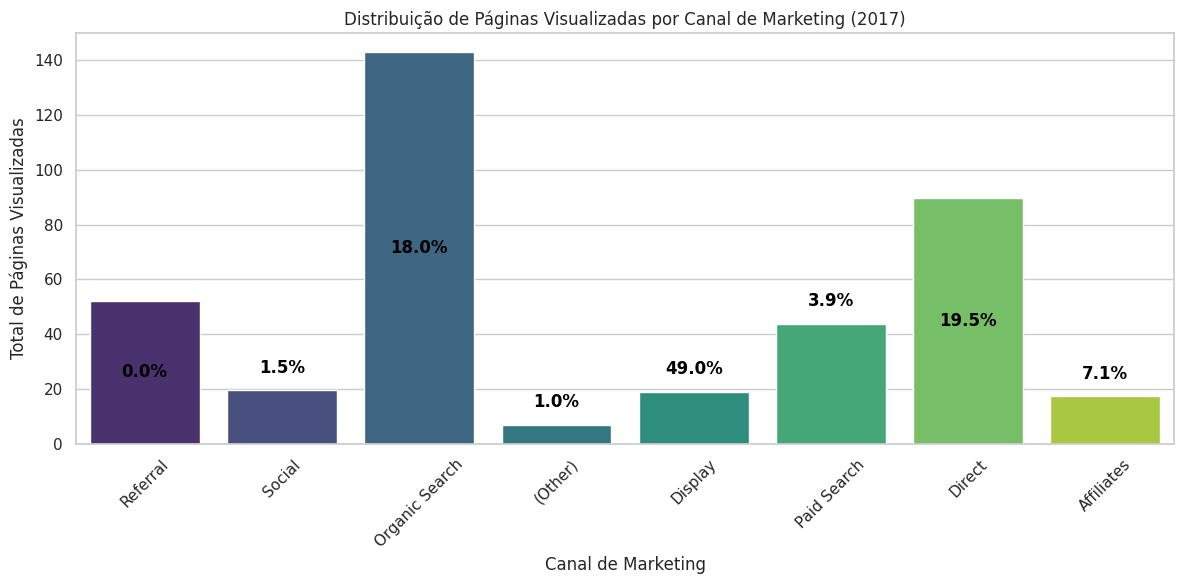

In [89]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular a distribuição total de páginas visualizadas por canal de marketing para cada ano
total_pageviews_2016 = df_2016.groupby('canal_de_marketing')['total_paginas_visualizadas'].sum()
total_pageviews_2017 = df_2017.groupby('canal_de_marketing')['total_paginas_visualizadas'].sum()

# Calcular as porcentagens
percentages_2016 = (total_pageviews_2016 / total_pageviews_2016.sum()) * 100
percentages_2017 = (total_pageviews_2017 / total_pageviews_2017.sum()) * 100

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Função para adicionar porcentagens como texto sobre as barras
def add_percentages_text(ax, percentages):
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        if height < 50:  # Verifica se a altura da barra é menor que 50 (ajuste conforme necessário)
            ax.text(p.get_x() + p.get_width()/2., height + 5, f'{percentages[i]:.1f}%',
                    ha="center", va='bottom', color='black', fontsize=12, weight='bold')
        else:
            ax.text(p.get_x() + p.get_width()/2., height/2, f'{percentages[i]:.1f}%',
                    ha="center", va='center', color='black', fontsize=12, weight='bold')

# Criar o gráfico para 2016
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='canal_de_marketing', y='total_paginas_visualizadas', data=df_2016, palette='viridis', ci=None)
plt.title('Distribuição de Páginas Visualizadas por Canal de Marketing (2016)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Páginas Visualizadas')
plt.xticks(rotation=45)

# Adicionar porcentagens como texto sobre as barras para 2016
add_percentages_text(ax1, percentages_2016)

plt.tight_layout()
plt.show()

# Criar o gráfico para 2017
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='canal_de_marketing', y='total_paginas_visualizadas', data=df_2017, palette='viridis', ci=None)
plt.title('Distribuição de Páginas Visualizadas por Canal de Marketing (2017)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Páginas Visualizadas')
plt.xticks(rotation=45)

# Adicionar porcentagens como texto sobre as barras para 2017
add_percentages_text(ax2, percentages_2017)

plt.tight_layout()
plt.show()

<ipython-input-92-357a14bdd4b2>:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x=df_2016_percentages.index, y=df_2016_percentages['total_paginas_visualizadas_2016'], palette='Purples_r', ci=None)
<ipython-input-92-357a14bdd4b2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=df_2016_percentages.index, y=df_2016_percentages['total_paginas_visualizadas_2016'], palette='Purples_r', ci=None)
<ipython-input-92-357a14bdd4b2>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.get_x() + p.get_width()/2., height/2, f'{percentages[i]:.1f}%',
<ipython-input-92-357a14bdd4b2>:30

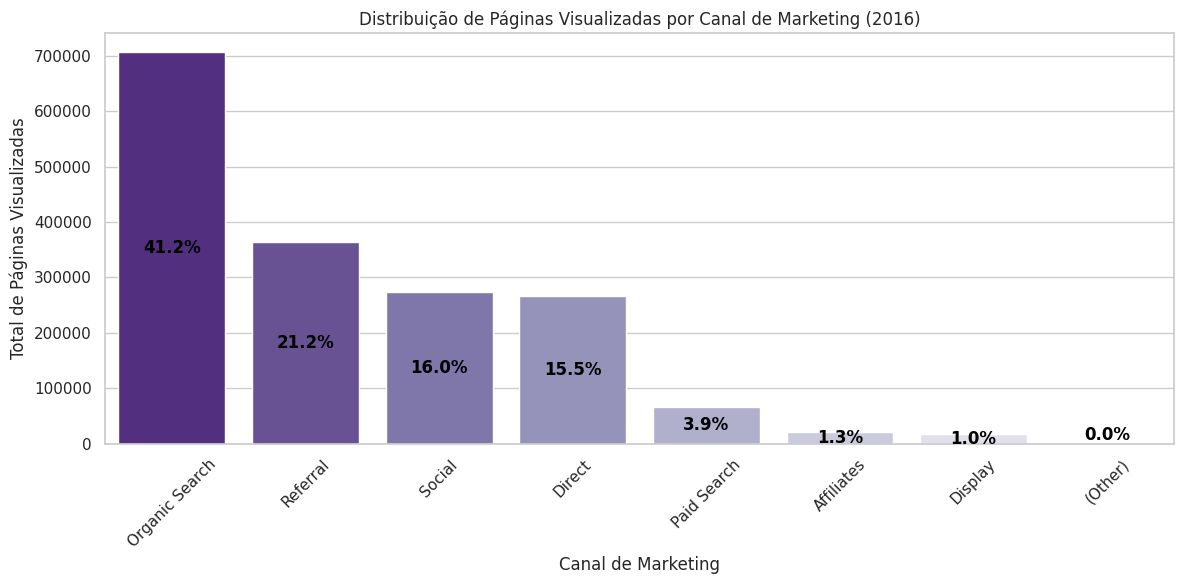

<ipython-input-92-357a14bdd4b2>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x=df_2017_percentages.index, y=df_2017_percentages['total_paginas_visualizadas_2017'], palette='Purples_r', ci=None)
<ipython-input-92-357a14bdd4b2>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=df_2017_percentages.index, y=df_2017_percentages['total_paginas_visualizadas_2017'], palette='Purples_r', ci=None)
<ipython-input-92-357a14bdd4b2>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.get_x() + p.get_width()/2., height/2, f'{percentages[i]:.1f}%',


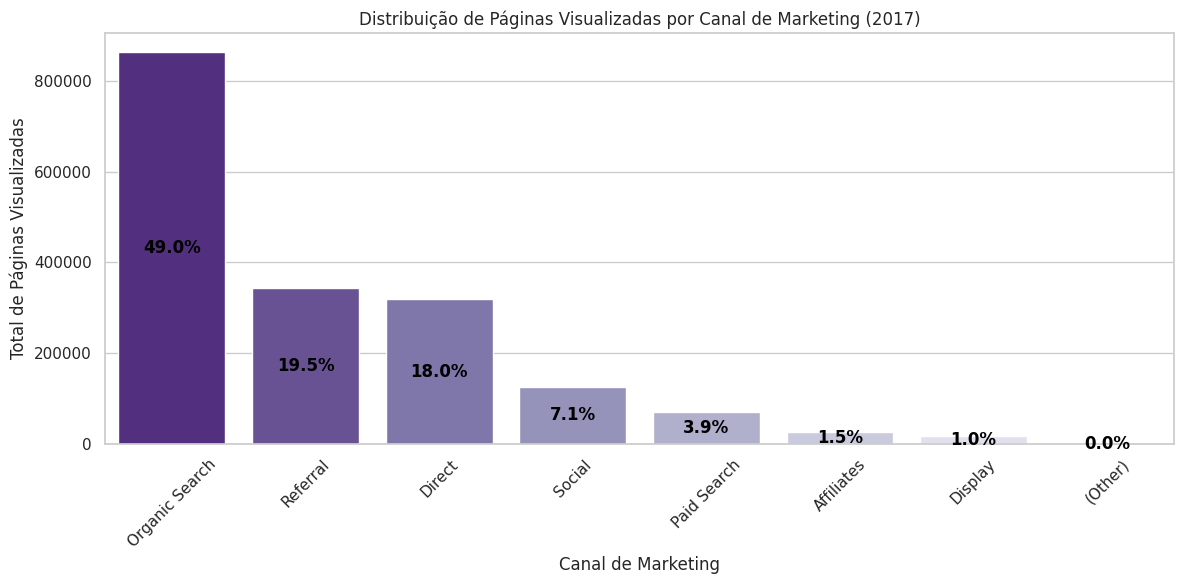

In [92]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular a distribuição total de páginas visualizadas por canal de marketing para cada ano
total_pageviews_2016 = df_2016.groupby('canal_de_marketing')['total_paginas_visualizadas'].sum().sort_values(ascending=False)
total_pageviews_2017 = df_2017.groupby('canal_de_marketing')['total_paginas_visualizadas'].sum().sort_values(ascending=False)

# Calcular as porcentagens
percentages_2016 = (total_pageviews_2016 / total_pageviews_2016.sum()) * 100
percentages_2017 = (total_pageviews_2017 / total_pageviews_2017.sum()) * 100

# Adicionar as porcentagens como novas colunas nos respectivos DataFrames
df_2016_percentages = total_pageviews_2016.copy()
df_2016_percentages = df_2016_percentages.to_frame('total_paginas_visualizadas_2016')
df_2016_percentages['percentage_2016'] = percentages_2016.values

df_2017_percentages = total_pageviews_2017.copy()
df_2017_percentages = df_2017_percentages.to_frame('total_paginas_visualizadas_2017')
df_2017_percentages['percentage_2017'] = percentages_2017.values

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Função para adicionar porcentagens como texto sobre as barras
def add_percentages_text(ax, percentages):
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        if height < 50:  # Verifica se a altura da barra é menor que 50 (ajuste conforme necessário)
            ax.text(p.get_x() + p.get_width()/2., height + 5, f'{percentages[i]:.1f}%',
                    ha="center", va='bottom', color='black', fontsize=12, weight='bold')
        else:
            ax.text(p.get_x() + p.get_width()/2., height/2, f'{percentages[i]:.1f}%',
                    ha="center", va='center', color='black', fontsize=12, weight='bold')

# Criar o gráfico para 2016
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=df_2016_percentages.index, y=df_2016_percentages['total_paginas_visualizadas_2016'], palette='Purples_r', ci=None)
plt.title('Distribuição de Páginas Visualizadas por Canal de Marketing (2016)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Páginas Visualizadas')
plt.xticks(rotation=45)

# Adicionar porcentagens como texto sobre as barras para 2016
add_percentages_text(ax1, df_2016_percentages['percentage_2016'])

plt.tight_layout()
plt.show()

# Criar o gráfico para 2017
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x=df_2017_percentages.index, y=df_2017_percentages['total_paginas_visualizadas_2017'], palette='Purples_r', ci=None)
plt.title('Distribuição de Páginas Visualizadas por Canal de Marketing (2017)')
plt.xlabel('Canal de Marketing')
plt.ylabel('Total de Páginas Visualizadas')
plt.xticks(rotation=45)

# Adicionar porcentagens como texto sobre as barras para 2017
add_percentages_text(ax2, df_2017_percentages['percentage_2017'])

plt.tight_layout()
plt.show()

In [93]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular a distribuição total de páginas visualizadas por canal de marketing para cada ano
total_pageviews_2016 = df_2016['total_paginas_visualizadas'].sum()
total_pageviews_2017 = df_2017['total_paginas_visualizadas'].sum()

# Calcular as porcentagens
percentages_2016 = (df_2016.groupby('canal_de_marketing')['total_paginas_visualizadas'].sum() / total_pageviews_2016) * 100
percentages_2017 = (df_2017.groupby('canal_de_marketing')['total_paginas_visualizadas'].sum() / total_pageviews_2017) * 100

# Imprimir porcentagens formatadas para 2016
print("Porcentagens de distribuição de páginas visualizadas por canal de marketing em 2016:")
for channel, percentage in percentages_2016.items():
    print(f"{channel}: {percentage:.1f}%")

# Imprimir porcentagens formatadas para 2017
print("\nPorcentagens de distribuição de páginas visualizadas por canal de marketing em 2017:")
for channel, percentage in percentages_2017.items():
    print(f"{channel}: {percentage:.1f}%")

Porcentagens de distribuição de páginas visualizadas por canal de marketing em 2016:
(Other): 0.0%
Affiliates: 1.3%
Direct: 15.5%
Display: 1.0%
Organic Search: 41.2%
Paid Search: 3.9%
Referral: 21.2%
Social: 16.0%

Porcentagens de distribuição de páginas visualizadas por canal de marketing em 2017:
(Other): 0.0%
Affiliates: 1.5%
Direct: 18.0%
Display: 1.0%
Organic Search: 49.0%
Paid Search: 3.9%
Referral: 19.5%
Social: 7.1%


## Tempo Total no Site por Canal de Marketing

<ipython-input-94-0268e0723ca4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='canal_de_marketing', y='tempo_total_no_site', data=df_hearing, palette='viridis', ci=None)
<ipython-input-94-0268e0723ca4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='canal_de_marketing', y='tempo_total_no_site', data=df_hearing, palette='viridis', ci=None)


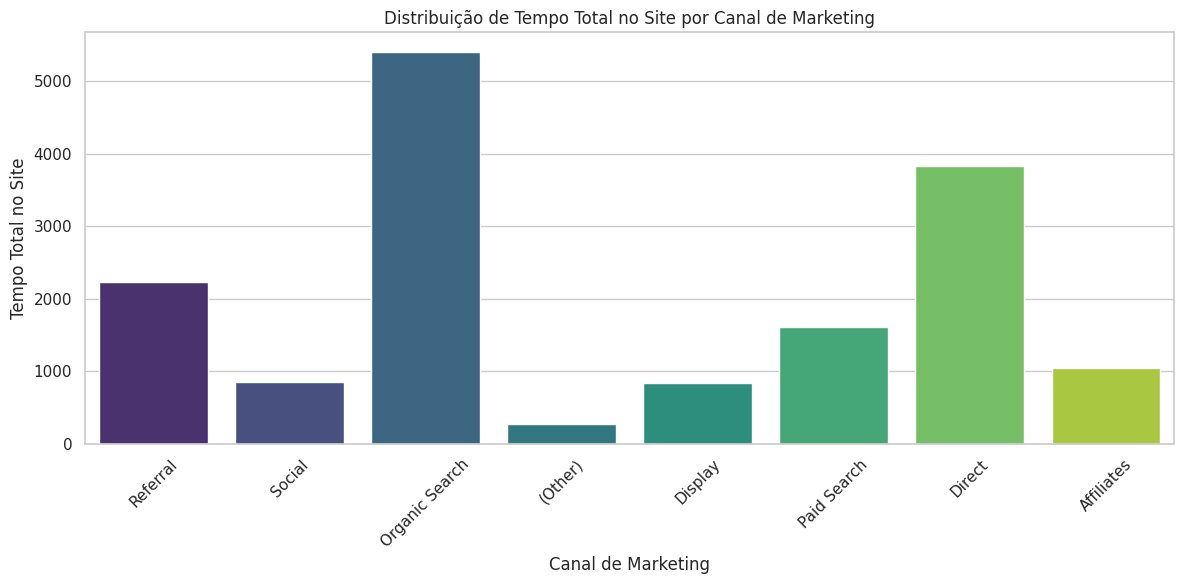

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x='canal_de_marketing', y='tempo_total_no_site', data=df_hearing, palette='viridis', ci=None)
plt.title('Distribuição de Tempo Total no Site por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Tempo Total no Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
# Agrupar os dados por canal de marketing e calcular a soma do tempo total no site
canal_de_marketing_timeonsite = df_hearing.groupby('canal_de_marketing')['tempo_total_no_site'].sum()

# Calcular o total de tempo no site
total_timeonsite = canal_de_marketing_timeonsite.sum()

# Calcular as porcentagens
percentages_timeonsite = (canal_de_marketing_timeonsite / total_timeonsite) * 100

# Exibir as porcentagens por canal de marketing
for channel, percentage in percentages_timeonsite.items():
    print(f'{channel}: {percentage:.1f}%')

(Other): 0.0%
Affiliates: 2.0%
Direct: 18.4%
Display: 1.0%
Organic Search: 45.7%
Paid Search: 3.7%
Referral: 21.3%
Social: 7.8%


<ipython-input-96-179ab3c11e05>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2016_sorted, palette='viridis', ci=None, orient='h')
<ipython-input-96-179ab3c11e05>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2016_sorted, palette='viridis', ci=None, orient='h')
<ipython-input-96-179ab3c11e05>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(width + 0.01, p.get_y() + p.get_height()/2., f'{percentages[i]:.1f}%',


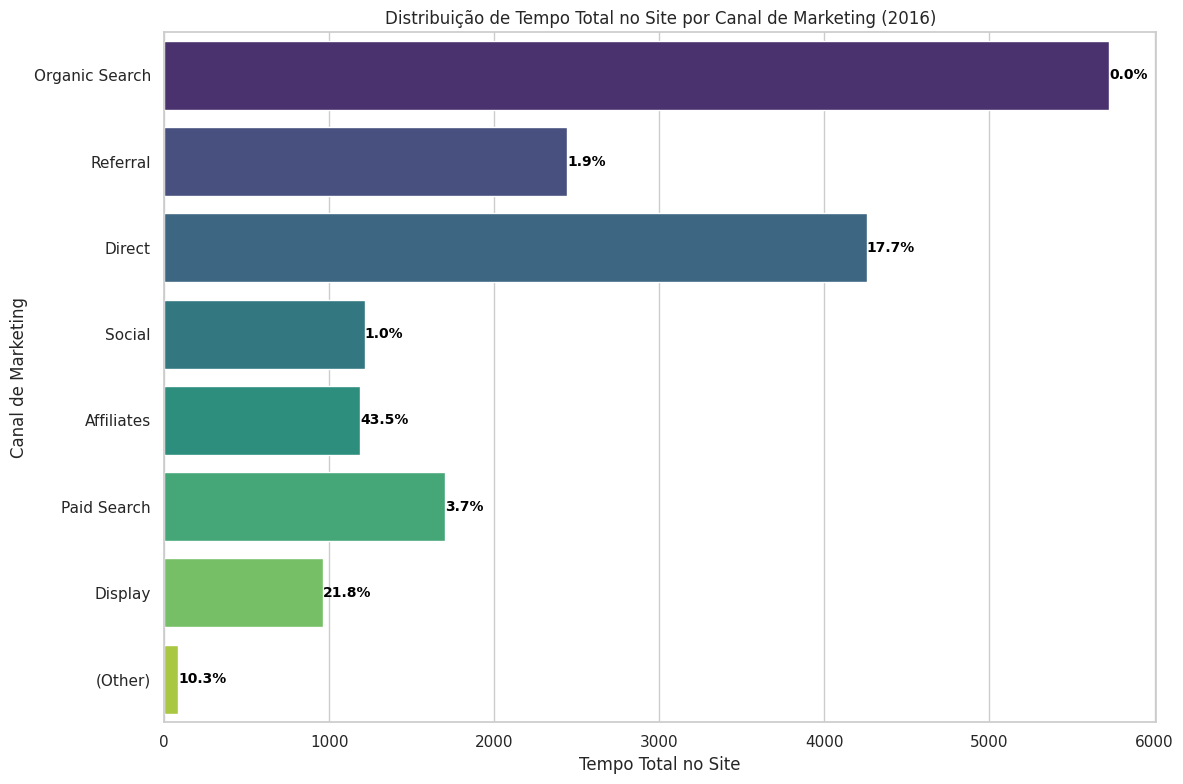

<ipython-input-96-179ab3c11e05>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2017_sorted, palette='viridis', ci=None, orient='h')
<ipython-input-96-179ab3c11e05>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2017_sorted, palette='viridis', ci=None, orient='h')
<ipython-input-96-179ab3c11e05>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(width + 0.01, p.get_y() + p.get_height()/2., f'{percentages[i]:.1f}%',


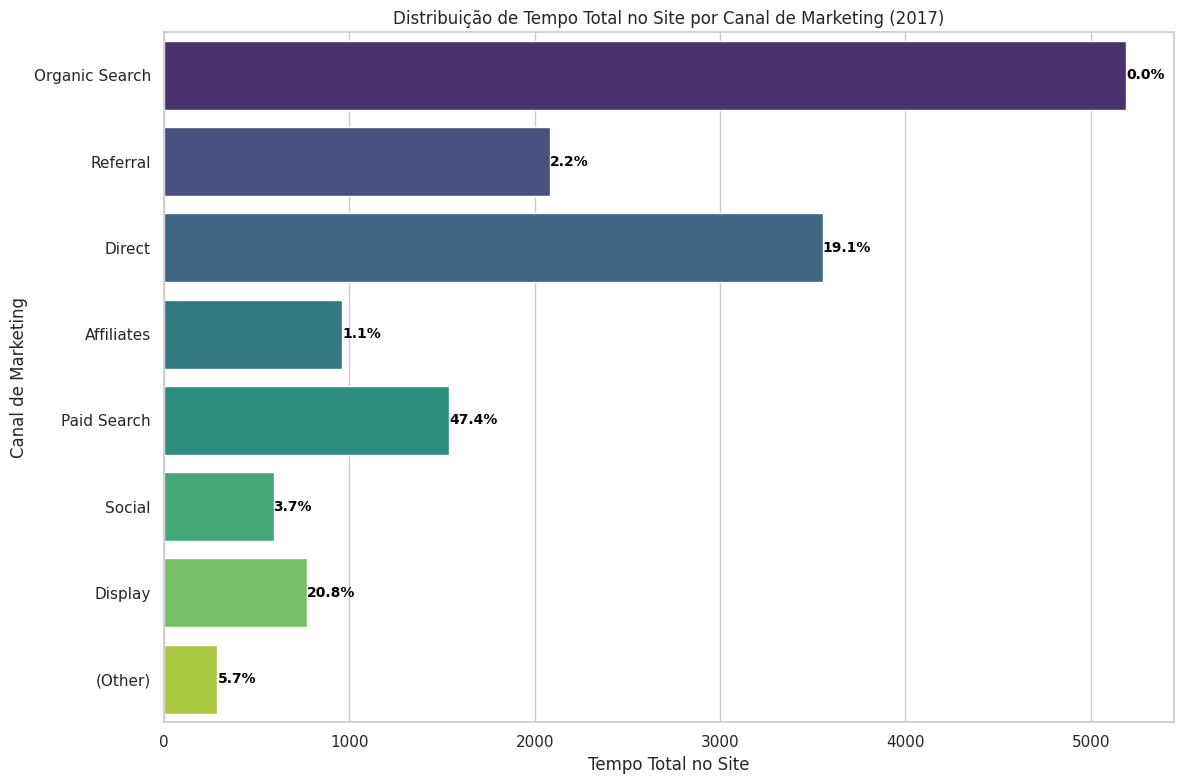

In [96]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular a distribuição total de tempo total no site por canal de marketing para cada ano
total_time_2016 = df_2016['tempo_total_no_site'].sum()
total_time_2017 = df_2017['tempo_total_no_site'].sum()

# Calcular as porcentagens
percentages_2016 = (df_2016.groupby('canal_de_marketing')['tempo_total_no_site'].sum() / total_time_2016) * 100
percentages_2017 = (df_2017.groupby('canal_de_marketing')['tempo_total_no_site'].sum() / total_time_2017) * 100

# Ordenar os dados por tempo total no site em ordem decrescente
df_2016_sorted = df_2016.sort_values(by='tempo_total_no_site', ascending=False)
df_2017_sorted = df_2017.sort_values(by='tempo_total_no_site', ascending=False)

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Função para adicionar porcentagens como texto ao lado das barras
def add_percentages_text(ax, percentages):
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        ax.text(width + 0.01, p.get_y() + p.get_height()/2., f'{percentages[i]:.1f}%',
                va='center', fontsize=10, fontweight='bold', color='black')

# Criar figura e eixos para o gráfico de 2016
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2016_sorted, palette='viridis', ci=None, orient='h')
plt.title('Distribuição de Tempo Total no Site por Canal de Marketing (2016)')
plt.xlabel('Tempo Total no Site')
plt.ylabel('Canal de Marketing')

# Adicionar porcentagens como texto ao lado das barras para 2016
add_percentages_text(ax1, percentages_2016)

plt.tight_layout()
plt.show()

# Criar figura e eixos para o gráfico de 2017
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2017_sorted, palette='viridis', ci=None, orient='h')
plt.title('Distribuição de Tempo Total no Site por Canal de Marketing (2017)')
plt.xlabel('Tempo Total no Site')
plt.ylabel('Canal de Marketing')

# Adicionar porcentagens como texto ao lado das barras para 2017
add_percentages_text(ax2, percentages_2017)

plt.tight_layout()
plt.show()

<ipython-input-97-b6affc97a26b>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2016, palette='viridis', ci=None, orient='h')  # Mudado 'total_timeonsite' para 'tempo_total_no_site' e 'channel_grouping' para 'canal_de_marketing'
<ipython-input-97-b6affc97a26b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2016, palette='viridis', ci=None, orient='h')  # Mudado 'total_timeonsite' para 'tempo_total_no_site' e 'channel_grouping' para 'canal_de_marketing'
<ipython-input-97-b6affc97a26b>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

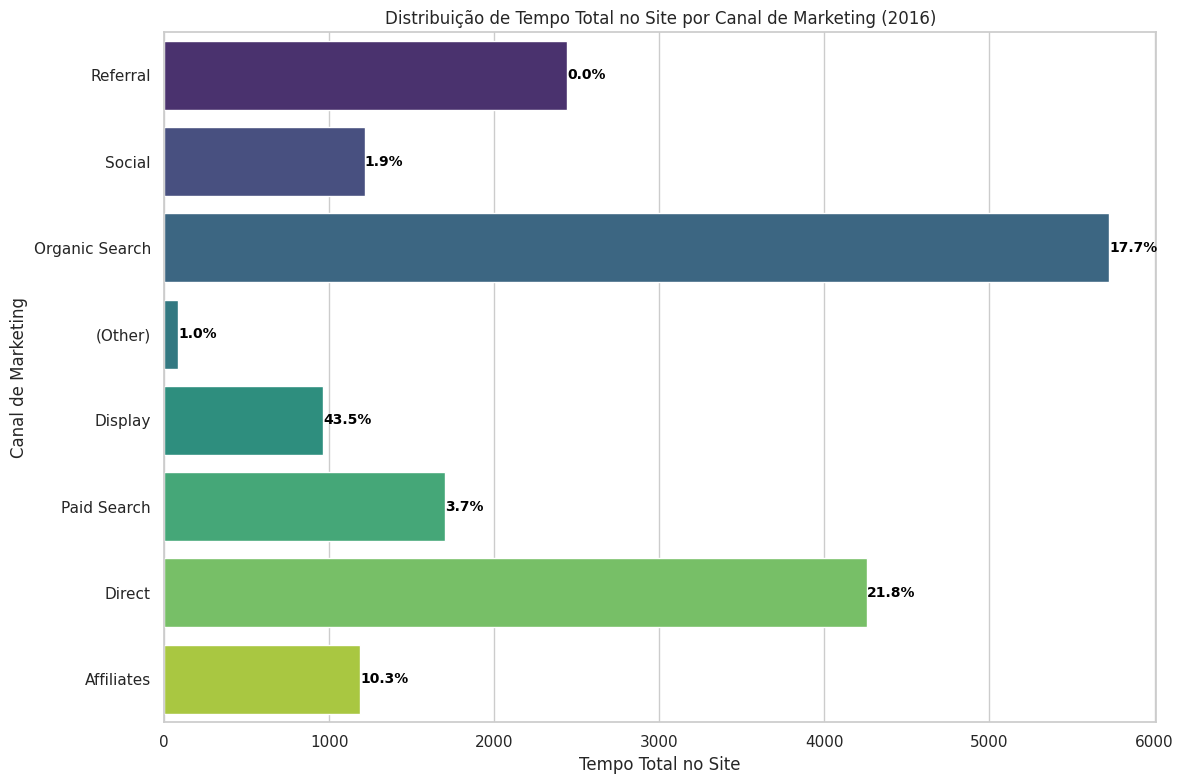

<ipython-input-97-b6affc97a26b>:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2017, palette='viridis', ci=None, orient='h')  # Mudado 'total_timeonsite' para 'tempo_total_no_site' e 'channel_grouping' para 'canal_de_marketing'
<ipython-input-97-b6affc97a26b>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2017, palette='viridis', ci=None, orient='h')  # Mudado 'total_timeonsite' para 'tempo_total_no_site' e 'channel_grouping' para 'canal_de_marketing'
<ipython-input-97-b6affc97a26b>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

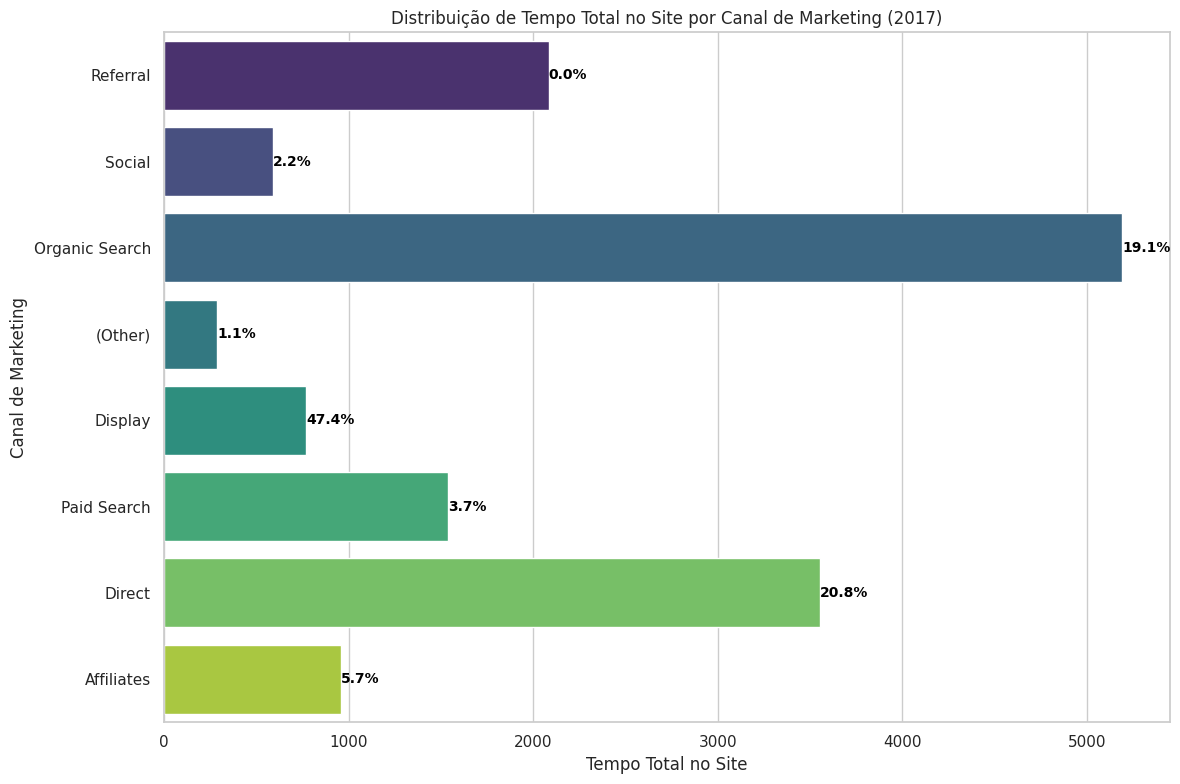

In [97]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular a distribuição total de tempo total no site por canal de marketing para cada ano
total_time_2016 = df_2016['tempo_total_no_site'].sum()
total_time_2017 = df_2017['tempo_total_no_site'].sum()

# Calcular as porcentagens
percentages_2016 = (df_2016.groupby('canal_de_marketing')['tempo_total_no_site'].sum() / total_time_2016) * 100
percentages_2017 = (df_2017.groupby('canal_de_marketing')['tempo_total_no_site'].sum() / total_time_2017) * 100

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Função para adicionar porcentagens como texto ao lado das barras
def add_percentages_text(ax, percentages):
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_width() + 0.01, p.get_y() + height/2., f'{percentages[i]:.1f}%',
                va='center', fontsize=10, fontweight='bold', color='black')

# Criar figura e eixos para o gráfico de 2016
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2016, palette='viridis', ci=None, orient='h')  # Mudado 'total_timeonsite' para 'tempo_total_no_site' e 'channel_grouping' para 'canal_de_marketing'
plt.title('Distribuição de Tempo Total no Site por Canal de Marketing (2016)')
plt.xlabel('Tempo Total no Site')
plt.ylabel('Canal de Marketing')

# Adicionar porcentagens como texto ao lado das barras para 2016
add_percentages_text(ax1, percentages_2016)

plt.tight_layout()
plt.show()

# Criar figura e eixos para o gráfico de 2017
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='tempo_total_no_site', y='canal_de_marketing', data=df_2017, palette='viridis', ci=None, orient='h')  # Mudado 'total_timeonsite' para 'tempo_total_no_site' e 'channel_grouping' para 'canal_de_marketing'
plt.title('Distribuição de Tempo Total no Site por Canal de Marketing (2017)')
plt.xlabel('Tempo Total no Site')
plt.ylabel('Canal de Marketing')

# Adicionar porcentagens como texto ao lado das barras para 2017
add_percentages_text(ax2, percentages_2017)

plt.tight_layout()
plt.show()

In [98]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular a distribuição total de tempo total no site por canal de marketing para cada ano
total_time_2016 = df_2016['tempo_total_no_site'].sum()
total_time_2017 = df_2017['tempo_total_no_site'].sum()

# Calcular as porcentagens
percentages_2016 = (df_2016.groupby('canal_de_marketing')['tempo_total_no_site'].sum() / total_time_2016) * 100
percentages_2017 = (df_2017.groupby('canal_de_marketing')['tempo_total_no_site'].sum() / total_time_2017) * 100

# Imprimir porcentagens formatadas para 2016
print("Porcentagens de distribuição de tempo total no site por canal de marketing em 2016:")
for channel, percentage in percentages_2016.items():
    print(f"{channel}: {percentage:.1f}%")

# Imprimir porcentagens formatadas para 2017
print("\nPorcentagens de distribuição de tempo total no site por canal de marketing em 2017:")
for channel, percentage in percentages_2017.items():
    print(f"{channel}: {percentage:.1f}%")


Porcentagens de distribuição de tempo total no site por canal de marketing em 2016:
(Other): 0.0%
Affiliates: 1.9%
Direct: 17.7%
Display: 1.0%
Organic Search: 43.5%
Paid Search: 3.7%
Referral: 21.8%
Social: 10.3%

Porcentagens de distribuição de tempo total no site por canal de marketing em 2017:
(Other): 0.0%
Affiliates: 2.2%
Direct: 19.1%
Display: 1.1%
Organic Search: 47.4%
Paid Search: 3.7%
Referral: 20.8%
Social: 5.7%


In [100]:
df_hearing.columns

Index(['data', 'canal_de_marketing', 'origem', 'categoria_de_dispositivo',
       'navegador', 'total_visitas', 'total_paginas_visualizadas',
       'tempo_total_no_site', 'total_usuarios', 'ano', 'conversion', 'month'],
      dtype='object')

## Visitas por Categoria de Dispositivo

<ipython-input-101-4ee0384597ab>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_hearing, palette='viridis', ci=None)
<ipython-input-101-4ee0384597ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_hearing, palette='viridis', ci=None)


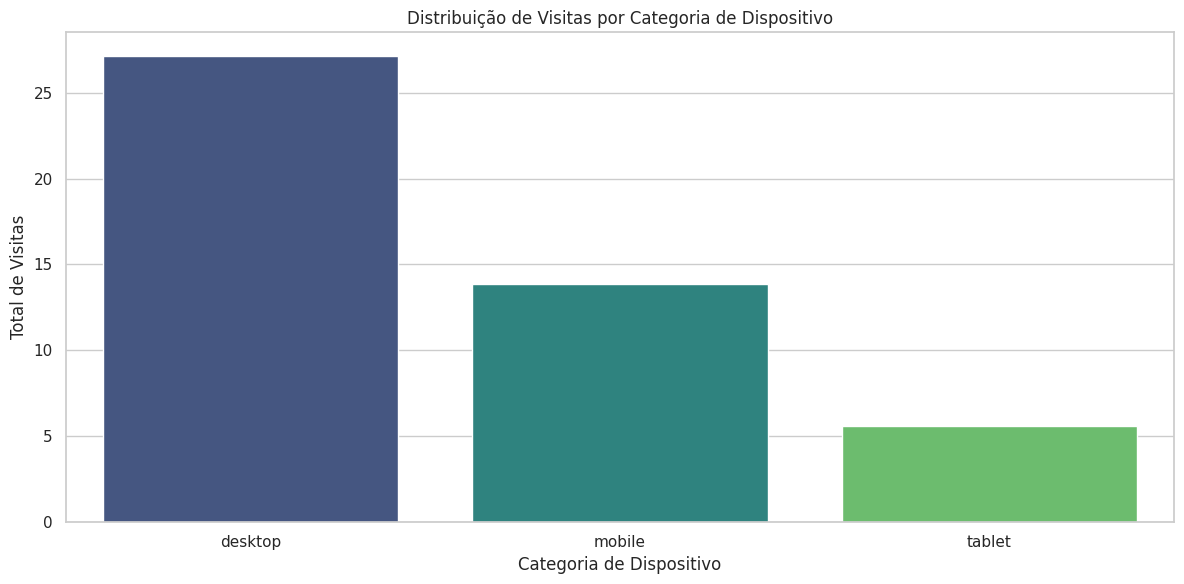

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_hearing, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Categoria de Dispositivo')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Total de Visitas')
plt.tight_layout()
plt.show()

In [102]:
device_category_visits = df_hearing.groupby('categoria_de_dispositivo')['total_visitas'].sum()
total_visits = device_category_visits.sum()
percentages_visits = (device_category_visits / total_visits) * 100

# Exibindo as porcentagens por categoria de dispositivo
for device, percentage in percentages_visits.items():
    print(f'{device}: {percentage:.1f}%')


desktop: 73.5%
mobile: 23.1%
tablet: 3.4%


<ipython-input-103-dae976ef570d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2016, palette='viridis', ci=None)
<ipython-input-103-dae976ef570d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2016, palette='viridis', ci=None)
<ipython-input-103-dae976ef570d>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2017, palette='viridis', ci=None)
<ipython-input-103-dae976ef570d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the

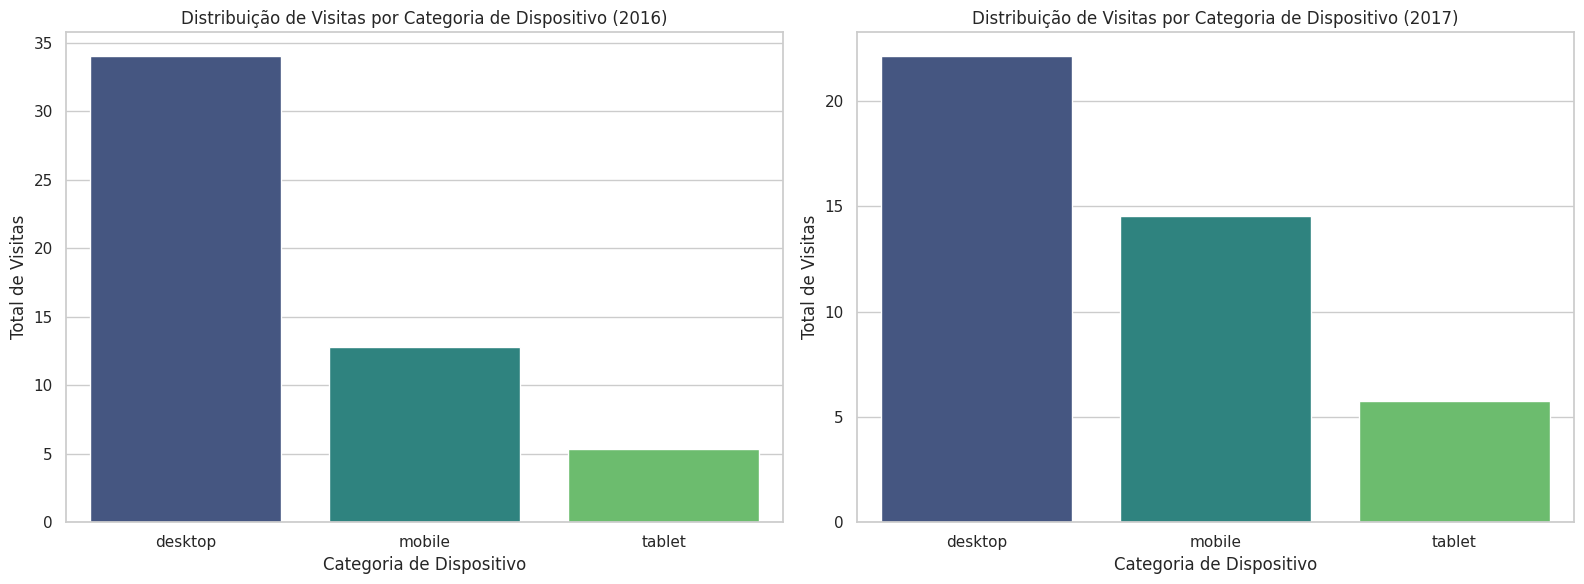

In [103]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Criar figura e eixos para os gráficos
plt.figure(figsize=(16, 6))

# Gráfico para 2016
plt.subplot(1, 2, 1)
sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2016, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Categoria de Dispositivo (2016)')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Total de Visitas')

# Gráfico para 2017
plt.subplot(1, 2, 2)
sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2017, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Categoria de Dispositivo (2017)')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Total de Visitas')

plt.tight_layout()
plt.show()

In [105]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular o total de visitas para cada ano
total_visitas_2016 = df_2016['total_visitas'].sum()
total_visitas_2017 = df_2017['total_visitas'].sum()

# Calcular as porcentagens de distribuição
percentages_2016 = (df_2016.groupby('categoria_de_dispositivo')['total_visitas'].sum() / total_visitas_2016) * 100
percentages_2017 = (df_2017.groupby('categoria_de_dispositivo')['total_visitas'].sum() / total_visitas_2017) * 100

# Imprimir porcentagens formatadas para 2016
print("Porcentagens de distribuição de visitas por categoria de dispositivo em 2016:")
for device, percentage in percentages_2016.items():
    print(f"{device}: {percentage:.1f}%")

# Imprimir porcentagens formatadas para 2017
print("\nPorcentagens de distribuição de visitas por categoria de dispositivo em 2017:")
for device, percentage in percentages_2017.items():
    print(f"{device}: {percentage:.1f}%")

Porcentagens de distribuição de visitas por categoria de dispositivo em 2016:
desktop: 80.2%
mobile: 17.1%
tablet: 2.7%

Porcentagens de distribuição de visitas por categoria de dispositivo em 2017:
desktop: 67.4%
mobile: 28.7%
tablet: 4.0%


<ipython-input-110-71dc10827ed6>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2016, palette='viridis', ci=None)
<ipython-input-110-71dc10827ed6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2016, palette='viridis', ci=None)
<ipython-input-110-71dc10827ed6>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2017, palette='viridis', ci=None)
<ipython-input-110-71dc10827ed6>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

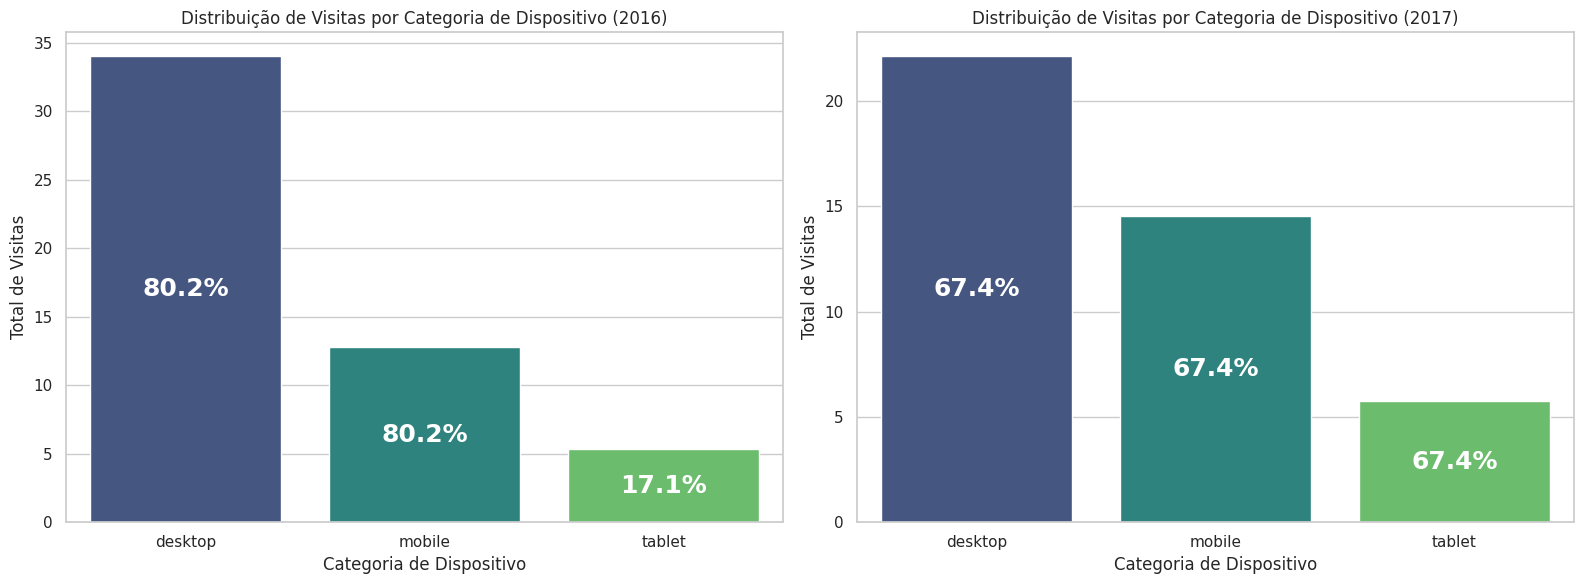

In [110]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular a distribuição total de visitas por categoria de dispositivo para cada ano
total_visits_2016 = df_2016['total_visitas'].sum()
total_visits_2017 = df_2017['total_visitas'].sum()

# Calcular as porcentagens
percentages_2016 = (df_2016.groupby('categoria_de_dispositivo')['total_visitas'].sum() / total_visits_2016) * 100
percentages_2017 = (df_2017.groupby('categoria_de_dispositivo')['total_visitas'].sum() / total_visits_2017) * 100

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar figura e eixos para os gráficos
plt.figure(figsize=(16, 6))

# Gráfico para 2016
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2016, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Categoria de Dispositivo (2016)')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Total de Visitas')

# Adicionar porcentagens como texto dentro das barras para 2016
for p in ax1.patches:
    height = p.get_height()
    category = p.get_x() + p.get_width() / 2.
    percentage = percentages_2016.get(df_2016['categoria_de_dispositivo'].iloc[int(category)], 0)
    ax1.text(p.get_x() + p.get_width() / 2., height / 2, f'{percentage:.1f}%',
             ha='center', va='center', fontsize=18, fontweight='bold', color='white')

# Gráfico para 2017
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='categoria_de_dispositivo', y='total_visitas', data=df_2017, palette='viridis', ci=None)
plt.title('Distribuição de Visitas por Categoria de Dispositivo (2017)')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Total de Visitas')

# Adicionar porcentagens como texto dentro das barras para 2017
for p in ax2.patches:
    height = p.get_height()
    category = p.get_x() + p.get_width() / 2.
    percentage = percentages_2017.get(df_2017['categoria_de_dispositivo'].iloc[int(category)], 0)
    ax2.text(p.get_x() + p.get_width() / 2., height / 2, f'{percentage:.1f}%',
             ha='center', va='center', fontsize=18, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

In [111]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular a distribuição total de visitas por categoria de dispositivo para cada ano
total_visits_2016 = df_2016['total_visitas'].sum()
total_visits_2017 = df_2017['total_visitas'].sum()

# Calcular as porcentagens
percentages_2016 = (df_2016.groupby('categoria_de_dispositivo')['total_visitas'].sum() / total_visits_2016) * 100
percentages_2017 = (df_2017.groupby('categoria_de_dispositivo')['total_visitas'].sum() / total_visits_2017) * 100

# Formatando as porcentagens para exibição
percentages_2016_formatted = percentages_2016.apply(lambda x: f'{x:.1f}%')
percentages_2017_formatted = percentages_2017.apply(lambda x: f'{x:.1f}%')

# Exibindo as porcentagens formatadas
print("Porcentagem de visitas por categoria de dispositivo em 2016:")
print(percentages_2016_formatted)
print("\nPorcentagem de visitas por categoria de dispositivo em 2017:")
print(percentages_2017_formatted)

Porcentagem de visitas por categoria de dispositivo em 2016:
categoria_de_dispositivo
desktop    80.2%
mobile     17.1%
tablet      2.7%
Name: total_visitas, dtype: object

Porcentagem de visitas por categoria de dispositivo em 2017:
categoria_de_dispositivo
desktop    67.4%
mobile     28.7%
tablet      4.0%
Name: total_visitas, dtype: object


## Páginas Visualizadas por Categoria de Dispositivo

<ipython-input-112-6dfa5f886e7d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_paginas_visualizadas', data=df_hearing, palette='viridis', ci=None)
<ipython-input-112-6dfa5f886e7d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_paginas_visualizadas', data=df_hearing, palette='viridis', ci=None)


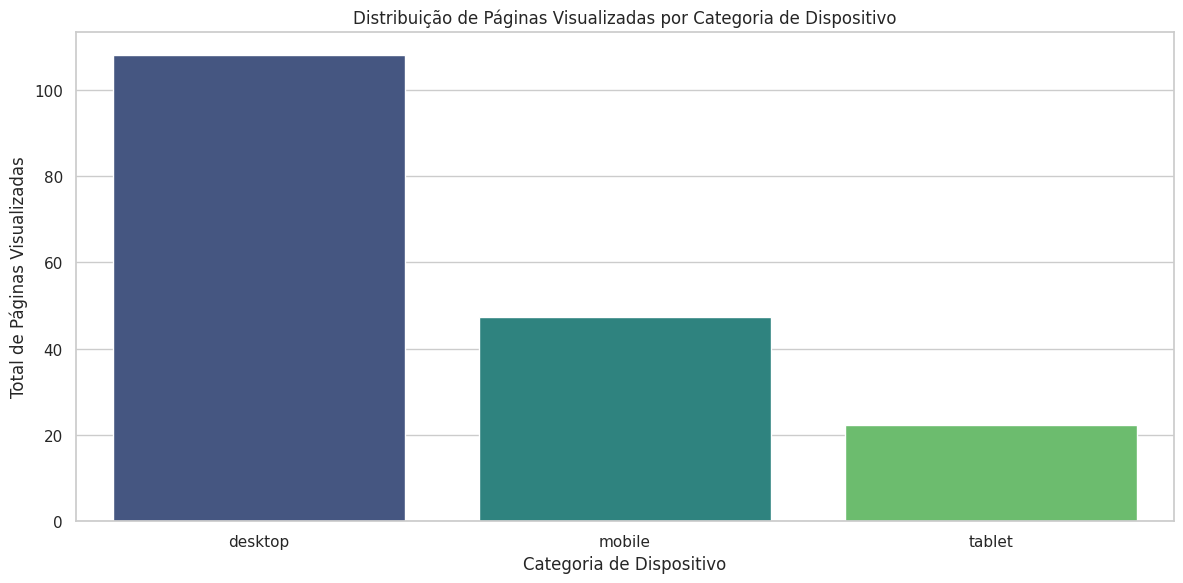

In [112]:
plt.figure(figsize=(12, 6))
sns.barplot(x='categoria_de_dispositivo', y='total_paginas_visualizadas', data=df_hearing, palette='viridis', ci=None)
plt.title('Distribuição de Páginas Visualizadas por Categoria de Dispositivo')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Total de Páginas Visualizadas')
plt.tight_layout()
plt.show()

In [113]:
device_category_pageviews = df_hearing.groupby('categoria_de_dispositivo')['total_paginas_visualizadas'].sum()
total_pageviews = device_category_pageviews.sum()
percentages_pageviews = (device_category_pageviews / total_pageviews) * 100

# Exibindo as porcentagens por categoria de dispositivo
for device, percentage in percentages_pageviews.items():
    print(f'{device}: {percentage:.1f}%')

desktop: 76.0%
mobile: 20.5%
tablet: 3.5%


<ipython-input-114-d68593b7ac63>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_paginas_visualizadas', data=df_2016, palette='viridis', ci=None)
<ipython-input-114-d68593b7ac63>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_paginas_visualizadas', data=df_2016, palette='viridis', ci=None)
<ipython-input-114-d68593b7ac63>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='total_paginas_visualizadas', data=df_2017, palette='viridis', ci=None)
<ipython-input-114-d68593b7ac63>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

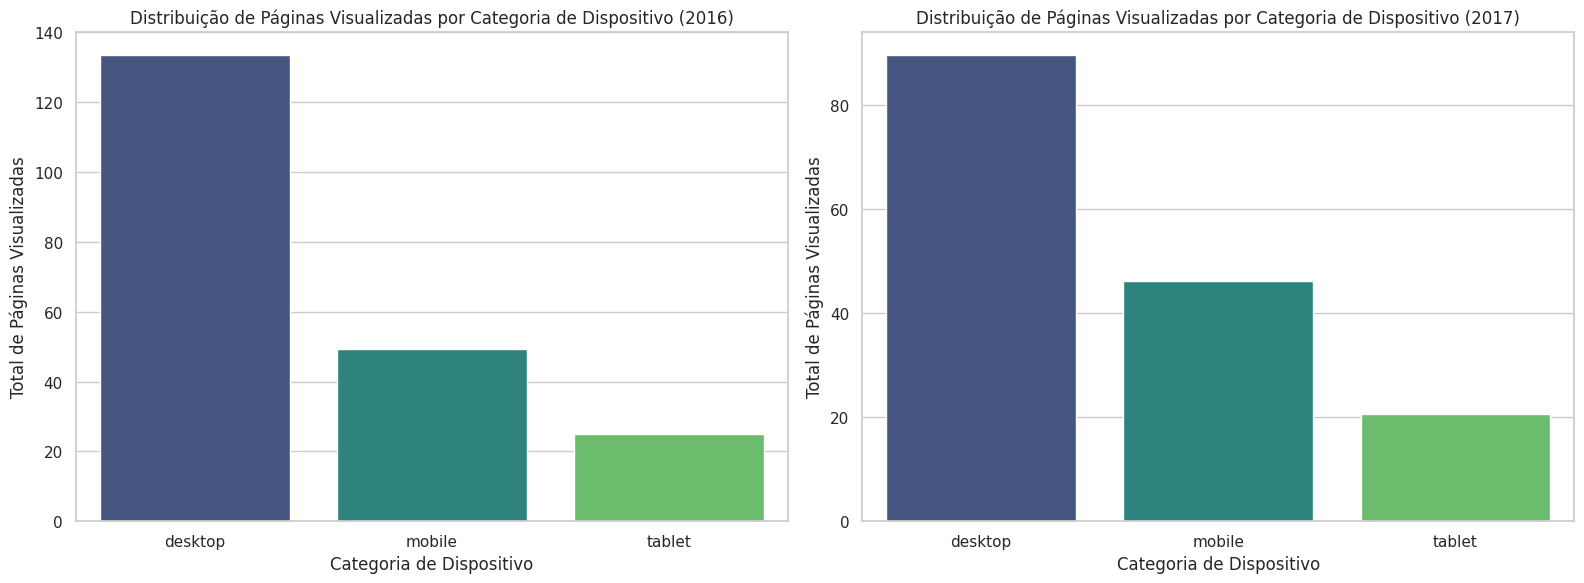

In [114]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Criar figura e eixos para os gráficos
plt.figure(figsize=(16, 6))

# Gráfico para 2016
plt.subplot(1, 2, 1)
sns.barplot(x='categoria_de_dispositivo', y='total_paginas_visualizadas', data=df_2016, palette='viridis', ci=None)
plt.title('Distribuição de Páginas Visualizadas por Categoria de Dispositivo (2016)')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Total de Páginas Visualizadas')

# Gráfico para 2017
plt.subplot(1, 2, 2)
sns.barplot(x='categoria_de_dispositivo', y='total_paginas_visualizadas', data=df_2017, palette='viridis', ci=None)
plt.title('Distribuição de Páginas Visualizadas por Categoria de Dispositivo (2017)')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Total de Páginas Visualizadas')

plt.tight_layout()
plt.show()

In [115]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular o total de páginas visualizadas para cada ano
total_pageviews_2016 = df_2016['total_paginas_visualizadas'].sum()
total_pageviews_2017 = df_2017['total_paginas_visualizadas'].sum()

# Calcular as porcentagens de distribuição
percentages_2016 = (df_2016.groupby('categoria_de_dispositivo')['total_paginas_visualizadas'].sum() / total_pageviews_2016) * 100
percentages_2017 = (df_2017.groupby('categoria_de_dispositivo')['total_paginas_visualizadas'].sum() / total_pageviews_2017) * 100

# Imprimir porcentagens formatadas para 2016
print("Porcentagens de distribuição de páginas visualizadas por categoria de dispositivo em 2016:")
for device, percentage in percentages_2016.items():
    print(f"{device}: {percentage:.1f}%")

# Imprimir porcentagens formatadas para 2017
print("\nPorcentagens de distribuição de páginas visualizadas por categoria de dispositivo em 2017:")
for device, percentage in percentages_2017.items():
    print(f"{device}: {percentage:.1f}%")

Porcentagens de distribuição de páginas visualizadas por categoria de dispositivo em 2016:
desktop: 79.9%
mobile: 16.8%
tablet: 3.2%

Porcentagens de distribuição de páginas visualizadas por categoria de dispositivo em 2017:
desktop: 72.1%
mobile: 24.1%
tablet: 3.8%


## Tempo Total no Site por Categoria de Dispositivo

<ipython-input-116-2d7e477d5a3d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='tempo_total_no_site', data=df_hearing, palette='viridis', ci=None)
<ipython-input-116-2d7e477d5a3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='tempo_total_no_site', data=df_hearing, palette='viridis', ci=None)


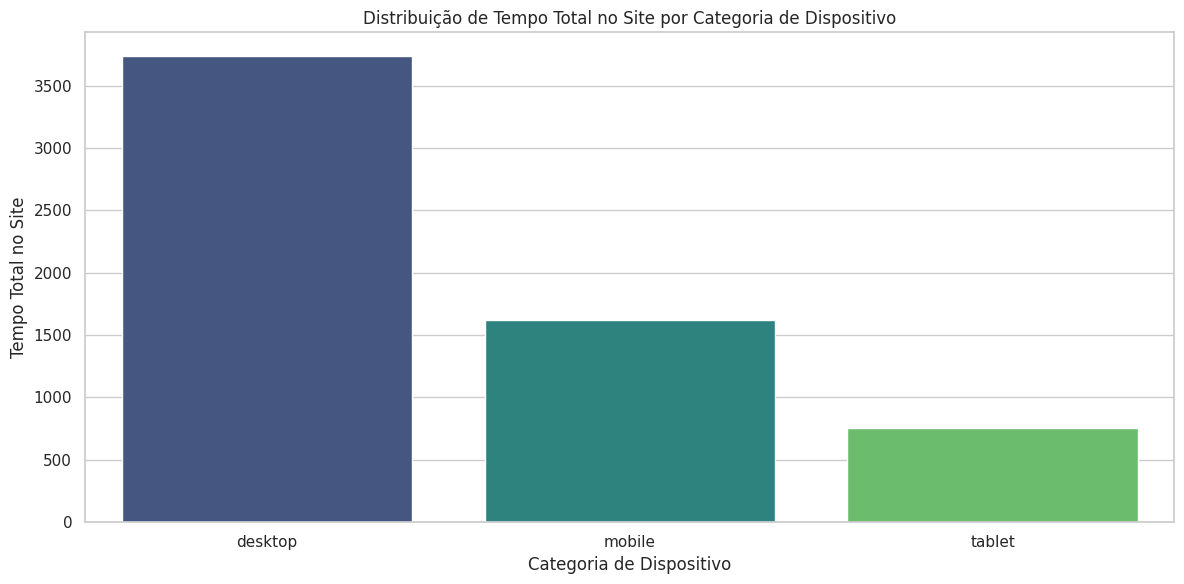

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(x='categoria_de_dispositivo', y='tempo_total_no_site', data=df_hearing, palette='viridis', ci=None)
plt.title('Distribuição de Tempo Total no Site por Categoria de Dispositivo')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Tempo Total no Site')
plt.tight_layout()
plt.show()

In [117]:
device_category_time = df_hearing.groupby('categoria_de_dispositivo')['tempo_total_no_site'].sum()
total_timeonsite = device_category_time.sum()
percentages_time = (device_category_time / total_timeonsite) * 100

# Exibindo as porcentagens por categoria de dispositivo
for device, percentage in percentages_time.items():
    print(f'{device}: {percentage:.1f}%')

desktop: 76.3%
mobile: 20.3%
tablet: 3.4%


<ipython-input-118-be34caac018f>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='tempo_total_no_site', data=df_2016, palette='viridis', ci=None)
<ipython-input-118-be34caac018f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='tempo_total_no_site', data=df_2016, palette='viridis', ci=None)
<ipython-input-118-be34caac018f>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria_de_dispositivo', y='tempo_total_no_site', data=df_2017, palette='viridis', ci=None)
<ipython-input-118-be34caac018f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

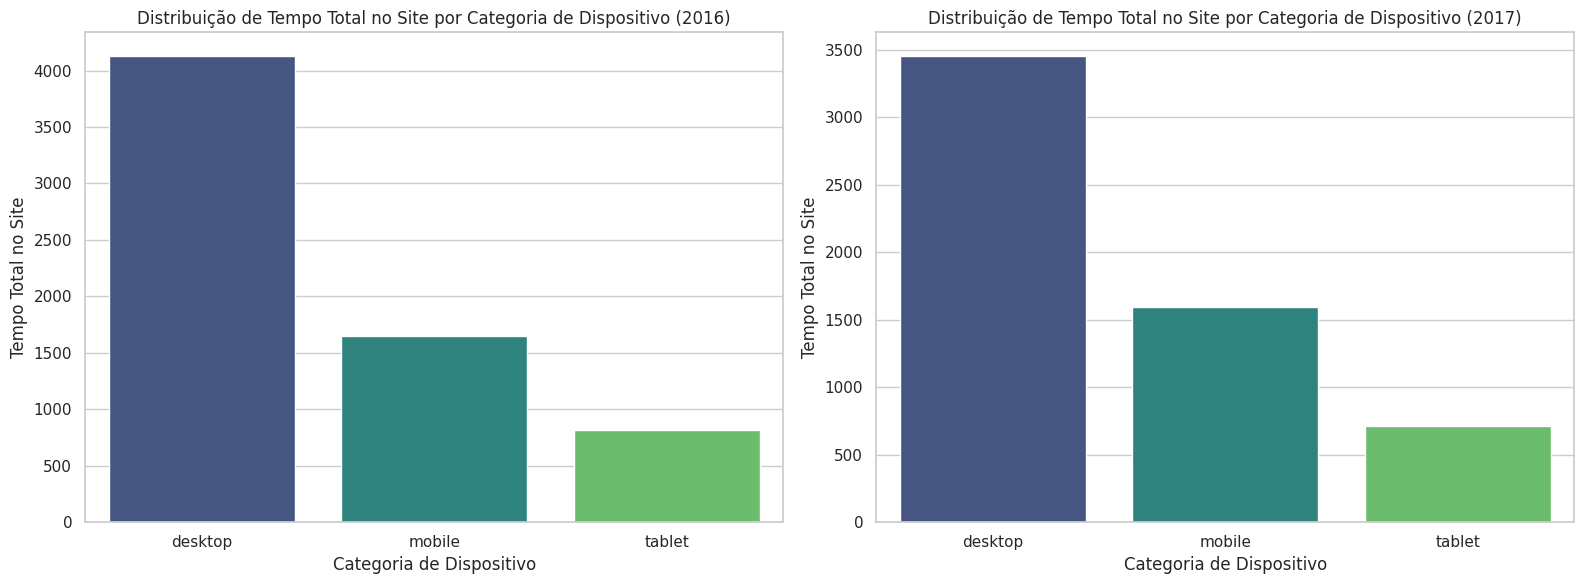

In [118]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Criar figura e eixos para os gráficos
plt.figure(figsize=(16, 6))

# Gráfico para 2016
plt.subplot(1, 2, 1)
sns.barplot(x='categoria_de_dispositivo', y='tempo_total_no_site', data=df_2016, palette='viridis', ci=None)
plt.title('Distribuição de Tempo Total no Site por Categoria de Dispositivo (2016)')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Tempo Total no Site')

# Gráfico para 2017
plt.subplot(1, 2, 2)
sns.barplot(x='categoria_de_dispositivo', y='tempo_total_no_site', data=df_2017, palette='viridis', ci=None)
plt.title('Distribuição de Tempo Total no Site por Categoria de Dispositivo (2017)')
plt.xlabel('Categoria de Dispositivo')
plt.ylabel('Tempo Total no Site')

plt.tight_layout()
plt.show()

In [119]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Calcular o total de tempo no site para cada ano
total_time_2016 = df_2016['tempo_total_no_site'].sum()
total_time_2017 = df_2017['tempo_total_no_site'].sum()

# Calcular as porcentagens de distribuição
percentages_2016 = (df_2016.groupby('categoria_de_dispositivo')['tempo_total_no_site'].sum() / total_time_2016) * 100
percentages_2017 = (df_2017.groupby('categoria_de_dispositivo')['tempo_total_no_site'].sum() / total_time_2017) * 100

# Imprimir porcentagens formatadas para 2016
print("Porcentagens de distribuição de tempo total no site por categoria de dispositivo em 2016:")
for device, percentage in percentages_2016.items():
    print(f"{device}: {percentage:.1f}%")

# Imprimir porcentagens formatadas para 2017
print("\nPorcentagens de distribuição de tempo total no site por categoria de dispositivo em 2017:")
for device, percentage in percentages_2017.items():
    print(f"{device}: {percentage:.1f}%")

Porcentagens de distribuição de tempo total no site por categoria de dispositivo em 2016:
desktop: 78.7%
mobile: 17.9%
tablet: 3.4%

Porcentagens de distribuição de tempo total no site por categoria de dispositivo em 2017:
desktop: 74.3%
mobile: 22.3%
tablet: 3.5%


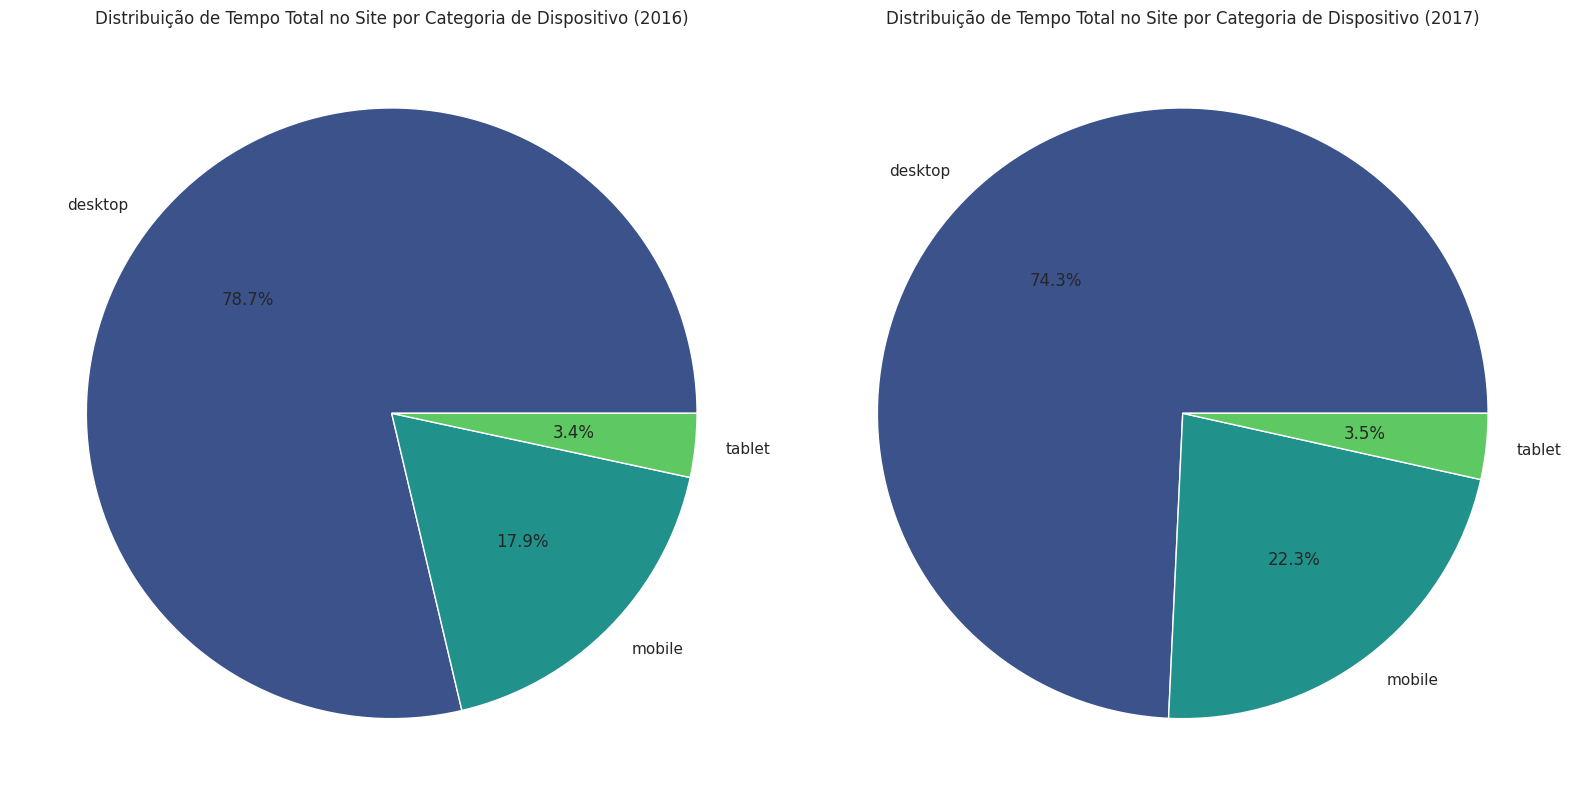

In [120]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]
df_2017 = df_hearing[df_hearing['ano'] == 2017]

# Agrupar dados por categoria de dispositivo e calcular somatório do tempo total no site
grouped_2016 = df_2016.groupby('categoria_de_dispositivo')['tempo_total_no_site'].sum()
grouped_2017 = df_2017.groupby('categoria_de_dispositivo')['tempo_total_no_site'].sum()

# Gráfico de setores para 2016 e 2017
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de setores para 2016
ax[0].pie(grouped_2016, labels=grouped_2016.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(grouped_2016)))
ax[0].set_title('Distribuição de Tempo Total no Site por Categoria de Dispositivo (2016)')

# Gráfico de setores para 2017
ax[1].pie(grouped_2017, labels=grouped_2017.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(grouped_2017)))
ax[1].set_title('Distribuição de Tempo Total no Site por Categoria de Dispositivo (2017)')

plt.tight_layout()
plt.show()

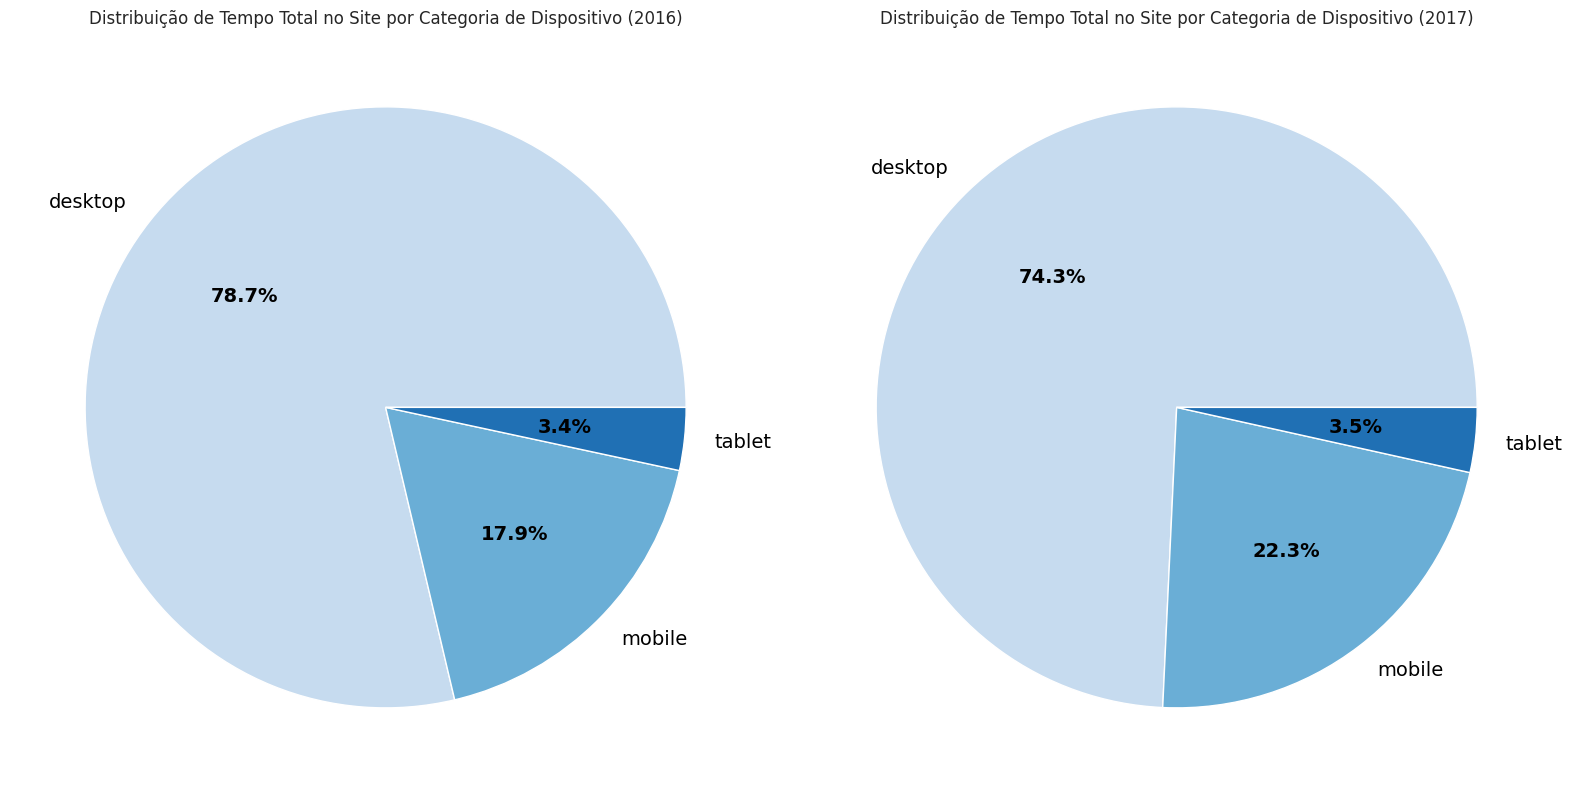

In [121]:
# Filtrar dados para os anos de 2016 e 2017
df_2016 = df_hearing[df_hearing['ano'] == 2016]  # Usando 'ano' no lugar de 'year'
df_2017 = df_hearing[df_hearing['ano'] == 2017]  # Usando 'ano' no lugar de 'year'

# Agrupar dados por categoria de dispositivo e calcular porcentagens
grouped_2016 = df_2016.groupby('categoria_de_dispositivo')['tempo_total_no_site'].sum()  # Usando 'categoria_de_dispositivo' e 'tempo_total_no_site'
grouped_2017 = df_2017.groupby('categoria_de_dispositivo')['tempo_total_no_site'].sum()  # Usando 'categoria_de_dispositivo' e 'tempo_total_no_site'

# Ordenar os grupos do maior para o menor
grouped_2016 = grouped_2016.sort_values(ascending=False)
grouped_2017 = grouped_2017.sort_values(ascending=False)

# Paleta de cores em tons de azul
colors_2016 = sns.color_palette('Blues', len(grouped_2016))
colors_2017 = sns.color_palette('Blues', len(grouped_2017))

# Gráfico de setores para 2016 e 2017
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de setores para 2016
wedges, texts, autotexts = ax[0].pie(grouped_2016, labels=grouped_2016.index, autopct='%1.1f%%',
                                     colors=colors_2016, textprops=dict(color="black"))
ax[0].set_title('Distribuição de Tempo Total no Site por Categoria de Dispositivo (2016)')

# Ajustar o tamanho das legendas e porcentagens para 2016
for text in texts:
    text.set_fontsize(14)
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

# Gráfico de setores para 2017
wedges, texts, autotexts = ax[1].pie(grouped_2017, labels=grouped_2017.index, autopct='%1.1f%%',
                                     colors=colors_2017, textprops=dict(color="black"))
ax[1].set_title('Distribuição de Tempo Total no Site por Categoria de Dispositivo (2017)')

# Ajustar o tamanho das legendas e porcentagens para 2017
for text in texts:
    text.set_fontsize(14)
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

plt.tight_layout()
plt.show()

# Páginas mais visitadas e taxa de rejeição

<ipython-input-122-0ac593e034ad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pages.index, y=top_pages.values, palette='viridis')


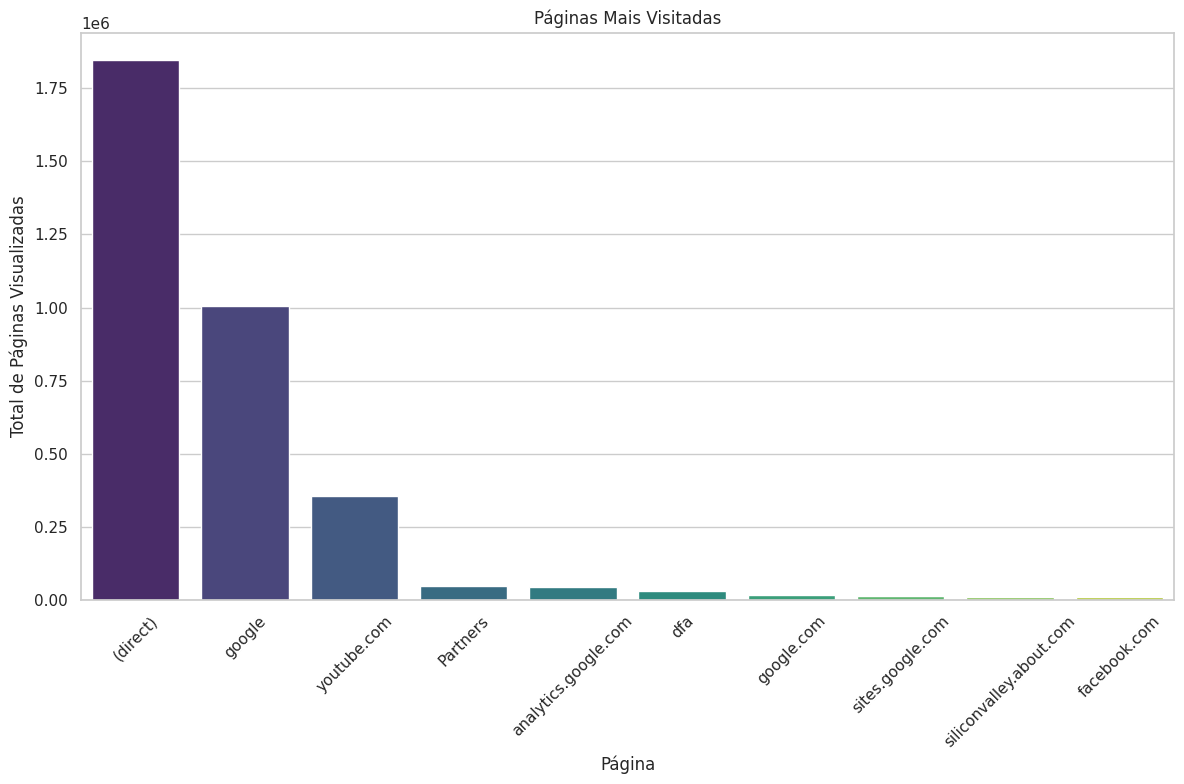

In [122]:
# Vamos primeiro identificar as páginas mais visitadas
top_pages = df_hearing.groupby('origem')['total_paginas_visualizadas'].sum().nlargest(10)  # Top 10 páginas mais visitadas

# Criando o gráfico de barras para páginas mais visitadas
plt.figure(figsize=(12, 8))
sns.barplot(x=top_pages.index, y=top_pages.values, palette='viridis')
plt.title('Páginas Mais Visitadas')
plt.xlabel('Página')
plt.ylabel('Total de Páginas Visualizadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
# Calcular o total de visualizações de todas as páginas
total_pageviews = df_hearing['total_paginas_visualizadas'].sum()

# Calcular o total de visualizações das top 10 páginas mais visitadas
top_pages = df_hearing.groupby('origem')['total_paginas_visualizadas'].sum().nlargest(10)

# Calcular a porcentagem de visualizações de cada uma das top 10 páginas
top_pages_percentage = (top_pages / total_pageviews) * 100

# Exibir os resultados
top_pages_percentage

origem
(direct)                   53.093375
google                     28.890752
youtube.com                10.199582
Partners                    1.363446
analytics.google.com        1.266420
dfa                         0.892434
google.com                  0.545959
sites.google.com            0.423865
siliconvalley.about.com     0.291939
facebook.com                0.290847
Name: total_paginas_visualizadas, dtype: float64

In [127]:
# Verificar se a coluna 'date' está no formato datetime
df_hearing['data'] = pd.to_datetime(df_hearing['data'], errors='coerce')

# Extrair o ano da coluna 'date'
df_hearing['ano'] = df_hearing['data'].dt.year

# Listar os anos únicos
anos_unicos = df_hearing['ano'].unique()

# Mostrar os anos únicos
print("Anos presentes na coluna 'data':", anos_unicos)

Anos presentes na coluna 'data': [2017 2016]


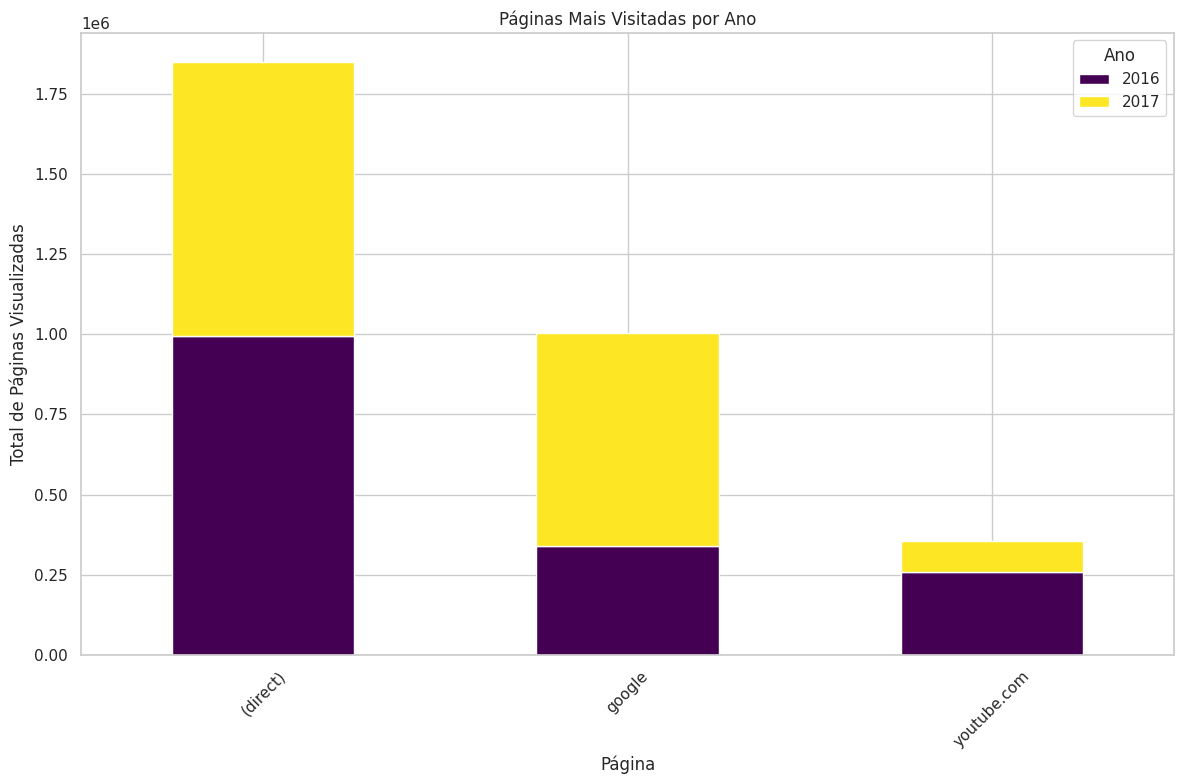

      ano       origem  percentage
0    2016     (direct)   28.612728
46   2016       google    9.786182
190  2016  youtube.com    7.413239
191  2017     (direct)   24.480648
259  2017       google   19.104571
414  2017  youtube.com    2.786343


In [128]:
# Calcular o total de visualizações de todas as páginas
total_pageviews = df_hearing['total_paginas_visualizadas'].sum()

# Calcular as páginas mais visitadas por ano
top_pages_by_year = df_hearing.groupby(['ano', 'origem'])['total_paginas_visualizadas'].sum().reset_index()

# Calcular a porcentagem de visualizações de cada página
top_pages_by_year['percentage'] = (top_pages_by_year['total_paginas_visualizadas'] / total_pageviews) * 100

# Ordenar as páginas por ano e total de visualizações
top_pages_by_year = top_pages_by_year.sort_values(by=['ano', 'total_paginas_visualizadas'], ascending=[True, False])

# Selecionar as top 3 páginas mais visitadas por ano
top_pages_by_year = top_pages_by_year.groupby('ano').head(3)  # Top 3 páginas mais visitadas por ano

# Pivotar os dados para preparar o gráfico de barras empilhadas
pivot_df = top_pages_by_year.pivot(index='origem', columns='ano', values='total_paginas_visualizadas').fillna(0)

# Plotar gráfico de barras empilhadas
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Páginas Mais Visitadas por Ano')
plt.xlabel('Página')
plt.ylabel('Total de Páginas Visualizadas')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

# Exibir a porcentagem de visualizações para cada página
print(top_pages_by_year[['ano', 'origem', 'percentage']])

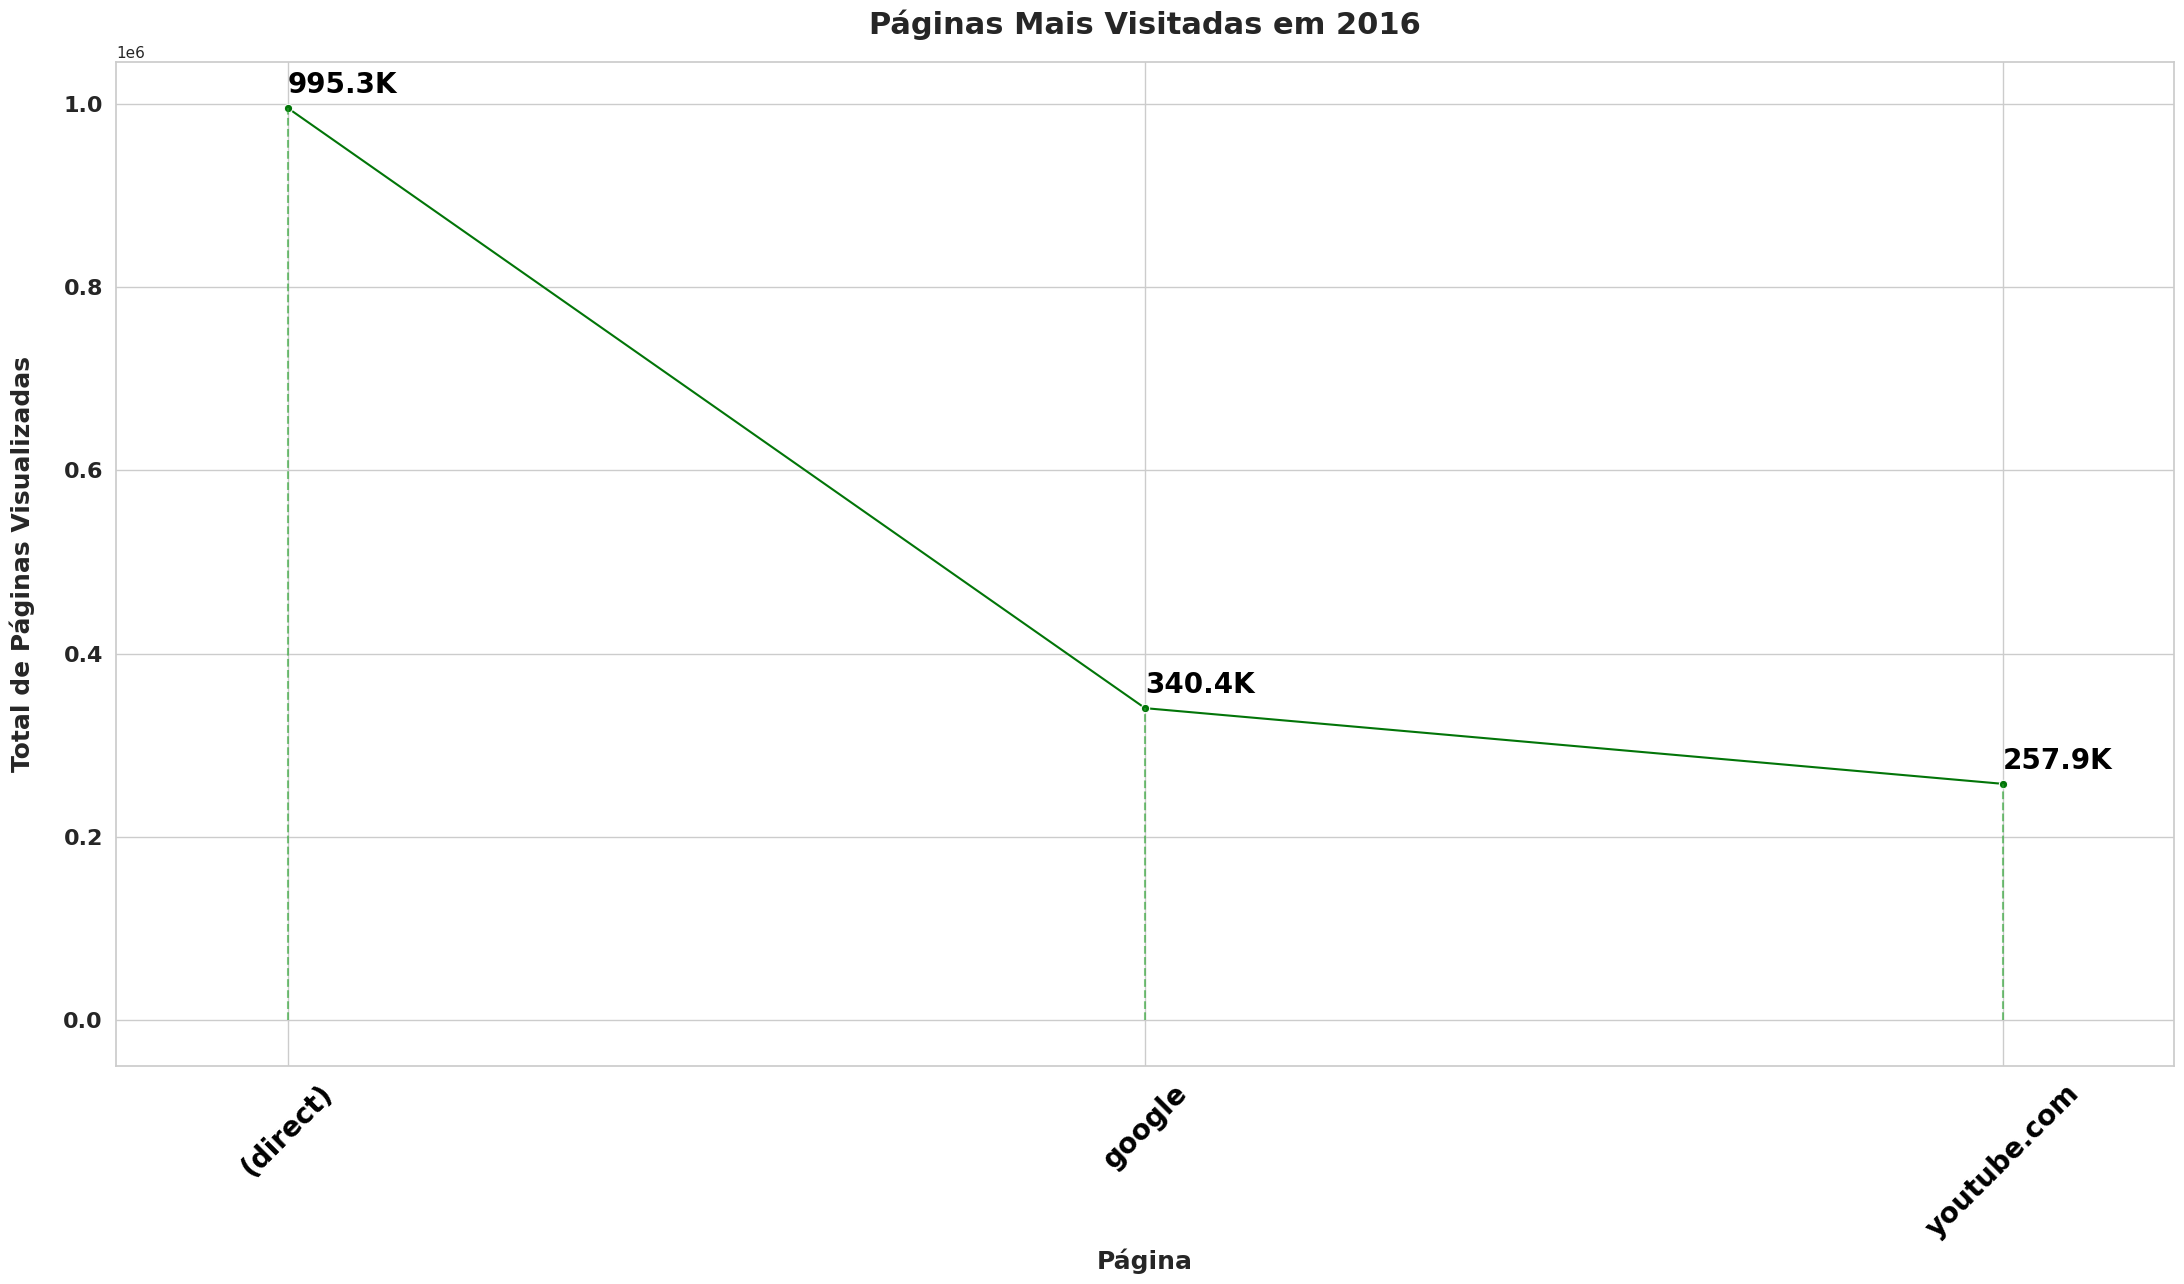

In [130]:
# Filtrar dados para o ano de 2016
top_pages_2016 = top_pages_by_year[top_pages_by_year['ano'] == 2016]

plt.figure(figsize=(22, 13))

# Gráfico de linhas com marcadores
sns.lineplot(x='origem', y='total_paginas_visualizadas', data=top_pages_2016, marker='o', color='#027508')

# Adicionar linhas conectando cada ponto
for index, row in top_pages_2016.iterrows():
    plt.plot([row['origem'], row['origem']], [0, row['total_paginas_visualizadas']], linestyle='--', color='#26a32c', alpha=0.6)

# Adicionar valor de cada ponto com representação de unidades
for index, row in top_pages_2016.iterrows():
    value = row['total_paginas_visualizadas']
    if value >= 1000000:
        text = f'{value / 1000000:.1f}M'
    elif value >= 1000:
        text = f'{value / 1000:.1f}K'
    else:
        text = f'{value:.0f}'
    plt.text(row['origem'], row['total_paginas_visualizadas'] + 10000, text, ha='left', va='bottom', fontsize=20, color='black', fontweight='bold')

# Adicionar título e rótulos aos eixos
plt.title('Páginas Mais Visitadas em 2016', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Página', fontsize=18, fontweight='bold')
plt.ylabel('Total de Páginas Visualizadas', fontsize=18, fontweight='bold', labelpad=20)

# Ajustar as configurações de estilo
plt.xticks(rotation=45, fontsize=20, color='black', fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Ajustando espaçamento entre rótulos do eixo x e os números do gráfico
plt.gca().margins(x=0.1)

# Ajuste final no layout
plt.tight_layout()
plt.show()

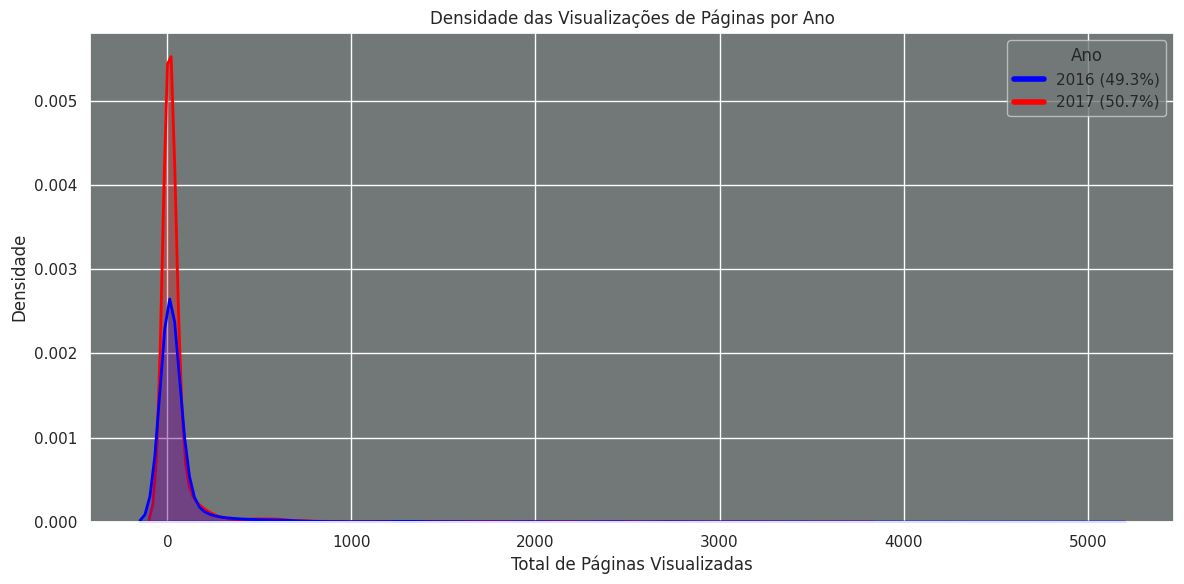

In [131]:
# Filtrar dados para os anos de 2016 e 2017
df_filtered = df_hearing[df_hearing['ano'].isin([2016, 2017])]

# Configurar estilo do gráfico
sns.set(rc={"axes.facecolor": "#727877", "figure.facecolor": "#ffffff"})

# Criar o gráfico de densidade das visualizações de páginas por ano
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_filtered, x='total_paginas_visualizadas', hue='ano', fill=True, palette=['blue', 'red'], linewidth=2)

plt.title("Densidade das Visualizações de Páginas por Ano")
plt.xlabel("Total de Páginas Visualizadas")
plt.ylabel("Densidade")

# Calcular porcentagens
total_2016 = df_filtered[df_filtered['ano'] == 2016]['total_paginas_visualizadas'].sum()
total_2017 = df_filtered[df_filtered['ano'] == 2017]['total_paginas_visualizadas'].sum()

percent_2016 = total_2016 / (total_2016 + total_2017) * 100
percent_2017 = total_2017 / (total_2016 + total_2017) * 100

# Adicionar legenda manualmente
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label=f'2016 ({percent_2016:.1f}%)')
red_patch = plt.Line2D([0], [0], color='red', lw=4, label=f'2017 ({percent_2017:.1f}%)')
plt.legend(handles=[blue_patch, red_patch], title='Ano')

plt.tight_layout()
plt.show()

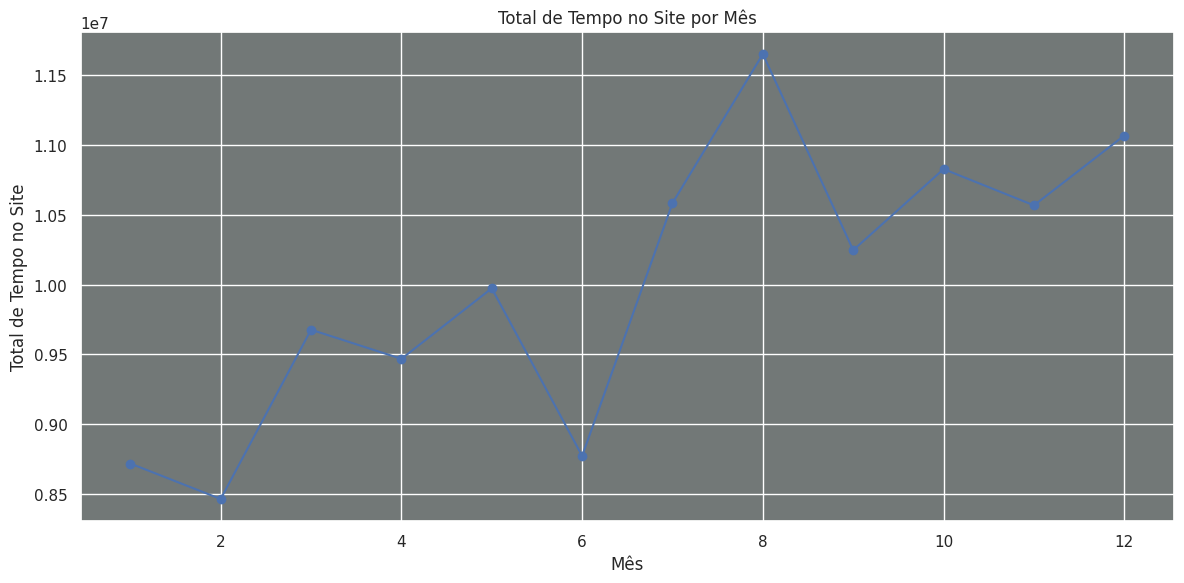

In [133]:
# Extrair o mês da coluna 'data' e agrupar por mês, somando 'tempo_total_no_site'
df_hearing['month'] = pd.to_datetime(df_hearing['data']).dt.month
df_grouped = df_hearing.groupby('month')['tempo_total_no_site'].sum().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['month'], df_grouped['tempo_total_no_site'], marker='o')

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Total de Tempo no Site')
plt.title('Total de Tempo no Site por Mês')

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

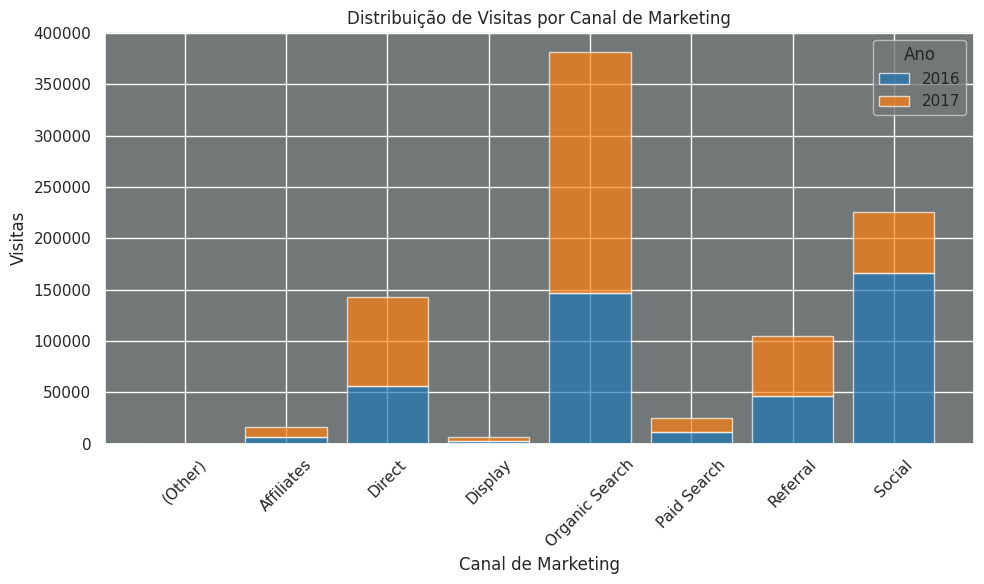

In [134]:
# Agrupar dados por canal de marketing e ano
dados_agrupados = df_hearing.groupby(['canal_de_marketing', 'ano'])['total_visitas'].sum().unstack()

# Configuração das cores para cada ano
cores = ['#1f77b4', '#ff7f0e']  # Azul para 2016, Laranja para 2017

# Plotar gráfico de barras empilhadas
plt.figure(figsize=(10, 6))

anos = dados_agrupados.columns
barras_anteriores = None

for i, ano in enumerate(anos):
    barras = plt.bar(dados_agrupados.index, dados_agrupados[ano], label=ano, color=cores[i], alpha=0.7, bottom=barras_anteriores)
    if i == 0:
        barras_anteriores = dados_agrupados[ano].values
    else:
        barras_anteriores += dados_agrupados[ano].values

plt.title('Distribuição de Visitas por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Visitas')
plt.xticks(rotation=45)
plt.legend(title='Ano')

plt.tight_layout()
plt.show()